In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time

from scipy.integrate import quad


import sys
sys.path.insert(1, '../../Files')

import logo
from constants import Units, Constants
from SNdistribution import SNdistribution

import SNprofiles
from DM4fermionINT import DmAcross


In [2]:
%load_ext autoreload
%autoreload 2

Check if everything is ok

In [3]:
logo.logo()


      ____  _   _   _____          _                 _\/_
     / ___|| \ | | |  ___|_ _  ___| |_ ___  _ __ _   _/\ 
     \___ \|  \| | | |_ / _` |/ __| __/ _ \| '__| | | |
      ___) | |\  | |  _| (_| | (__| || (_) | |  | |_| |
     |____/|_| \_| |_|  \__,_|\___|\__\___/|_|   \__, |
                                                 |___/ 
                                            
                Baking particles since 1987!
                         v.beta.1
    


# 1. SN Profiles

Let's use the same profiles as in:

Phys. Rev. D. 100, 075018 (2019) [1905.09284]  -  DeRocco, Graham, Kasen, Marques-Tavares, Rajendran

for which we have analytical profiles: density, temperature, electron fraction

## Load

In [4]:
# folder where the profiles are stored
dir_profiles = "../../ConfigFiles/SN-profiles/"

# profiles
rho_file = dir_profiles + "1MsolPNS-DeRocco/rho_DeRocco.dat"
Ye_file = dir_profiles + "1MsolPNS-DeRocco/Ye_DeRocco.dat"
T_file = dir_profiles + "1MsolPNS-DeRocco/T_DeRocco.dat"
lapse_file = dir_profiles + "1MsolPNS-DeRocco/lapse_DeRocco.dat"


#####################
# LOAD THE PROFILES #
#####################
# if use_saved_lapse=True uses the data in the "lapse_file", if False computes it and saves it in "lapse_file"

SN_prof = SNprofiles.SNprofiles_lightDM(rho_file, 
                                        Ye_file, 
                                        T_file, 
                                        use_saved_lapse=True, lapse_file=lapse_file)

## Plot the profiles

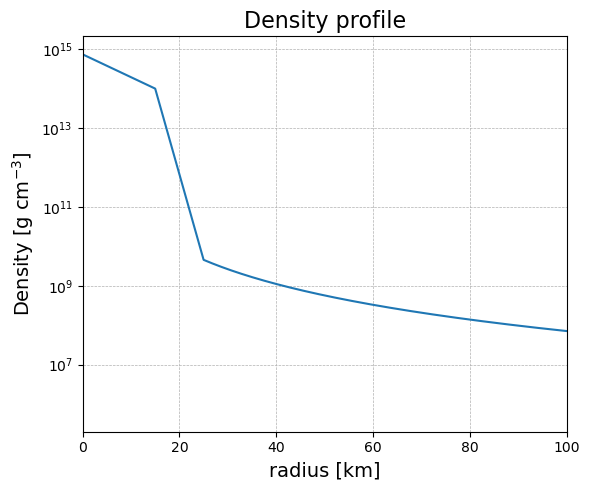

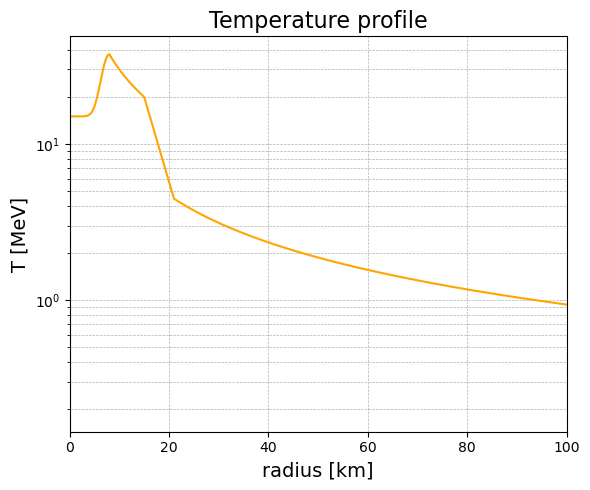

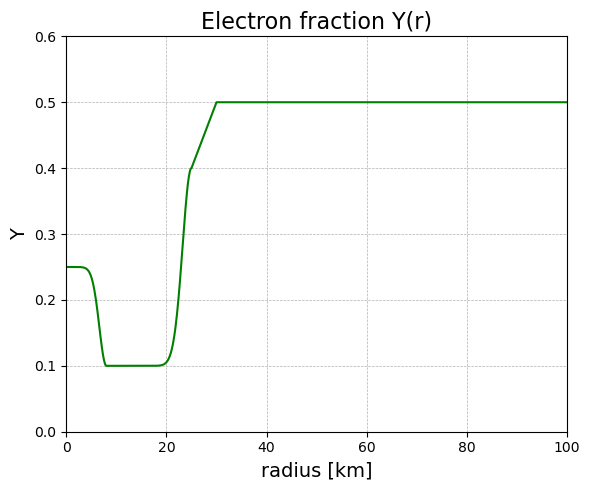

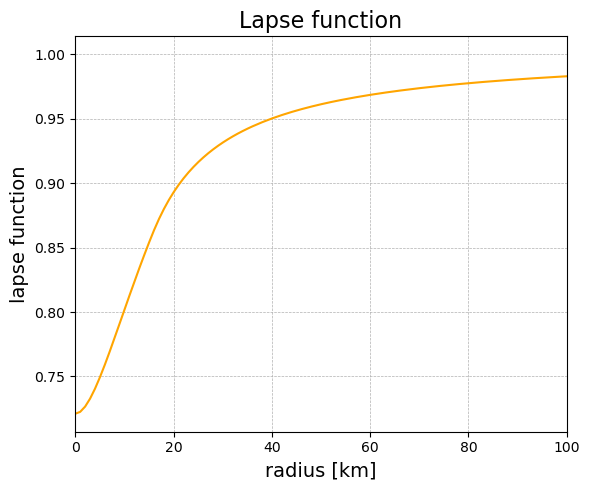

In [5]:
###################
# DENSITY PROFILE #
###################

rho_DATA = np.loadtxt(rho_file)

rad = rho_DATA[:,0]
rho_vals = rho_DATA[:,1]

# Plot
plt.figure(figsize=(6,5))
plt.plot(rad, rho_vals)
plt.xlim(0,100)
plt.yscale('log')
plt.xlabel("radius [km]", fontsize=14)
plt.ylabel(r"Density [g cm$^{-3}$]", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title("Density profile", fontsize=16)
plt.tight_layout()
plt.show()



#######################
# TEMPERATURE PROFILE #
#######################

T_DATA = np.loadtxt(T_file)

rad = T_DATA[:,0]
T_vals = T_DATA[:,1]

# Plot
plt.figure(figsize=(6,5))
plt.plot(rad, T_vals, color='orange')
plt.yscale('log')
plt.xlim(0,100)
plt.xlabel("radius [km]", fontsize=14)
plt.ylabel("T [MeV]", fontsize=14)
plt.title("Temperature profile", fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()




#############################
# ELECTRON FRACTION PROFILE #
#############################

Ye_DATA = np.loadtxt(Ye_file)

rad = Ye_DATA[:,0]
Ye_vals = Ye_DATA[:,1]

# Plot
plt.figure(figsize=(6,5))
plt.plot(rad, Ye_vals, color='green')
plt.xlim(0,100)
plt.ylim(0, 0.6)
plt.xlabel("radius [km]", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title("Electron fraction Y(r)", fontsize=16)
plt.tight_layout()
plt.show()




##################
# LAPSE FUNCTION #
##################

lapse_DATA = np.loadtxt(lapse_file)

rad = lapse_DATA[:,0]
lapse_vals = lapse_DATA[:,1]

# Plot
plt.figure(figsize=(6,5))
plt.plot(rad, lapse_vals, color='orange')
plt.xlim(0,100)
plt.xlabel("radius [km]", fontsize=14)
plt.ylabel("lapse function", fontsize=14)
plt.title("Lapse function", fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# 2 SET UP

In [6]:
SNdist = SNdistribution(SNrate=1.63, 
                        Rd=2.6, 
                        H=0.3, 
                        RE=8.23, 
                        zE=0.0208)

## Diffuse approximation

In [7]:
# FLUX

diffSNfactor = SNdist.flux_factor()
print("diffuse galactic SN flux factor: ", diffSNfactor, " [cm^{-2} s^{-1}]")

diffuse galactic SN flux factor:  1.3955222568980171e-55  [cm^{-2} s^{-1}]


In [8]:
# FLUENCE
texp_LZ = 1000 / 365 # 1000 days (15ton yr)  https://arxiv.org/pdf/2102.11740
ExpTIME = texp_LZ * Units.seconds_in_year  # Time window of the experiment, in seconds

fluence_diff = diffSNfactor * ExpTIME # [cm^{-2}]
print(f'Diffuse fluence factor (for 2.74 yr exposure): {fluence_diff:.3e} cm^-2')

Diffuse fluence factor (for 2.74 yr exposure): 1.206e-47 cm^-2


# 3. Dark fermion

## 3.1 using the diffuse galactic SN flux approximation

Here we are going to compute the expected signal in a direct detection experiment (XENON1T)

First using the diffuse galactic SN flux approximation.

----------------------

For that you have class $\bf{DmAcross}$ defined in the imported module $\bf{DM4fermionINT}$

Inputs:
- Z: atomic number of the target material
- mA: mass number of the target material
- diffSNfactor: diffuse galactic SN factor [cm^{-2} s^{-1}]
- profile: the SN profile class

In [9]:
# TARGET: Xenon
Z_Xe = 54
mA_Xe = 131.293*931.5 # MeV


DMfermion = DmAcross( Z=Z_Xe, mA=mA_Xe, diffSNfactor=diffSNfactor, profile=SN_prof )

### DM flux (with/without gravitational effects)

For that you have function $\bf{diffFlux}$ defined in the class $\bf{DmAcross}$

Inputs:
- mchi   : DM mass [MeV]
- p      : momentum of the incoming DM particle [MeV]
- rad    : radius [km]
- Nchi   : number flux of DM from a SN
        
Returns:
- dflux/dp  [m^-2 s^-1 MeV^-1]

--------------------------------

To take into account the gravitational effects you have function $\bf{Fp0}$ defined in the class $\bf{DmAcross}$

Inputs:
- mchi   : DM mass [MeV]
- p_inf  : momentum of the incoming DM particle when it has already scaped the SN gravitational potential [MeV]
- rad    : radius [km]
        
Returns:
- Momentoum at origen (p0) given p_inf, mchi and rad [MeV]

BP1:  m = 6 MeV, r = 55.7 km, Total number of particles produced in log(10)s = 1.68e+56
BP2:  m = 26 MeV, r = 19.6 km, Total number of particles produced in log(10)s = 7.60e+56
BP3:  m = 132 MeV, r = 15.2 km, Total number of particles produced in log(10)s = 5.07e+56


/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:164: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)


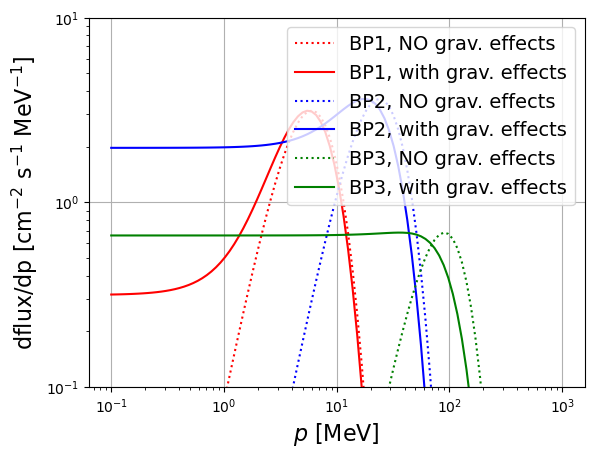

In [10]:
# LET's PLOT THE FLUX ON EARTH

mchiTEST1 = 6 # MeV
mchiTEST2 = 26 # MeV
mchiTEST3 = 132 # MeV

Nchi1 = 7.3e55 * np.log(10) # number flux of DM from the SN
Nchi2 = 3.3e56 * np.log(10) # number flux of DM from the SN
Nchi3 = 2.2e56 * np.log(10) # number flux of DM from the SN

rE1 = 55.7 # km
rE2 = 19.6 # km
rE3 = 15.2 # km

print(fr'BP1:  m = {mchiTEST1} MeV, r = {rE1} km, Total number of particles produced in log(10)s = {Nchi1:0.2e}')
print(fr'BP2:  m = {mchiTEST2} MeV, r = {rE2} km, Total number of particles produced in log(10)s = {Nchi2:0.2e}')
print(fr'BP3:  m = {mchiTEST3} MeV, r = {rE3} km, Total number of particles produced in log(10)s = {Nchi3:0.2e}')



p_grid = np.logspace(-1, 3, 100)


diffFlux_plot_BP1_noG = [ DMfermion.diffFlux(mchiTEST1, pp, rad=rE1, Nchi=Nchi1) for pp in p_grid ]
diffFlux_plot_BP1 = [ DMfermion.diffFlux(mchiTEST1, DMfermion.Fp0(pp, mchiTEST1, rad =rE1), rad=rE1, Nchi=Nchi1) for pp in p_grid ]

diffFlux_plot_BP2_noG = [ DMfermion.diffFlux(mchiTEST2, pp, rad=rE2, Nchi=Nchi2) for pp in p_grid ]
diffFlux_plot_BP2 = [ DMfermion.diffFlux(mchiTEST2, DMfermion.Fp0(pp, mchiTEST2, rad =rE2), rad=rE2, Nchi=Nchi2) for pp in p_grid ]

diffFlux_plot_BP3_noG = [ DMfermion.diffFlux(mchiTEST3, pp, rad=rE3, Nchi=Nchi3) for pp in p_grid ]
diffFlux_plot_BP3 = [ DMfermion.diffFlux(mchiTEST3, DMfermion.Fp0(pp, mchiTEST3, rad =rE3), rad=rE3, Nchi=Nchi3) for pp in p_grid ]



plt.plot(p_grid, diffFlux_plot_BP1_noG, ':', color='red', label=fr'BP1, NO grav. effects')
plt.plot(p_grid, diffFlux_plot_BP1, '-', color='red', label=fr'BP1, with grav. effects')

plt.plot(p_grid, diffFlux_plot_BP2_noG, ':', color='blue', label=fr'BP2, NO grav. effects')
plt.plot(p_grid, diffFlux_plot_BP2, '-', color='blue', label=fr'BP2, with grav. effects')

plt.plot(p_grid, diffFlux_plot_BP3_noG, ':', color='green', label=fr'BP3, NO grav. effects')
plt.plot(p_grid, diffFlux_plot_BP3, '-', color='green', label=fr'BP3, with grav. effects')

# plt.ylim(1e5,2e13)
plt.ylim(1e-1,1e1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$p$ [MeV]", fontsize=16)
plt.ylabel(r"dflux/dp [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]", fontsize=16)
plt.legend(fontsize=14)
plt.grid()
plt.show()

### DM-target cross-section

For that you have function $\bf{dsigmadErec}$ defined in the class $\bf{DmAcross}$

Inputs:
- mchi   : DM mass [MeV]
- p      : momentum of the incoming DM particle [MeV]
- Erec   : recoil energy of the target nucleus [MeV]
- y_coup : coupling (dimensionless)

Returns:
- dσ/dE_rec [m^2 / MeV]

y =  5.011872336272715e-16

BP1:  m = 6 MeV, r = 55.7 km, Total number of particles produced in log(10)s = 1.68e+56
BP2:  m = 26 MeV, r = 19.6 km, Total number of particles produced in log(10)s = 7.60e+56
BP3:  m = 132 MeV, r = 15.2 km, Total number of particles produced in log(10)s = 5.07e+56


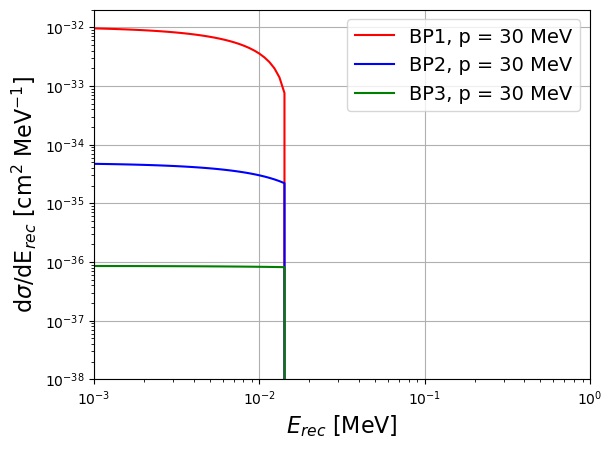

In [11]:
# LET's TEST THE CROSS SECTION

pTEST = 30 # MeV
y_coupTEST = 10**(-15.3)

print('y = ', y_coupTEST)
print('')
print(fr'BP1:  m = {mchiTEST1} MeV, r = {rE1} km, Total number of particles produced in log(10)s = {Nchi1:0.2e}')
print(fr'BP2:  m = {mchiTEST2} MeV, r = {rE2} km, Total number of particles produced in log(10)s = {Nchi2:0.2e}')
print(fr'BP3:  m = {mchiTEST3} MeV, r = {rE3} km, Total number of particles produced in log(10)s = {Nchi3:0.2e}')


Erec_grid = np.logspace(-3, -0, 100)


dsdErec_plot_BP1 = [ DMfermion.dsigmadErec(mchiTEST1, pTEST, ee, y_coupTEST) for ee in Erec_grid ]
dsdErec_plot_BP2 = [ DMfermion.dsigmadErec(mchiTEST2, pTEST, ee, y_coupTEST) for ee in Erec_grid ]
dsdErec_plot_BP3 = [ DMfermion.dsigmadErec(mchiTEST3, pTEST, ee, y_coupTEST) for ee in Erec_grid ]


plt.plot(Erec_grid, dsdErec_plot_BP1, color='red', label=fr'BP1, p = {pTEST} MeV')
plt.plot(Erec_grid, dsdErec_plot_BP2, color='blue', label=fr'BP2, p = {pTEST} MeV')
plt.plot(Erec_grid, dsdErec_plot_BP3, color='green', label=fr'BP3, p = {pTEST} MeV')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3,1)
plt.ylim(1e-38,2e-32)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=16)
plt.ylabel(r"d$\sigma$/dE$_{rec}$ [cm$^2$ MeV$^{-1}$]", fontsize=16)
# plt.title("", fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

### Recoil spectra (signal)

For that you have function $\bf{dspectra}$ defined in the class $\bf{DmAcross}$

Inputs:
- mchi   : DM mass [MeV]
- Erec   : target recoil energy [MeV]
- y_coup : DM-proton coupling
- rad    : radius [km]
- Nchi   : number flux of DM from a SN
        
Returns:
- recoil spectra in [MeV^-1 s^-1 ton^-1]

In [12]:
# LZ energy region > 50% efficiency https://arxiv.org/pdf/2410.17036
Erecmin_LZ = 0.0054 # MeV
Erecmax_LZ = 0.055 # MeV

Mtarget_LZ = 5475 # kg
texp_LZ = 1000 / 365 # 1000 days (15ton yr)  https://arxiv.org/pdf/2102.11740

y =  5.011872336272715e-16

BP1:  m = 6 MeV, r = 55.7 km, Total number of particles produced in log(10)s = 1.68e+56
BP2:  m = 26 MeV, r = 19.6 km, Total number of particles produced in log(10)s = 7.60e+56
BP3:  m = 132 MeV, r = 15.2 km, Total number of particles produced in log(10)s = 5.07e+56


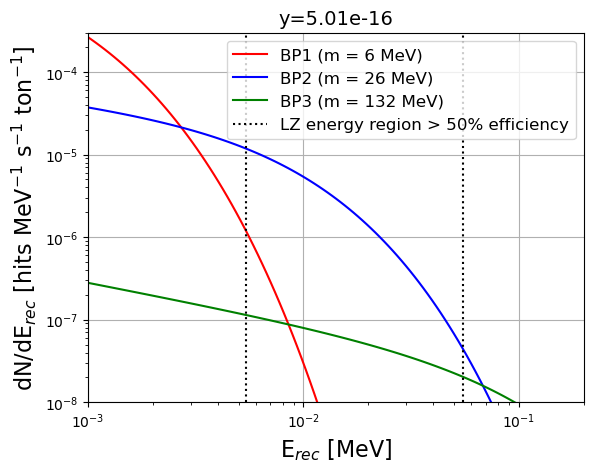

In [13]:
# LET's PLOT THE TARGET RECOIL SPECTRA

print('y = ', y_coupTEST)
print('')
print(fr'BP1:  m = {mchiTEST1} MeV, r = {rE1} km, Total number of particles produced in log(10)s = {Nchi1:0.2e}')
print(fr'BP2:  m = {mchiTEST2} MeV, r = {rE2} km, Total number of particles produced in log(10)s = {Nchi2:0.2e}')
print(fr'BP3:  m = {mchiTEST3} MeV, r = {rE3} km, Total number of particles produced in log(10)s = {Nchi3:0.2e}')


Erec_grid = np.logspace(-3, -1, 100)


dspectra_plot_BP1 = [ DMfermion.dspectra(mchiTEST1, ee, y_coupTEST, rad=rE1, Nchi=Nchi1) for ee in Erec_grid ]
dspectra_plot_BP2 = [ DMfermion.dspectra(mchiTEST2, ee, y_coupTEST, rad=rE2, Nchi=Nchi2) for ee in Erec_grid ]
dspectra_plot_BP3 = [ DMfermion.dspectra(mchiTEST3, ee, y_coupTEST, rad=rE3, Nchi=Nchi3) for ee in Erec_grid ]


plt.plot(Erec_grid, dspectra_plot_BP1, color='red', label=fr'BP1 (m = {mchiTEST1} MeV)')
plt.plot(Erec_grid, dspectra_plot_BP2, color='blue', label=fr'BP2 (m = {mchiTEST2} MeV)')
plt.plot(Erec_grid, dspectra_plot_BP3, color='green', label=fr'BP3 (m = {mchiTEST3} MeV)')
plt.axvline(x=Erecmin_LZ, linestyle=':', color='black', label='LZ energy region > 50% efficiency')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3,2e-1)
plt.ylim(1e-8,3e-4)
plt.xlabel("E$_{rec}$ [MeV]", fontsize=16)
plt.ylabel(r"dN/dE$_{rec}$ [hits MeV$^{-1}$ s$^{-1}$ ton$^{-1}$]", fontsize=16)
plt.title(fr"y={y_coupTEST:0.2e}", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

### Expected number of signal events

For that you have function $\bf{spectra}$ defined in the class $\bf{DmAcross}$

Inputs:
- mchi    : DM mass [MeV]
- y_coup  : DM-proton coupling
- rad     : radius [km]
- Nchi    : number flux of DM from a SN
- Mtarget : target mass [kg]
- Texp    : exposure time [s]
- Emin    : minimum recoil energy of the experiment [MeV]
- Emax    : maximum recoil energy of the experiment [MeV]

mchi, y_coup, rad, Nchi, Mtarget, Texp, Emin, Emax
        
Returns:
- Total number of recoil events

In [14]:
print('y = ', y_coupTEST)
print('')
print(fr'BP1:  m = {mchiTEST1} MeV, r = {rE1} km, Total number of particles produced in log(10)s = {Nchi1:0.2e}')
print(fr'BP2:  m = {mchiTEST2} MeV, r = {rE2} km, Total number of particles produced in log(10)s = {Nchi2:0.2e}')
print(fr'BP3:  m = {mchiTEST3} MeV, r = {rE3} km, Total number of particles produced in log(10)s = {Nchi3:0.2e}')


N1 = DMfermion.spectra(mchiTEST1, y_coupTEST, rE1, Nchi1, Mtarget_LZ, texp_LZ*(365*24*60*60), Erecmin_LZ, Erecmax_LZ)
N2 = DMfermion.spectra(mchiTEST2, y_coupTEST, rE2, Nchi2, Mtarget_LZ, texp_LZ*(365*24*60*60), Erecmin_LZ, Erecmax_LZ)
N3 = DMfermion.spectra(mchiTEST3, y_coupTEST, rE3, Nchi3, Mtarget_LZ, texp_LZ*(365*24*60*60), Erecmin_LZ, Erecmax_LZ)


print('\n Expected number of events for exposure 15 ton yr')
print(fr'  BP1 ---> {N1:.3f} events')
print(fr'  BP2 ---> {N2:.3f} events')
print(fr'  BP3 ---> {N3:.3f} events')

y =  5.011872336272715e-16

BP1:  m = 6 MeV, r = 55.7 km, Total number of particles produced in log(10)s = 1.68e+56
BP2:  m = 26 MeV, r = 19.6 km, Total number of particles produced in log(10)s = 7.60e+56
BP3:  m = 132 MeV, r = 15.2 km, Total number of particles produced in log(10)s = 5.07e+56

 Expected number of events for exposure 15 ton yr
  BP1 ---> 0.662 events
  BP2 ---> 36.837 events
  BP3 ---> 1.020 events


# 3.2 GRID of the expected number of signal events

##### Data

Phys. Rev. D. 100, 075018 (2019) [1905.09284]  -  DeRocco, Graham, Kasen, Marques-Tavares, Rajendran

In [15]:
massesIT = [5, 6, 8, 9, 11, 14, 17, 21, 26, 32, 39, 48, 58, 88, 108, 132, 162, 199, 244, 300]

log10yIT = [-13.3, -13.7, -14, -14.3, -14.7, -15, -15.3, -15.7, -16, -16.3, -16.7, -17, -17.3, 
    -17.7, -18, -18.3, -18.7, -19, -19.3, -19.7, -20, -20.3, -20.7, -21, -21.3, -21.7, -22 ]

In [16]:
numfluxIT = [[2.3e52, 2.9e52, 5.9e52, 4.0e52, 6.2e52, 1.0e53, 9.6e52, 1.4e53, 1.5e53, 1.7e53, 1.2e53, 2.7e53, 2.0e53, 5.1e53, 2.1e53, 2.3e53, 3.0e53, 2.0e53, 7.1e52, 5.1e52], 
             [1.0e53, 1.7e53, 2.1e53, 2.1e53, 2.7e53, 4.0e53, 4.5e53, 5.5e53, 5.5e53, 3.8e53, 1.6e54, 1.0e54, 1.4e54, 1.3e54, 1.0e54, 9.9e53, 9.5e53, 5.6e53, 2.7e53, 3.4e53], 
             [5.0e53, 4.6e53, 6.6e53, 8.9e53, 1.1e54, 1.1e54, 2.2e54, 2.1e54, 2.3e54, 5.3e54, 6.6e54, 4.1e54, 7.8e54, 3.7e54, 4.8e54, 4.7e54, 3.2e54, 1.3e54, 1.0e54, 1.8e54], 
             [2.3e54, 2.5e54, 2.9e54, 4.0e54, 3.4e54, 4.3e54, 7.0e54, 7.3e54, 1.7e55, 1.1e55, 1.7e55, 3.9e55, 2.3e55, 1.8e55, 1.9e55, 1.4e55, 6.9e54, 5.3e54, 6.7e54, 4.4e54], 
             [8.9e54, 1.1e55, 9.7e54, 1.2e55, 1.4e55, 2.6e55, 2.3e55, 1.7e55, 4.6e55, 6.5e55, 5.8e55, 3.9e55, 4.6e55, 6.2e55, 5.3e55, 3.4e55, 1.8e55, 1.9e55, 2.3e55, 4.6e54], 
             [2.4e55, 2.7e55, 3.6e55, 3.8e55, 5.3e55, 6.4e55, 8.0e55, 1.1e56, 1.1e56, 1.1e56, 1.4e56, 2.1e56, 1.4e56, 1.6e56, 1.3e56, 8.6e55, 7.5e55, 8.7e55, 3.3e55, 2.5e54], 
             [5.8e55, 7.3e55, 7.6e55, 1.0e56, 1.2e56, 1.5e56, 2.0e56, 2.6e56, 3.3e56, 4.2e56, 4.6e56, 3.7e56, 4.7e56, 3.9e56, 2.7e56, 2.2e56, 2.7e56, 1.5e56, 2.2e55, 1.2e54], 
             [1.2e56, 1.2e56, 1.5e56, 1.7e56, 1.8e56, 2.0e56, 3.2e56, 4.7e56, 6.1e56, 6.8e56, 8.4e56, 9.5e56, 1.0e57, 6.9e56, 6.5e56, 6.6e56, 4.7e56, 1.1e56, 1.0e55, 5.4e53], 
             [1.7e56, 2.0e56, 2.3e56, 2.4e56, 2.9e56, 4.8e56, 5.5e56, 9.4e56, 1.2e57, 1.4e57, 1.6e57, 1.6e57, 1.7e57, 1.6e57, 1.5e57, 1.2e57, 3.7e56, 5.4e55, 4.8e54, 2.5e53], 
             [3.1e56, 2.7e56, 3.4e56, 3.9e56, 5.3e56, 7.4e56, 1.2e57, 1.3e57, 1.8e57, 2.3e57, 2.4e57, 2.7e57, 2.8e57, 3.0e57, 2.3e57, 8.5e56, 1.8e56, 2.5e55, 2.2e54, 1.2e53], 
             [3.5e56, 4.2e56, 5.6e56, 6.5e56, 7.7e56, 1.5e57, 1.9e57, 2.3e57, 2.9e57, 3.2e57, 3.6e57, 4.1e57, 4.6e57, 3.7e57, 1.5e57, 4.2e56, 8.4e55, 1.2e55, 1.0e54, 5.4e52], 
             [5.6e56, 6.9e56, 9.4e56, 1.3e57, 1.6e57, 2.0e57, 2.8e57, 3.3e57, 4.0e57, 4.6e57, 5.3e57, 6.1e57, 6.8e57, 2.3e57, 7.5e56, 2.0e56, 3.9e55, 5.4e54, 4.8e53, 2.5e52], 
             [8.3e56, 1.2e57, 1.5e57, 2.0e57, 2.3e57, 3.4e57, 3.9e57, 4.2e57, 4.8e57, 6.7e57, 8.0e57, 8.8e57, 6.4e57, 1.1e57, 3.5e56, 9.1e55, 1.8e55, 2.5e54, 2.2e53, 1.2e52], 
             [1.3e57, 1.9e57, 2.7e57, 3.1e57, 3.7e57, 4.4e57, 5.1e57, 5.4e57, 6.7e57, 9.7e57, 1.1e58, 7.4e57, 3.4e57, 5.1e56, 1.6e56, 4.2e55, 8.4e54, 1.2e54, 1.0e53, 5.4e51], 
             [1.8e57, 2.7e57, 3.4e57, 4.3e57, 5.0e57, 5.6e57, 6.5e57, 7.5e57, 1.1e58, 1.2e58, 8.2e57, 3.8e57, 1.6e57, 2.4e56, 7.5e55, 2.0e55, 3.9e54, 5.4e53, 4.8e52, 2.5e51], 
             [2.4e57, 3.2e57, 4.5e57, 5.5e57, 6.3e57, 7.8e57, 8.5e57, 1.2e58, 1.3e58, 8.9e57, 4.1e57, 1.8e57, 7.4e56, 1.1e56, 3.5e55, 9.1e54, 1.8e54, 2.5e53, 2.2e52, 1.2e51], 
             [3.4e57, 4.3e57, 5.5e57, 6.6e57, 8.5e57, 9.9e57, 1.3e58, 1.5e58, 9.5e57, 4.4e57, 1.9e57, 8.2e56, 3.4e56, 5.1e55, 1.6e55, 4.2e54, 8.4e53, 1.2e53, 1.0e52, 5.4e50], 
             [4.4e57, 5.5e57, 6.6e57, 7.8e57, 1.1e58, 1.4e58, 1.6e58, 1.0e58, 4.6e57, 2.0e57, 8.9e56, 3.8e56, 1.6e56, 2.4e55, 7.5e54, 2.0e54, 3.9e53, 5.4e52, 4.8e51, 2.5e50], 
             [5.6e57, 6.6e57, 7.7e57, 1.0e58, 1.4e58, 1.6e58, 1.0e58, 4.9e57, 2.1e57, 9.4e56, 4.1e56, 1.8e56, 7.4e55, 1.1e55, 3.5e54, 9.1e53, 1.8e53, 2.5e52, 2.2e51, 1.2e50], 
             [6.6e57, 7.4e57, 9.4e57, 1.5e58, 1.7e58, 1.1e58, 5.1e57, 2.3e57, 1.0e57, 4.4e56, 1.9e56, 8.2e55, 3.4e55, 5.1e54, 1.6e54, 4.2e53, 8.4e52, 1.2e52, 1.0e51, 5.4e49], 
             [8.4e57, 1.0e58, 1.5e58, 1.7e58, 1.1e58, 5.4e57, 2.4e57, 1.1e57, 4.6e56, 2.0e56, 8.9e55, 3.8e55, 1.6e55, 2.4e54, 7.5e53, 2.0e53, 3.9e52, 5.4e51, 4.8e50, 2.5e49], 
             [1.1e58, 1.5e58, 1.8e58, 1.2e58, 5.6e57, 2.5e57, 1.1e57, 4.9e56, 2.1e56, 9.4e55, 4.1e55, 1.8e55, 7.4e54, 1.1e54, 3.5e53, 9.1e52, 1.8e52, 2.5e51, 2.2e50, 1.2e49], 
             [1.5e58, 1.8e58, 1.3e58, 5.9e57, 2.6e57, 1.2e57, 5.1e56, 2.3e56, 1.0e56, 4.4e55, 1.9e55, 8.2e54, 3.4e54, 5.1e53, 1.6e53, 4.2e52, 8.4e51, 1.2e51, 1.0e50, 5.4e48], 
             [1.8e58, 1.3e58, 6.2e57, 2.7e57, 1.2e57, 5.4e56, 2.4e56, 1.1e56, 4.6e55, 2.0e55, 8.9e54, 3.8e54, 1.6e54, 2.4e53, 7.5e52, 2.0e52, 3.9e51, 5.4e50, 4.8e49, 2.5e48], 
             [1.4e58, 6.5e57, 2.9e57, 1.3e57, 5.6e56, 2.5e56, 1.1e56, 4.9e55, 2.1e55, 9.4e54, 4.1e54, 1.8e54, 7.4e53, 1.1e53, 3.5e52, 9.1e51, 1.8e51, 2.5e50, 2.2e49, 1.2e48], 
             [6.8e57, 3.0e57, 1.3e57, 5.9e56, 2.6e56, 1.2e56, 5.1e55, 2.3e55, 1.0e55, 4.4e54, 1.9e54, 8.2e53, 3.4e53, 5.1e52, 1.6e52, 4.2e51, 8.4e50, 1.2e50, 1.0e49, 5.4e47], 
             [3.2e57, 1.4e57, 6.2e56, 2.7e56, 1.2e56, 5.4e55, 2.4e55, 1.1e55, 4.6e54, 2.0e54, 8.9e53, 3.8e53, 1.6e53, 2.4e52, 7.5e51, 2.0e51, 3.9e50, 5.4e49, 4.8e48, 2.5e47]
            ]


In [17]:
energysphereIT = [
    [300.0, 248.0, 203.0, 167.0, 136.0, 111.0, 89.8, 72.8, 59.3, 48.2, 31.9, 25.7, 22.4, 20.8, 19.8, 19.2, 18.6, 18.0, 17.5, 16.9],
    [233.0, 192.0, 156.0, 127.0, 104.0, 84.4, 69.0, 55.9, 45.5, 37.1, 24.3, 21.9, 20.5, 19.7, 19.0, 18.4, 17.9, 17.3, 16.8, 16.3],
    [181.0, 148.0, 121.0, 98.5, 80.1, 65.1, 53.0, 43.1, 35.1, 28.6, 21.5, 20.3, 19.5, 18.8, 18.3, 17.7, 17.2, 16.7, 16.2, 15.7],
    [141.0, 114.0, 93.6, 76.2, 62.2, 50.6, 41.2, 33.6, 27.2, 22.9, 20.0, 19.3, 18.7, 18.1, 17.6, 17.1, 16.6, 16.1, 15.5, 15.0],
    [110.0, 89.3, 72.8, 59.5, 48.4, 39.5, 32.1, 26.1, 22.4, 20.8, 19.2, 18.6, 18.0, 17.5, 17.0, 16.5, 16.0, 15.4, 14.9, 14.2],
    [86.1, 70.4, 57.4, 46.7, 38.0, 31.0, 25.1, 22.1, 20.6, 19.7, 18.5, 17.9, 17.4, 16.9, 16.4, 15.9, 15.3, 14.8, 14.0, 12.8],
    [68.0, 55.7, 45.3, 36.9, 30.1, 24.4, 21.8, 20.4, 19.6, 18.9, 17.8, 17.3, 16.8, 16.3, 15.8, 15.2, 14.7, 13.8, 12.5, 10.7],
    [54.2, 44.2, 36.1, 29.3, 23.9, 21.6, 20.3, 19.5, 18.9, 18.3, 17.2, 16.7, 16.2, 15.7, 15.2, 14.6, 13.7, 12.2, 10.3, "Bulk"],
    [43.4, 35.4, 28.9, 23.6, 21.4, 20.2, 19.4, 18.8, 18.2, 17.7, 16.6, 16.1, 15.6, 15.1, 14.5, 13.4, 11.9, "Bulk", "Bulk", "Bulk"],
    [34.9, 28.4, 23.4, 21.3, 20.1, 19.3, 18.7, 18.1, 17.6, 17.1, 16.0, 15.5, 15.0, 14.4, 13.3, 11.7, "Bulk", "Bulk", "Bulk", "Bulk"],
    [28.1, 23.2, 21.1, 20.0, 19.3, 18.7, 18.1, 17.6, 17.0, 16.5, 15.5, 14.9, 14.2, 13.1, 11.4, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [23.2, 21.1, 20.0, 19.2, 18.6, 18.1, 17.5, 17.0, 16.5, 15.9, 14.9, 14.1, 12.9, 11.1, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [21.0, 19.9, 19.2, 18.6, 18.0, 17.5, 16.9, 16.4, 15.9, 15.4, 14.0, 12.7, 11.0, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [19.9, 19.2, 18.6, 18.0, 17.5, 16.9, 16.4, 15.9, 15.3, 14.8, 12.6, 10.8, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [19.2, 18.6, 18.0, 17.4, 16.9, 16.4, 15.8, 15.3, 14.8, 13.9, 10.6, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [18.6, 18.0, 17.4, 16.9, 16.4, 15.8, 15.3, 14.7, 13.8, 12.4, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [18.0, 17.4, 16.9, 16.4, 15.8, 15.3, 14.7, 13.8, 12.4, 10.4, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [17.4, 16.9, 16.4, 15.8, 15.3, 14.7, 13.8, 12.3, 10.4, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [16.9, 16.4, 15.8, 15.3, 14.7, 13.8, 12.3, 10.3, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [16.4, 15.8, 15.3, 14.7, 13.8, 12.3, 10.4, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [15.9, 15.3, 14.8, 13.8, 12.4, 10.4, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [15.3, 14.8, 13.9, 12.4, 10.4, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [14.8, 13.9, 12.4, 10.5, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [14.0, 12.5, 10.6, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [12.6, 10.7, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [10.8, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    ["Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"]
]


##### check

In [18]:
LZ_back = 6.18  # https://arxiv.org/pdf/1802.06039, pag 9, table III
LZ_signal_128 = 1.28*(LZ_back**0.5) # 90 % C.L.
LZ_signal_164 = 1.64*(LZ_back**0.5) # 95 % C.L.
LZ_signal_196 = 1.96*(LZ_back**0.5) # 97.5% C.L

print('Expected background events in LZ 15ton yr:    B = ', LZ_back)

print('\n Number of hits to get a value of Z=S/sqrt(B): ')
print(fr'   N_events = {LZ_signal_128:.3f}       for 90% C.L.,   Z = ', 1.28 )
print(fr'   N_events = {LZ_signal_164:.3f}       for 95% C.L.,   Z = ', 1.64 )
print(fr'   N_events = {LZ_signal_196:.3f}       for 97.5% C.L., Z = ', 1.96 )

print(' ------- ')
print(' Considering a BACKGROUND FREE experiment: ')
print('   N_events = 2.302       for 90% C.L.')
print('   N_events = 2.996       for 90% C.L.')
print('   N_events = 3.87        for 90% C.L.')
      


# XENON1T https://arxiv.org/pdf/1805.12562
XENON1T_back = 7.36
XENON1T_signal_128 = 1.28*(XENON1T_back**0.5)
XENON1T_signal_164 = 1.64*(XENON1T_back**0.5)
XENON1T_signal_196 = 1.96*(XENON1T_back**0.5)

Expected background events in LZ 15ton yr:    B =  6.18

 Number of hits to get a value of Z=S/sqrt(B): 
   N_events = 3.182       for 90% C.L.,   Z =  1.28
   N_events = 4.077       for 95% C.L.,   Z =  1.64
   N_events = 4.872       for 97.5% C.L., Z =  1.96
 ------- 
 Considering a BACKGROUND FREE experiment: 
   N_events = 2.302       for 90% C.L.
   N_events = 2.996       for 90% C.L.
   N_events = 3.87        for 90% C.L.


m =  8  MeV
log10(y_coup) =  -16.0
r_energy sphere =  28.9  km
Number flux * log(10) =  5.295945713886306e+56


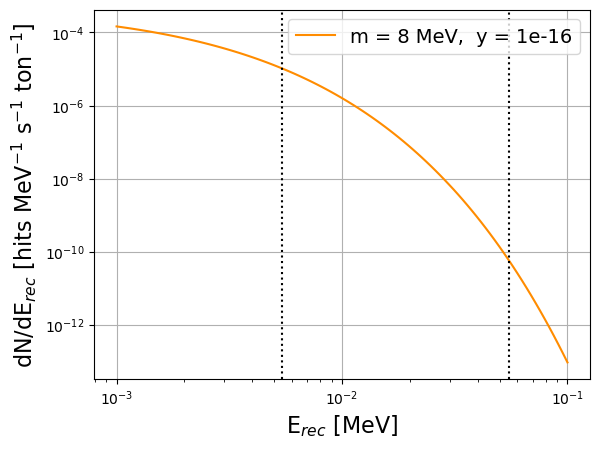


 Expected number of signal events:  12.278954806171937
 Z =  4.939319999776919


In [19]:
m_it = 2 # index
y_it = 8 # index

m_ev = massesIT[m_it]
y_ev = 10**(log10yIT[y_it])

print("m = ", m_ev, " MeV")
print("log10(y_coup) = ", np.log10(y_ev))

r_ev = energysphereIT[y_it][m_it]
N_ev = numfluxIT[y_it][m_it] * np.log(10)

print("r_energy sphere = ", r_ev, " km")
print("Number flux * log(10) = ", N_ev)



Mtarget = Mtarget_LZ # kg
texp = texp_LZ # years

Emin = Erecmin_LZ # MeV
Emax = Erecmax_LZ # MeV



# diff spectra
Erec_grid = np.logspace(-3, -1, 100)

dspectra_plot1 = [ DMfermion.dspectra(m_ev, ee, y_ev, r_ev, N_ev) for ee in Erec_grid ]

plt.plot(Erec_grid, dspectra_plot1, color='darkorange', label=fr'm = {m_ev} MeV,  y = {y_ev}')
plt.axvline(x=Emin, linestyle=':', color='black')
plt.axvline(x=Emax, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("E$_{rec}$ [MeV]", fontsize=16)
plt.ylabel(r"dN/dE$_{rec}$ [hits MeV$^{-1}$ s$^{-1}$ ton$^{-1}$]", fontsize=16)
plt.legend(fontsize=14)
plt.grid()
plt.show()


# number of signal events
HITS = DMfermion.spectra(m_ev, 
                  y_ev, 
                  r_ev, 
                  N_ev, 
                  Mtarget, 
                  texp * Units.seconds_in_year, 
                  Emin, 
                  Emax)

print('\n Expected number of signal events: ', HITS)
print(' Z = ', HITS / (LZ_back**0.5))

### Compute the expected signal for each grid point (takes some time and is already saved)

In [24]:
#####################
# LOAD EFFICIENCIES #
#####################

from scipy.interpolate import interp1d

# LZ high E_rec^threshold
eff_LZ2024_high_aux = np.loadtxt("data/Efficiencies-NR-DD/Eff-NR-LZ2024.txt")
eff_LZ_high = interp1d( eff_LZ2024_high_aux[:,0], eff_LZ2024_high_aux[:,1], kind='linear', bounds_error=False, fill_value='extrapolate' )

# XENONnT high E_rec^threshold
eff_XENONnT2025_high_aux = np.loadtxt("data/Efficiencies-NR-DD/Eff-NR-XENONnT2025.txt")
eff_XENONnT_high = interp1d( eff_XENONnT2025_high_aux[:,0], eff_XENONnT2025_high_aux[:,1], kind='linear', bounds_error=False, fill_value='extrapolate' )

# PandaX-4T high E_rec^threshold
eff_PandaX4T2024_high_aux = np.loadtxt("data/Efficiencies-NR-DD/Eff-NR-PandaX4T2021-2024.txt")
eff_PandaX4T_high = interp1d( eff_PandaX4T2024_high_aux[:,0], eff_PandaX4T2024_high_aux[:,1], kind='linear', bounds_error=False, fill_value='extrapolate' )



# LZ low E_rec^threshold
eff_LZ2025_low_aux = np.loadtxt("data/Efficiencies-NR-DD/Eff-NR-LZ2025.txt")
eff_LZ_low = interp1d( eff_LZ2025_low_aux[:,0], eff_LZ2025_low_aux[:,1], kind='linear', bounds_error=False, fill_value='extrapolate' )

# XENONnT low E_rec^threshold
eff_XENONnT2026_low_aux = np.loadtxt("data/Efficiencies-NR-DD/Eff-NR-XENONnT2026.txt")
eff_XENONnT_low = interp1d( eff_XENONnT2026_low_aux[:,0], eff_XENONnT2026_low_aux[:,1], kind='linear', bounds_error=False, fill_value='extrapolate' )

# PandaX-4T low E_rec^threshold
eff_PandaX4T2025_low_aux = np.loadtxt("data/Efficiencies-NR-DD/Eff-NR-PandaX4T2025.txt")
eff_PandaX4T_low = interp1d( eff_PandaX4T2025_low_aux[:,0], eff_PandaX4T2025_low_aux[:,1], kind='linear', bounds_error=False, fill_value='extrapolate' )

y =  5.011872336272715e-16

BP2:  m = 26 MeV, r = 19.6 km, Total number of particles produced in log(10)s = 7.60e+56


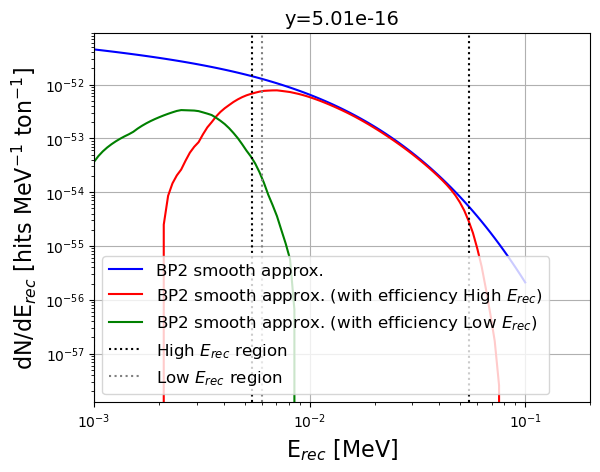

In [25]:
# LET's PLOT THE TARGET RECOIL SPECTRA

print('y = ', y_coupTEST)
print('')
print(fr'BP2:  m = {mchiTEST2} MeV, r = {rE2} km, Total number of particles produced in log(10)s = {Nchi2:0.2e}')


# With diffuse approximation
Erec_grid = np.logspace(-3, -1, 100)


dspectra_plot_BP2 = [ diffSNfactor * ExpTIME * DMfermion.dspectra(mchiTEST2, ee, y_coupTEST, rad=rE2, Nchi=Nchi2) for ee in Erec_grid ]
dspectra_plot_BP2_eff = [ diffSNfactor * ExpTIME * DMfermion.dspectra(mchiTEST2, ee, y_coupTEST, rad=rE2, Nchi=Nchi2) * eff_LZ_high(ee*1000) for ee in Erec_grid ]
dspectra_plot_BP2_eff2 = [ diffSNfactor * ExpTIME * DMfermion.dspectra(mchiTEST2, ee, y_coupTEST, rad=rE2, Nchi=Nchi2) * eff_LZ_low(ee*1000) for ee in Erec_grid ]

plt.plot(Erec_grid, dspectra_plot_BP2, color='blue', label=fr'BP2 smooth approx.')
plt.plot(Erec_grid, dspectra_plot_BP2_eff, color='red', label=fr'BP2 smooth approx. (with efficiency High $E_{{rec}}$)')
plt.plot(Erec_grid, dspectra_plot_BP2_eff2, color='green', label=fr'BP2 smooth approx. (with efficiency Low $E_{{rec}}$)')
plt.axvline(x=Erecmin_LZ, linestyle=':', color='black', label='High $E_{rec}$ region')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.axvline(x=0.001, linestyle=':', color='gray', label='Low $E_{rec}$ region')
plt.axvline(x=0.006, linestyle=':', color='gray')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3,2e-1)
# plt.ylim(1e-8,3e-4)
plt.xlabel("E$_{rec}$ [MeV]", fontsize=16)
plt.ylabel(r"dN/dE$_{rec}$ [hits MeV$^{-1}$ ton$^{-1}$]", fontsize=16)
plt.title(fr"y={y_coupTEST:0.2e}", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [26]:
# TEST #

Mtarget = Mtarget_LZ # kg
texp = texp_LZ # years

Emin = Erecmin_LZ # MeV
Emax = Erecmax_LZ # MeV



Erec_bins = np.array([Emin, Emax]) # a single bin



iit = 0 # universe 
m_it = 1 # mass
y_it = 14 #

print('mass ', massesIT[m_it])
print('coupling ', log10yIT[y_it])



m_ev = massesIT[m_it]
y_ev = 10**(log10yIT[y_it])
r_ev = energysphereIT[y_it][m_it]



# If r_ev is "Bulk", skip and set result to 0
if isinstance(r_ev, str) and r_ev.lower() == "bulk":
  print('BULK!')

N_ev = numfluxIT[y_it][m_it] * np.log(10)

result1 = DMfermion.spectra_eff( m_ev, y_ev, r_ev, N_ev, Mtarget, texp * Units.seconds_in_year, Emin, Emax, eff_LZ_high )

# considering only 1 bin, multiply by its length to obtain the total number of events (integrate in E)
print('hits (with efficiency)')
print(result1 * (Emax - Emin))


result2 = DMfermion.spectra( m_ev, y_ev, r_ev, N_ev, Mtarget, texp * Units.seconds_in_year, Emin, Emax )
print('hits (without efficiency)')
print(result2 * (Emax - Emin))

mass  6
coupling  -18
hits (with efficiency)
4.001708895185677
hits (without efficiency)
4.695788773401887


### 1. Diffuse approximation (TAKES TIME already saved below)

#### XENON1T 1 ton yr (old, just to compare)

In [167]:
# FOR XENON1T, with 1 ton yr exposure

Mtarget = 1300 # kg
texp = 278.8/365  # years

Emin = 0.005 # MeV
Emax = 0.0409 # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_XENON1tonyr.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")
    
    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

DONE


In [161]:
# FOR XENON1T, with 1 ton yr exposure

Mtarget = 1300 # kg
texp = 278.8/365  # years

Emin = 0.005 # MeV
Emax = 0.0409 # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_XENON1tonyr_eff.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")
    
    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra_eff(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax,
                eff_LZ_high
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

DONE


#### XENONnT 3.1 ton yr (current)

In [193]:
# FOR XENONnT, with 3.1 ton yr exposure

Mtarget = 4018 # kg
texp = 281.6/365 # years

Emin = 0.0038 # MeV
Emax = 0.0641 # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_XENONnT.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")
    
    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

DONE


In [194]:
# FOR XENONnT, with 3.1 ton yr exposure

Mtarget = 4018 # kg
texp = 281.6/365 # years

Emin = 0.0038 # MeV
Emax = 0.0641 # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_XENONnT_eff.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")
    
    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra_eff(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax,
                eff_XENONnT_high
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

DONE


#### LZ 4.2 ton yr (current)

In [195]:
# FOR XENON1T, with 1 ton yr exposure

Mtarget = 5475 # kg
texp = 280/365 # years

Emin = 0.0054 # MeV
Emax = 0.055 # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_LZ42.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")
    
    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

DONE


In [196]:
# FOR XENON1T, with 1 ton yr exposure

Mtarget = 5475 # kg
texp = 280/365 # years

Emin = 0.0054 # MeV
Emax = 0.055 # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_LZ42_eff.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")
    
    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra_eff(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax,
                eff_LZ_high
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

DONE


#### LZ 15 ton yr (projections)

In [ ]:
# FOR LZ, with 15 ton yr exposure

Mtarget = Mtarget_LZ # kg
texp = texp_LZ # years

Emin = Erecmin_LZ # MeV
Emax = Erecmax_LZ # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_LZ15tonyr.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")
    
    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

In [158]:
# FOR LZ, with 15 ton yr exposure

Mtarget = Mtarget_LZ # kg
texp = texp_LZ # years

Emin = Erecmin_LZ # MeV
Emax = Erecmax_LZ # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_LZ15tonyr_eff.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")
    
    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra_eff(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax,
                eff_LZ_high
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:154: RuntimeWarning: overflow encountered in exp
  numerator = (p**3 / (np.exp(E_aux / T_r) + 1)) * (1./ E_aux)


DONE


#### PandaX-4T 1.54 ton yr (current)

In [197]:
# FOR XENON1T, with 1 ton yr exposure

Mtarget = 2170 # kg
texp = 259/365 # years

Emin = 0.003 # MeV
Emax = 0.1 # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_PandaX4T.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")
    
    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

DONE


In [198]:
# FOR XENON1T, with 1 ton yr exposure

Mtarget = 2170 # kg
texp = 259/365 # years

Emin = 0.003 # MeV
Emax = 0.1 # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_PandaX4T_eff.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")
    
    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra_eff(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax,
                eff_PandaX4T_high
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

DONE


#### XENONnT 7.83 ton yr (current)

In [ ]:
# FOR XENONnT, with 7.83 ton yr exposure

Mtarget = 4950 # kg
texp = 579/365 # years

Emin = 0.0005 # MeV
Emax = 0.005 # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_XENONnT_low.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")

    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

In [ ]:
# FOR XENONnT, with 7.83 ton yr exposure

Mtarget = 4950 # kg
texp = 579/365 # years

Emin = 0.0005 # MeV
Emax = 0.005 # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_XENONnT_low_eff.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")

    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra_eff(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax,
                eff_XENONnT_low
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

#### LZ 5.7 ton yr (current)

In [ ]:
# FOR LZ, with 5.7 ton yr exposure

Mtarget = 5090 # kg
texp = 417/365 # years

Emin = 0.001 # MeV
Emax = 0.006 # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_LZ57_low.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")

    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

In [ ]:
# FOR LZ, with 5.7 ton yr exposure

Mtarget = 5090 # kg
texp = 417/365 # years

Emin = 0.001 # MeV
Emax = 0.006 # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_LZ57_low_eff.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")

    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra_eff(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax,
                eff_LZ_low
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

#### PandaX-4T 2.24 ton yr (current)

In [ ]:
# FOR PandaX-4T, with 2.24 ton yr exposure

Mtarget = 3150 # kg
texp = 259/365 # years

Emin = 0.00033 # MeV
Emax = 0.003 # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_PandaX4T_low.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")

    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

In [ ]:
# FOR PandaX-4T, with 2.24 ton yr exposure

Mtarget = 3150 # kg
texp = 259/365 # years

Emin = 0.00033 # MeV
Emax = 0.003 # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/fermionicDM-smooth/Nhits_grid_PandaX4T_low_eff.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")

    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra_eff(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax,
                eff_PandaX4T_low
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

###  LOAD

#### Diffuse approximation

In [28]:
################
# LZ 15 ton yr #
################

# LOAD
data = np.loadtxt("data/fermionicDM-smooth/Nhits_grid_LZ15tonyr.dat", comments="#")

log10y_vals_all = data[:, 0]
mass_vals_all   = data[:, 1]
Nhits_all       = data[:, 2]

# lengths
n_y = len(np.unique(log10y_vals_all))
n_m = len(np.unique(mass_vals_all))


log10y_vals_LZ15tonyr = log10y_vals_all[::n_m]  # each row has n_m masses
mass_vals_LZ15tonyr   = mass_vals_all[:n_m]     # the 1st row

# Reshape
Nhits_grid_LZ15tonyr = Nhits_all.reshape((n_y, n_m))



# LOAD
data = np.loadtxt("data/fermionicDM-smooth/Nhits_grid_LZ15tonyr_eff.dat", comments="#")

log10y_vals_all = data[:, 0]
mass_vals_all   = data[:, 1]
Nhits_all       = data[:, 2]

# lengths
n_y = len(np.unique(log10y_vals_all))
n_m = len(np.unique(mass_vals_all))


log10y_vals_LZ15tonyr_eff = log10y_vals_all[::n_m]  # each row has n_m masses
mass_vals_LZ15tonyr_eff   = mass_vals_all[:n_m]     # the 1st row

# Reshape
Nhits_grid_LZ15tonyr_eff = Nhits_all.reshape((n_y, n_m))



############
# XENON 1T #
############

# LOAD
data = np.loadtxt("data/fermionicDM-smooth/Nhits_grid.dat", comments="#")

log10y_vals_all = data[:, 0]
mass_vals_all   = data[:, 1]
Nhits_all       = data[:, 2]

# lengths
n_y = len(np.unique(log10y_vals_all))
n_m = len(np.unique(mass_vals_all))


log10y_vals = log10y_vals_all[::n_m]  # each row has n_m masses
mass_vals   = mass_vals_all[:n_m]     # the 1st row

# Reshape
Nhits_grid = Nhits_all.reshape((n_y, n_m))



# LOAD
data_XENON1T_eff= np.loadtxt("data/fermionicDM-smooth/Nhits_grid_XENON1tonyr_eff.dat", comments="#")

log10y_vals_all_XENON1T_eff = data_XENON1T_eff[:, 0]
mass_vals_all_XENON1T_eff   = data_XENON1T_eff[:, 1]
Nhits_all_XENON1T_eff       = data_XENON1T_eff[:, 2]

# lengths
n_y = len(np.unique(log10y_vals_all_XENON1T_eff))
n_m = len(np.unique(mass_vals_all_XENON1T_eff))


log10y_vals_XENON1T_eff = log10y_vals_all_XENON1T_eff[::n_m]  # each row has n_m masses
mass_vals_XENON1T_eff   = mass_vals_all_XENON1T_eff[:n_m]     # the 1st row

# Reshape
Nhits_grid_XENON1T_eff = Nhits_all_XENON1T_eff.reshape((n_y, n_m))



# LOAD
data_lowErec = np.loadtxt("data/fermionicDM-smooth/Nhits_grid_lowErecmin.dat", comments="#")

log10y_vals_all_lowErec = data_lowErec[:, 0]
mass_vals_all_lowErec   = data_lowErec[:, 1]
Nhits_all_lowErec       = data_lowErec[:, 2]

# lengths
n_y = len(np.unique(log10y_vals_all_lowErec))
n_m = len(np.unique(mass_vals_all_lowErec))


log10y_vals_lowErec = log10y_vals_all_lowErec[::n_m]  # each row has n_m masses
mass_vals_lowErec   = mass_vals_all_lowErec[:n_m]     # the 1st row

# Reshape
Nhits_grid_lowErec = Nhits_all_lowErec.reshape((n_y, n_m))

#### PLOT

Solid contour   --> Expected events =  2.302
Dashed contour  --> Expected events =  3.472552951360137


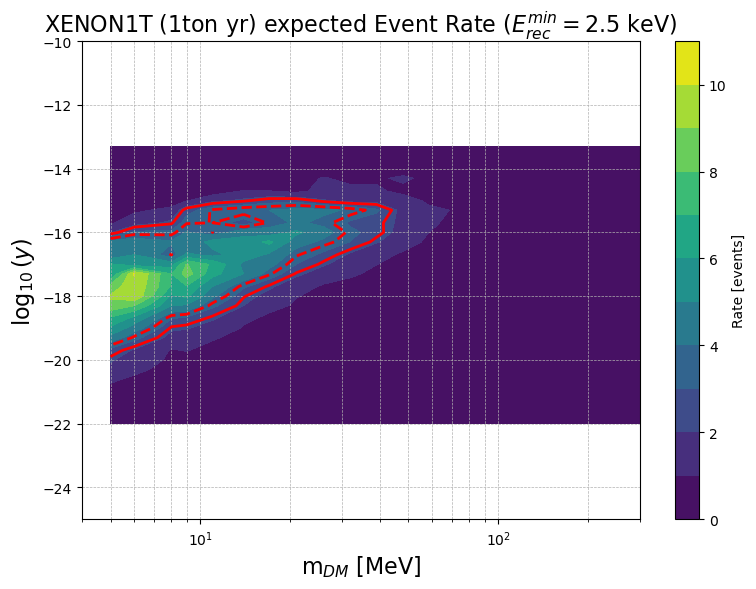

Solid contour   --> Expected events =  2.302
Dashed contour  --> Expected events =  3.472552951360137


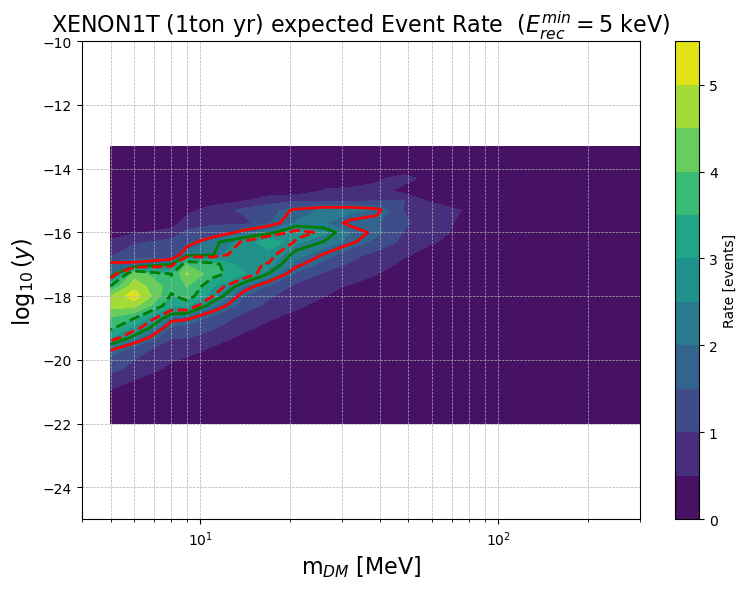

Solid contour   --> Expected events =  2.302
Dashed contour  --> Expected events =  3.1820295410319495


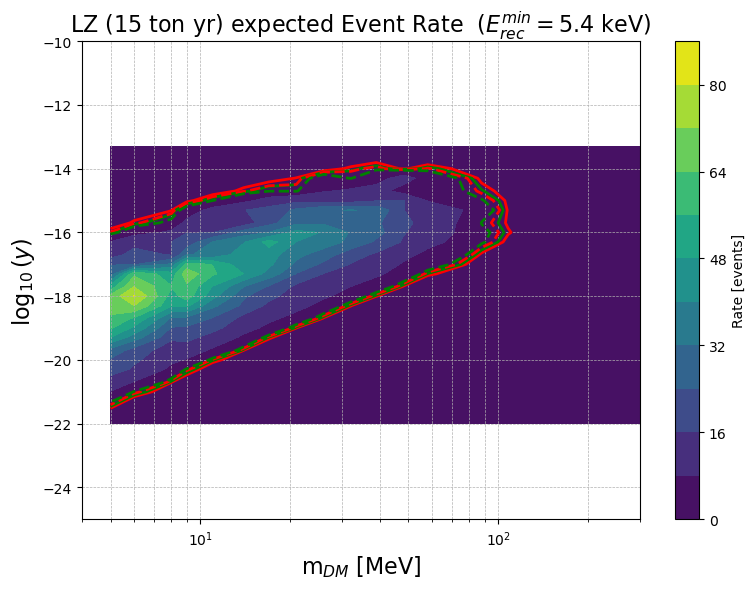

In [29]:
# Grid
M, Y = np.meshgrid(mass_vals_lowErec, log10y_vals_lowErec)

plt.figure(figsize=(8, 6))

cp = plt.contourf(M, Y, Nhits_grid_lowErec, levels=10, cmap='viridis')
plt.colorbar(cp, label='Rate [events]')

S_level = 2.302 # 90 CL if background free
print('Solid contour   --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid_lowErec, levels=[S_level], colors='red', linewidths=2)
# plt.clabel(contour_line, fmt={S_level: 'S=1'}, fontsize=12)

S_level = XENON1T_signal_128
print('Dashed contour  --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid_lowErec, levels=[S_level], colors='red', linewidths=2, linestyles='dashed')
# plt.clabel(contour_line, fmt={S_level: '90% C.L.'}, fontsize=8)

plt.xscale('log')
plt.xlim(4,300)
plt.ylim(-25,-10)
plt.xlabel("m$_{DM}$ [MeV]", fontsize=16)
plt.ylabel(r"$\log_{10}(y)$", fontsize=16)
plt.title("XENON1T (1ton yr) expected Event Rate ($E_{rec}^{min}=2.5$ keV)", fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()





# Grid
M, Y = np.meshgrid(mass_vals, log10y_vals)
M_eff, Y_eff = np.meshgrid(mass_vals_XENON1T_eff, log10y_vals_XENON1T_eff)

plt.figure(figsize=(8, 6))

cp = plt.contourf(M, Y, Nhits_grid_XENON1T_eff, levels=10, cmap='viridis')
plt.colorbar(cp, label='Rate [events]')

S_level = 2.302 # 90 CL if background free
print('Solid contour   --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid, levels=[S_level], colors='red', linewidths=2)
contour_line = plt.contour(M_eff, Y_eff, Nhits_grid_XENON1T_eff, levels=[S_level], colors='green', linewidths=2)
# plt.clabel(contour_line, fmt={S_level: 'S=1'}, fontsize=12)

S_level = XENON1T_signal_128
print('Dashed contour  --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid, levels=[S_level], colors='red', linewidths=2, linestyles='dashed')
contour_line = plt.contour(M_eff, Y_eff, Nhits_grid_XENON1T_eff, levels=[S_level], colors='green', linewidths=2, linestyles='dashed')
# plt.clabel(contour_line, fmt={S_level: '90% C.L.'}, fontsize=8)

plt.xscale('log')
plt.xlim(4,300)
plt.ylim(-25,-10)
plt.xlabel("m$_{DM}$ [MeV]", fontsize=16)
plt.ylabel(r"$\log_{10}(y)$", fontsize=16)
plt.title("XENON1T (1ton yr) expected Event Rate  ($E_{rec}^{min}=5$ keV)", fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()





# Grid
M, Y = np.meshgrid(mass_vals_LZ15tonyr, log10y_vals_LZ15tonyr)
M_eff, Y_eff = np.meshgrid(mass_vals_LZ15tonyr_eff, log10y_vals_LZ15tonyr_eff)

plt.figure(figsize=(8, 6))

cp = plt.contourf(M, Y, Nhits_grid_LZ15tonyr_eff, levels=10, cmap='viridis')
plt.colorbar(cp, label='Rate [events]')

S_level = 2.302 # 90 CL if background free
print('Solid contour   --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid_LZ15tonyr, levels=[S_level], colors='red', linewidths=2)
contour_line = plt.contour(M_eff, Y_eff, Nhits_grid_LZ15tonyr_eff, levels=[S_level], colors='green', linewidths=2)
# plt.clabel(contour_line, fmt={S_level: 'S=1'}, fontsize=12)

S_level = LZ_signal_128
print('Dashed contour  --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid_LZ15tonyr, levels=[S_level], colors='red', linewidths=2, linestyles='dashed')
contour_line = plt.contour(M_eff, Y_eff, Nhits_grid_LZ15tonyr_eff, levels=[S_level], colors='green', linewidths=2, linestyles='dashed')
# plt.clabel(contour_line, fmt={S_level: '90% C.L.'}, fontsize=8)

plt.xscale('log')
plt.xlim(4,300)
plt.ylim(-25,-10)
plt.xlabel("m$_{DM}$ [MeV]", fontsize=16)
plt.ylabel(r"$\log_{10}(y)$", fontsize=16)
plt.title("LZ (15 ton yr) expected Event Rate  ($E_{rec}^{min}=5.4$ keV)", fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

#### Analyses with high E_rec^threshold  (background free)

Background free: 90% C.L. for S=2.302

/tmp/ipykernel_9233/610675088.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


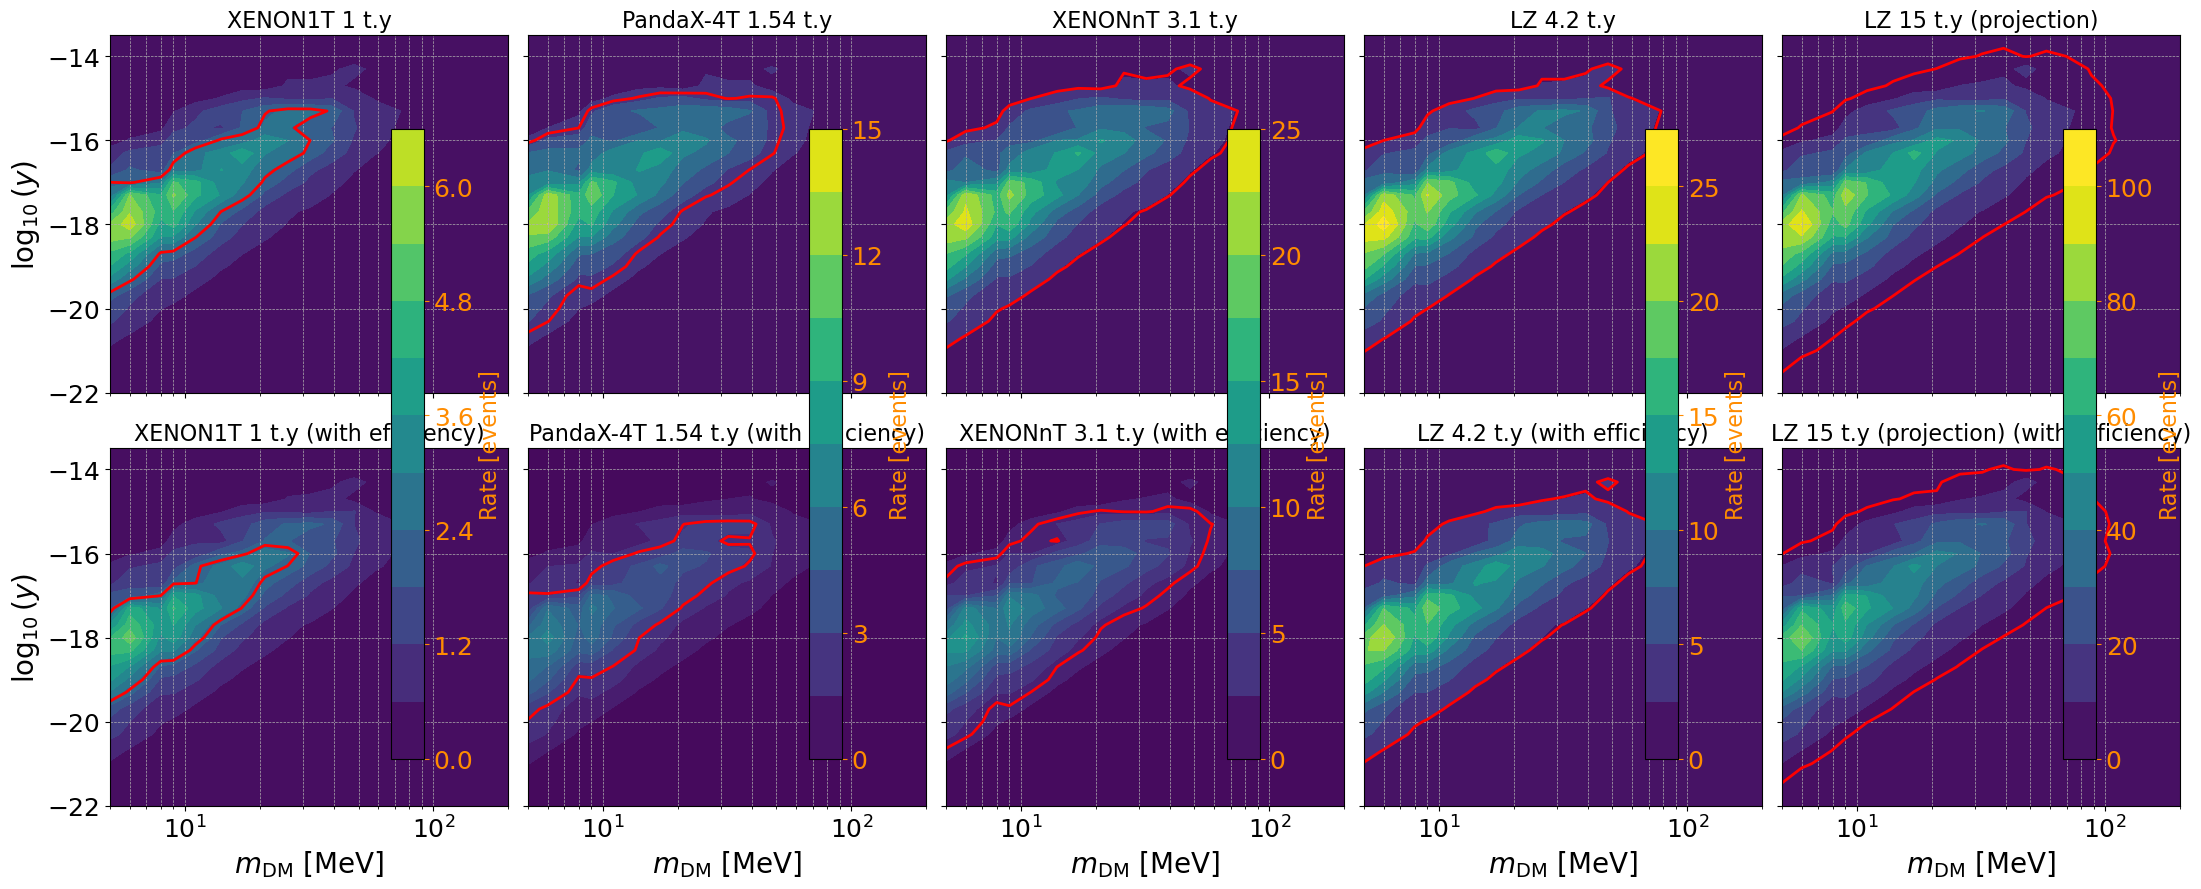

In [30]:
from matplotlib.colors import Normalize

files = [
    "data/fermionicDM-smooth/Nhits_grid_XENON1tonyr.dat",
    "data/fermionicDM-smooth/Nhits_grid_PandaX4T.dat",
    "data/fermionicDM-smooth/Nhits_grid_XENONnT.dat",
    "data/fermionicDM-smooth/Nhits_grid_LZ42.dat",
    "data/fermionicDM-smooth/Nhits_grid_LZ15tonyr.dat",
    "data/fermionicDM-smooth/Nhits_grid_XENON1tonyr_eff.dat",
    "data/fermionicDM-smooth/Nhits_grid_PandaX4T_eff.dat",
    "data/fermionicDM-smooth/Nhits_grid_XENONnT_eff.dat",
    "data/fermionicDM-smooth/Nhits_grid_LZ42_eff.dat",
    "data/fermionicDM-smooth/Nhits_grid_LZ15tonyr_eff.dat",
]

titles_DM = [["XENON1T 1 t.y", "PandaX-4T 1.54 t.y", "XENONnT 3.1 t.y", "LZ 4.2 t.y", "LZ 15 t.y (projection)"],
            ["XENON1T 1 t.y (with efficiency)", "PandaX-4T 1.54 t.y (with efficiency)", "XENONnT 3.1 t.y (with efficiency)", "LZ 4.2 t.y (with efficiency)", "LZ 15 t.y (projection) (with efficiency)"]]

fig, axes = plt.subplots(2, 5, figsize=(22, 9), sharex=True, sharey=True)
# axes = axes.flatten()

vmins = [0, 0, 0, 0, 0]
vmaxs = [7, 15, 25, 25, 100]

contours = [None] * 5

for col in range(5):
    norm = Normalize(vmin=vmins[col], vmax=vmaxs[col])

    for row in range(2):
        idx = row * 5 + col
        ax = axes[row, col]

        # --- cargar datos ---
        data = np.loadtxt(files[idx])
        log10y = data[:, 0]
        mass  = data[:, 1]
        Nhits = data[:, 2]

        n_y = len(np.unique(log10y))
        n_m = len(np.unique(mass))

        log10y_vals = log10y[::n_m]
        mass_vals   = mass[:n_m]
        Nhits_grid  = Nhits.reshape((n_y, n_m))

        M, Y = np.meshgrid(mass_vals, log10y_vals)

        cp = ax.contourf(
            M, Y, Nhits_grid,
            levels=10,
            cmap="viridis",
            norm=norm
        )
        ax.contour(M, Y, Nhits_grid, levels=[2.302], colors="red", linewidths=2)

        # guardar solo uno por columna
        if row == 0:
            contours[col] = cp

        ax.set_xscale("log")
        ax.set_xlim(5, 200)
        ax.set_ylim(-22, -13.5)
        ax.grid(True, which="both", ls="--", lw=0.5)
        ax.tick_params(axis='x', labelsize=18)
        ax.tick_params(axis='y', labelsize=18)
        ax.set_title(titles_DM[row][col], fontsize=16)

cbar_x = [0.18, 0.37, 0.56, 0.75, 0.94]

for col in range(5):
    cax = fig.add_axes([cbar_x[col], 0.15, 0.015, 0.7])
    cbar = fig.colorbar(
        contours[col],
        ax=[axes[0, col], axes[1, col]],
        fraction=0.1,
        pad=-2,
        cax=cax
    )
    cbar.set_label("Rate [events]", fontsize=16, color='darkorange')
    cbar.ax.tick_params(labelsize=18, color='darkorange')
    # cbar.outline.set_edgecolor('white')
    # cbar.outline.set_linewidth(1.2)
    cbar.ax.yaxis.set_tick_params(labelcolor='darkorange')


# Labels comunes
axes[0,0].set_ylabel(r"$\log_{10}(y)$", fontsize=20)
axes[1,0].set_ylabel(r"$\log_{10}(y)$", fontsize=20)
for ax in axes[1,0:]:
    ax.set_xlabel(r"$m_{\rm DM}$ [MeV]", fontsize=20)



plt.tight_layout()

plt.savefig("figures/megaplot_smooth.pdf", bbox_inches='tight')

plt.show()

#### Analyses with low E_rec^threshold (NOT background free)

Since it is not background free, we need to compute the significance Z, and get the contour with Z=1.28 (90% C.L.)


Use the function $\bf{DMfermion.compute\_Z\_poisson\_grid(S, Nobs, B)}$

Compute exclusion significance Z on a (m, g) grid using a Poisson likelihood ratio test (1 dof).

Parameters:

S : 2D array        Expected signal events S(m, g)

Nobs : float        Observed number of events

B : float        Expected background events

Returns:

Z_grid : 2D array        Significance Z

In [31]:
print(DMfermion.compute_Z_poisson_grid(2.3, 0, 0)) # 90% C.L. 
print(DMfermion.compute_Z_poisson_grid(3, 0, 0)) # 95% C.L.
print(DMfermion.compute_Z_poisson_grid(3.87, 0, 0)) # 97.5% C.L.

1.2800780501437785
1.6469217205277145
2.0363348875826675


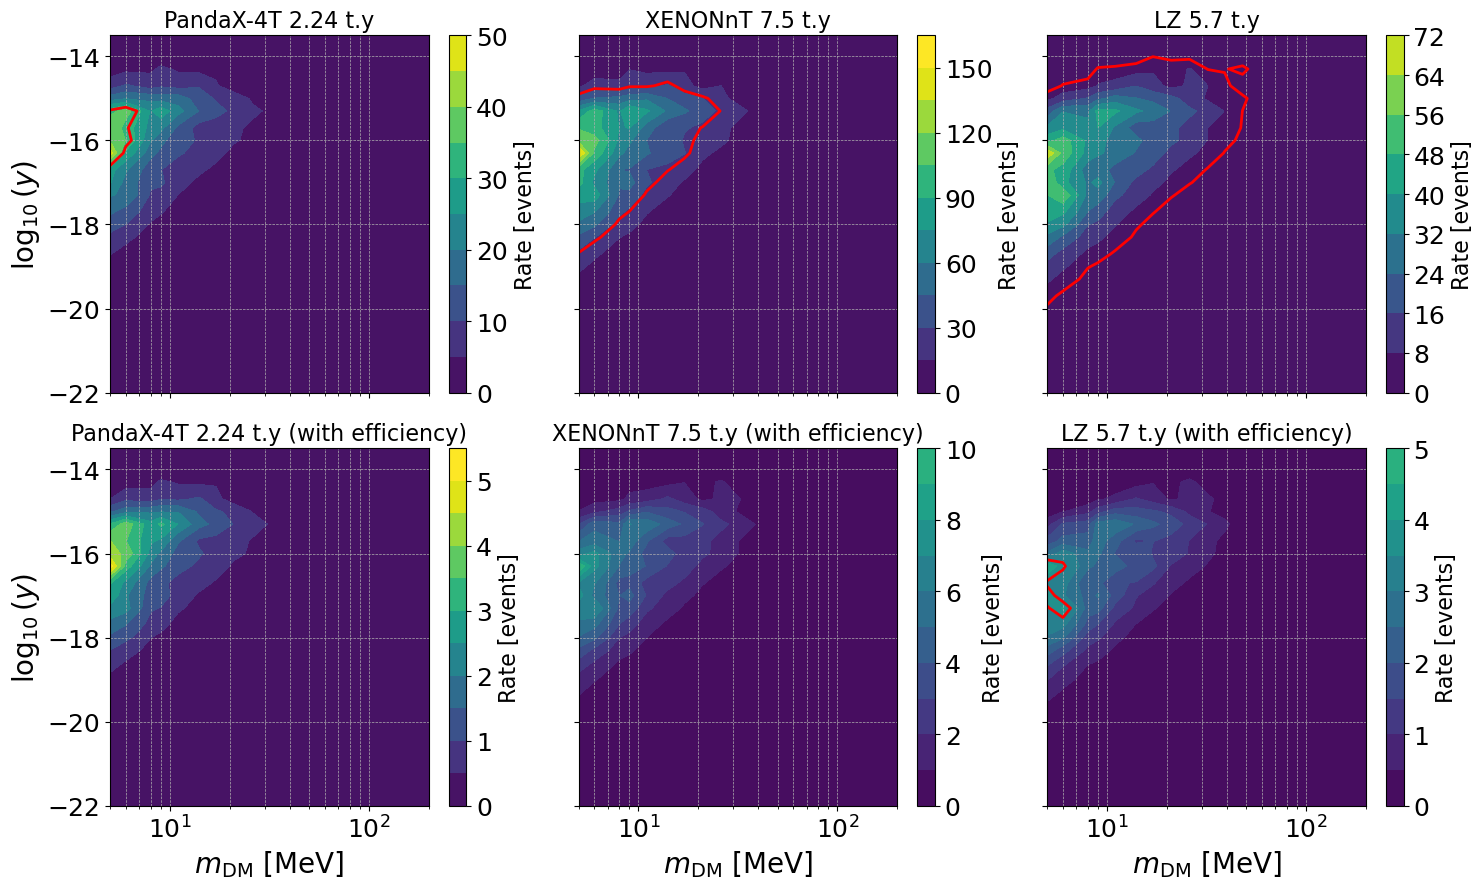

In [32]:
from matplotlib.colors import Normalize

Z_level = 1.28 # 90% CL
Nobs_low = [[335,2536,19],[335,2536,19]]
B_low = [[327.1,2574,21.6],[327.1,2574,21.6]]

files = [
    "data/fermionicDM-smooth/Nhits_grid_PandaX4T_low.dat",
    "data/fermionicDM-smooth/Nhits_grid_XENONnT_low.dat",
    "data/fermionicDM-smooth/Nhits_grid_LZ57_low.dat",
    "data/fermionicDM-smooth/Nhits_grid_PandaX4T_low_eff.dat",
    "data/fermionicDM-smooth/Nhits_grid_XENONnT_low_eff.dat",
    "data/fermionicDM-smooth/Nhits_grid_LZ57_low_eff.dat",
]

titles_DM = [["PandaX-4T 2.24 t.y", "XENONnT 7.5 t.y", "LZ 5.7 t.y"],
            ["PandaX-4T 2.24 t.y (with efficiency)", "XENONnT 7.5 t.y (with efficiency)", "LZ 5.7 t.y (with efficiency)"]]

fig, axes = plt.subplots(2, 3, figsize=(15, 9), sharex=True, sharey=True)
# axes = axes.flatten()

vmins = [0, 0, 0, 0, 0, 0]
vmaxs = [50, 150, 75, 5, 15, 7.5]

contours = [None] * 3

for col in range(3):
    

    for row in range(2):
        idx = row * 3 + col
        ax = axes[row, col]

        # --- cargar datos ---
        data = np.loadtxt(files[idx])
        log10y = data[:, 0]
        mass  = data[:, 1]
        Nhits = data[:, 2]
        Zvals = DMfermion.compute_Z_poisson_grid(Nhits, Nobs_low[row][col], B_low[row][col])

        n_y = len(np.unique(log10y))
        n_m = len(np.unique(mass))

        log10y_vals = log10y[::n_m]
        mass_vals   = mass[:n_m]
        Nhits_grid  = Nhits.reshape((n_y, n_m))
        Zvals_grid  = Zvals.reshape((n_y, n_m))

        M, Y = np.meshgrid(mass_vals, log10y_vals)

        norm = Normalize(vmin=vmins[idx], vmax=vmaxs[idx])
        
        cp = ax.contourf(
            M, Y, Nhits_grid,
            levels=10,
            cmap="viridis",
            norm=norm
        )
        # ax.contour(M, Y, Nhits_grid, levels=[2.302], colors="red", linewidths=2)
        ax.contour(M, Y, Zvals_grid, levels=[Z_level], colors="red", linewidths=2)

        # guardar solo uno por columna
        if row == 0:
            contours[col] = cp

        ax.set_xscale("log")
        ax.set_xlim(5, 200)
        ax.set_ylim(-22, -13.5)
        ax.grid(True, which="both", ls="--", lw=0.5)
        ax.tick_params(axis='x', labelsize=18)
        ax.tick_params(axis='y', labelsize=18)
        ax.set_title(titles_DM[row][col], fontsize=16)

        cbar_x = [0.31, 0.6, 0.92]
    
    # for col in range(3):
        # cax = fig.add_axes([cbar_x[col], 0.15, 0.015, 0.7])
        cbar = fig.colorbar(
            cp,
            # ax=[axes[0, col], axes[1, col]],
            # fraction=0.1,
            # pad=-2,
            # cax=cax
        )
        cbar.set_label("Rate [events]", fontsize=16, color='black')
        cbar.ax.tick_params(labelsize=18, color='black')
        # cbar.outline.set_edgecolor('white')
        # cbar.outline.set_linewidth(1.2)
        cbar.ax.yaxis.set_tick_params(labelcolor='black')


# Labels comunes
axes[0,0].set_ylabel(r"$\log_{10}(y)$", fontsize=20)
axes[1,0].set_ylabel(r"$\log_{10}(y)$", fontsize=20)
for ax in axes[1,0:]:
    ax.set_xlabel(r"$m_{\rm DM}$ [MeV]", fontsize=20)



plt.tight_layout()

plt.savefig("figures/megaplot_smooth_lowErec.pdf", bbox_inches='tight')

plt.show()

# 4. Simulate SN in the galaxy

In [33]:
# Particles that take longer to reach Earth: minimum energy and maximum distance
print('max time (SN at r=-30 kpc, and very slow Particles: Ea~ma):')
print( 't = %.6e' % SNdist.tarrival(0.01*(1 + 0.01), 0.01, -30, 0, 0) , 's' ) # inputs: (Ea, ma, r, theta, z)
print( 't = %.6e' % SNdist.tarrival(1*(1 + 0.01), 1, -30, 0, 0) , 's' )
print( 't = %.6e' % SNdist.tarrival(10*(1 + 0.01), 10, -30, 0, 0) , 's' )
print( 't = %.6e' % SNdist.tarrival(100*(1 + 0.01), 100, -30, 0, 0) , 's' )

RE=8.23
zE=0.0208
# Particles that take longer to reach Earth: minimum energy and maximum distance
print()
print('min time (SN at r=RE+0.1 kpc, and very fast Particles: Ea>>ma)')
print( 't = %.6e' % SNdist.tarrival(150, 0.01, RE + 0.01, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 1, RE + 0.01, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 10, RE + 0.01, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 100, RE + 0.01, 0, zE) , 's' )

max time (SN at r=-30 kpc, and very slow Particles: Ea~ma):
t = 2.803515e+13 s
t = 2.803515e+13 s
t = 2.803515e+13 s
t = 2.803515e+13 s

min time (SN at r=RE+0.1 kpc, and very fast Particles: Ea>>ma)
t = 1.029379e+09 s
t = 1.029402e+09 s
t = 1.031674e+09 s
t = 1.381057e+09 s


### Simulate

In [34]:
# number of universes:
num_ITER = 20

# SN_numbers, SN_sim = SNdist.SNsimulation(num_ITER = num_ITER, time_low = -2.8e13, time_up = 0)
SN_numbers, SN_sim = SNdist.SNsimulation(num_ITER = num_ITER, time_low = -2.8e13, time_up = -1e10)

# show the number of SN per universe
iteration = np.arange(1, num_ITER + 1)

print("Iteration | SN count")
for i, count in zip(iteration, SN_numbers):
    print(f"{i:>9} | {count:>8}")

Iteration | SN count
        1 |    14366
        2 |    14349
        3 |    14344
        4 |    14466
        5 |    14475
        6 |    14357
        7 |    14411
        8 |    14555
        9 |    14443
       10 |    14321
       11 |    14297
       12 |    14494
       13 |    14620
       14 |    14541
       15 |    14503
       16 |    14552
       17 |    14223
       18 |    14489
       19 |    14285
       20 |    14460


In [35]:
import pandas as pd

# Create DataFrame with a single simulation
df = pd.DataFrame(SN_sim[2], columns=['r [kpc]', '$\theta$', 'z [kpc]', 't [s]'])

# Show the first 10 rows
df.head(10)

,r [kpc],$\theta$,z [kpc],t [s]
0,3.633596,4.739676,-0.379220,-2.799916e+13
1,0.202749,0.202460,0.079171,-2.799898e+13
2,1.251226,5.475244,-0.320001,-2.799847e+13
3,1.684112,2.802380,-0.001709,-2.799619e+13
4,5.361244,4.173745,0.447933,-2.799555e+13
5,2.562183,1.889712,-0.326796,-2.799503e+13
6,2.177280,0.077653,0.087030,-2.799428e+13
7,1.914182,5.419587,0.137702,-2.799352e+13
8,8.099642,3.558192,0.138277,-2.799329e+13
9,3.172521,1.907403,-0.527523,-2.799244e+13


#### Plot the SN in the galactic coordinates

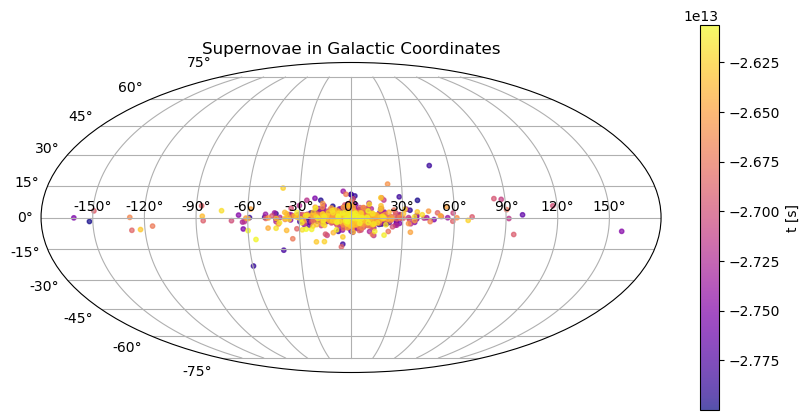

In [36]:
solar_system_position = [8.3, 0, 0]  # Solar System position, in kpc


# number off SN to plot
num_sn_examples = 1000

# take SN positions from df (r, theta, z) 'r [kpc]', '$\theta$', 'z [kpc]', 't [s]'
r = df['r [kpc]'].values[:num_sn_examples]
theta = df['$\theta$'].values[:num_sn_examples]
z = df['z [kpc]'].values[:num_sn_examples]

# Catesian
x = r * np.cos(theta)
y = r * np.sin(theta)

# Center in the Sun
x_helio = x - (solar_system_position[0] * np.cos(solar_system_position[1]) )
y_helio = y - (solar_system_position[0] * np.sin(solar_system_position[1]) )
z_helio = z - solar_system_position[2]

# now the GC is in (x_helio, y_helio) = (-r_sun, 0)
# I want it in (r_sun, 0)

# Mirror
x_new = -x_helio
y_new = y_helio
z_new = z_helio

# Galactic coordinates
l = np.arctan2(y_new, x_new)      # longitude [-pi, pi]
b = np.arctan2(z_new, np.sqrt(x_new**2 + y_new**2))  # latitude



# Plot in Mollweide projection (galactic coordinates)
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")
sc = ax.scatter(l, b, s=10, c=df['t [s]'][:num_sn_examples], cmap='plasma', alpha=0.7)



# Colorbar for SN times
cbar = plt.colorbar(sc, orientation="vertical", pad=0.05)
cbar.set_label("t [s]")

ax.set_title("Supernovae in Galactic Coordinates")
ax.grid(True)
# plt.savefig("figures/galaxycoordinates.pdf", bbox_inches='tight')
plt.show()

#### Compute the ALP flux from EACH SN in 1 simulation

In [37]:
# Example for 1 iteration

iit = 4 # choose a specific iteration
mchiTEST = mchiTEST2 # MeV



# Generate Erange for the selected iteration
Erange = SNdist.Eflux1sim(mchiTEST, ExpTIME, SN_sim[iit])



# Create DataFrame with a single simulation
Erange_df = pd.DataFrame(Erange, columns=['E1 [MeV]', 'E2 [MeV]', 'd(SN-Earth) [kpc]'])

# Show the first and the last 5 rows
pd.concat([Erange_df.head(5), Erange_df.tail(5)])

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])


,E1 [MeV],E2 [MeV],d(SN-Earth) [kpc]
0,26.012903,26.012903,8.565818
1,26.038045,26.038045,14.697055
2,26.048082,26.048082,16.516347
3,26.001553,26.001553,2.972263
4,26.015675,26.015675,9.438876
14470,NaN,NaN,5.415137
14471,NaN,NaN,13.330033
14472,NaN,NaN,4.878332
14473,NaN,NaN,4.916238
14474,NaN,NaN,8.488491


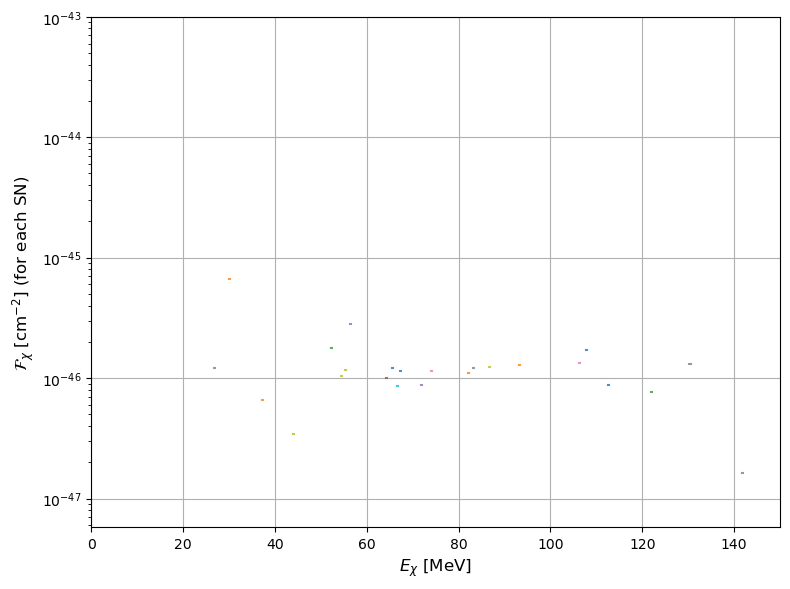

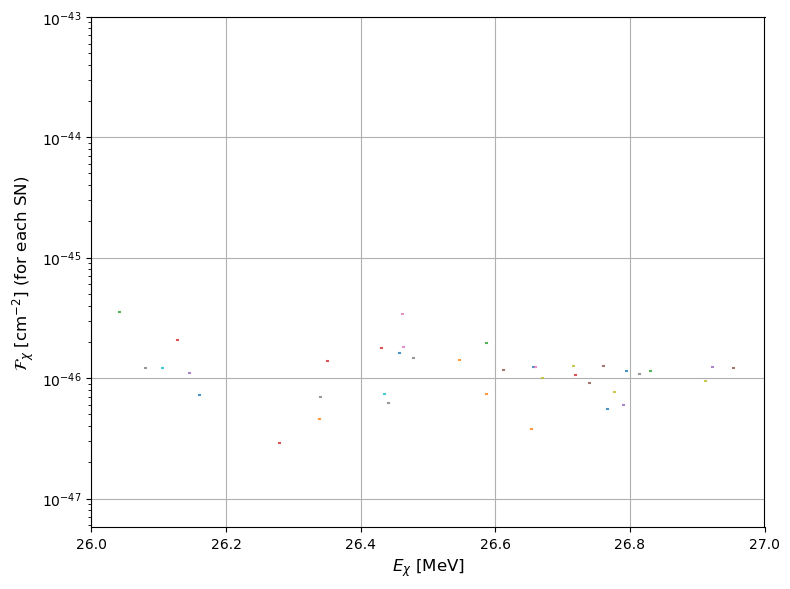

In [38]:
########
# PLOT #
# Example for 1 iteration and a fixed Mass #
########


# plot the contribution of each SN
plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)

plt.xlim([0,150])
plt.yscale('log')
plt.xlabel(r"$E_{\chi}$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}_{\chi}$ [$\mathrm{cm^{-2}}$] (for each SN)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# zoom
plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)

plt.xlim([mchiTEST,mchiTEST+1])
plt.yscale('log')
plt.xlabel(r"$E_{\chi}$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}_{\chi}$ [$\mathrm{cm^{-2}}$] (for each SN)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

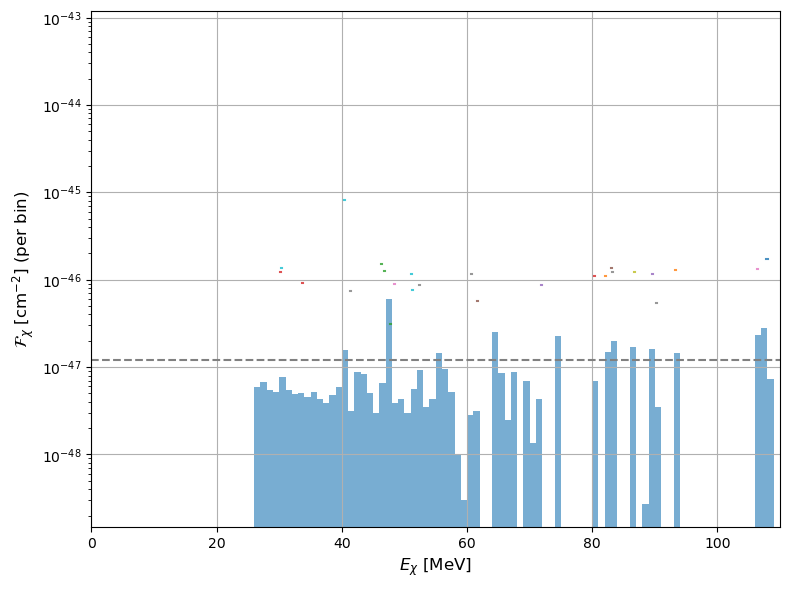

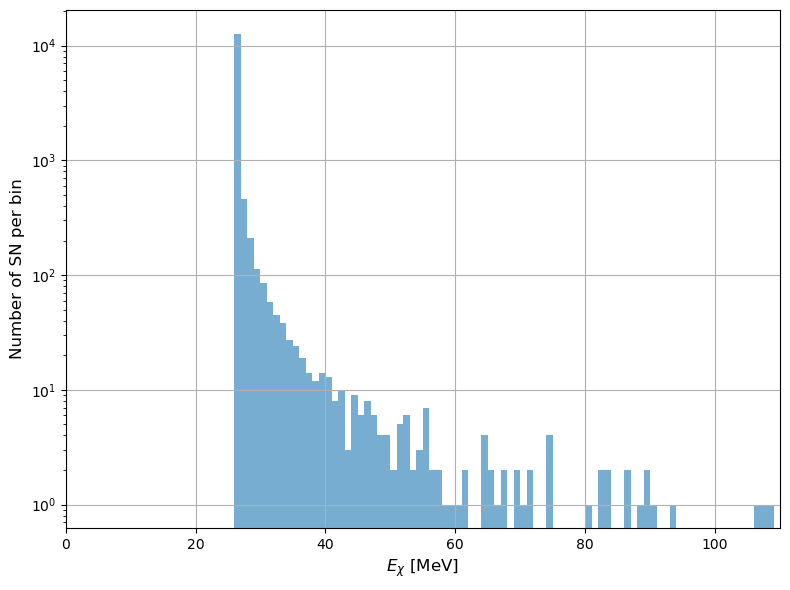

In [39]:
# plot the factor per bin (integrating each SN contribution)
# Ebins = np.linspace(15, 80, 66)
Ebins = np.arange(0, 110, 1)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

result_bins, SN_num_bins, SN_indices_bins = SNdist.factor1simBINS(Erange, Ebins)

plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)
        
plt.bar(bin_centers, result_bins, width=np.diff(Ebins), align='center', alpha=0.6)
plt.axhline(y=fluence_diff, linestyle='--', color='gray')

plt.xlim([0,110])
plt.yscale('log')
plt.xlabel(r"$E_{\chi}$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}_{\chi}$ [$\mathrm{cm^{-2}}$] (per bin)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# number of SN per bin (each SN can contribute to more than 1 bin)
plt.figure(figsize=(8, 6))

plt.bar(bin_centers, SN_num_bins, width=np.diff(Ebins), align='center', alpha=0.6)

plt.xlim([0,110])
plt.yscale('log')
plt.xlabel(r"$E_{\chi}$ [MeV]", fontsize=12)
plt.ylabel("Number of SN per bin", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

----------------------

For that you have class $\bf{DmAcross}$ defined in the imported module $\bf{DM4fermionINT}$

Inputs:
- Z: atomic number of the target material
- mA: mass number of the target material
- diffSNfactor: diffuse galactic SN factor [cm^{-2} s^{-1}] which we will set equal to 1
- profile: the SN profile class

In [40]:
# TARGET: Xenon
Z_Xe = 54
mA_Xe = 131.293*931.5 # MeV


DMfermion = DmAcross( Z=Z_Xe, mA=mA_Xe, diffSNfactor=1, profile=SN_prof )

### DM flux (with/without gravitational effects)

For that you have function $\bf{diffFlux}$ defined in the class $\bf{DmAcross}$

Inputs:
- mchi   : DM mass [MeV]
- p      : momentum of the incoming DM particle [MeV]
- rad    : radius [km]
- Nchi   : number flux of DM from a SN
        
Returns:
- dflux/dp  [m^-2 s^-1 MeV^-1]

--------------------------------

To take into account the gravitational effects you have function $\bf{Fp0}$ defined in the class $\bf{DmAcross}$

Inputs:
- mchi   : DM mass [MeV]
- p_inf  : momentum of the incoming DM particle when it has already scaped the SN gravitational potential [MeV]
- rad    : radius [km]
        
Returns:
- Momentoum at origen (p0) given p_inf, mchi and rad [MeV]

BP1:  m = 6 MeV, r = 55.7 km, Total number of particles produced in log(10)s = 1.68e+56
BP2:  m = 26 MeV, r = 19.6 km, Total number of particles produced in log(10)s = 7.60e+56
BP3:  m = 132 MeV, r = 15.2 km, Total number of particles produced in log(10)s = 5.07e+56


/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:164: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)


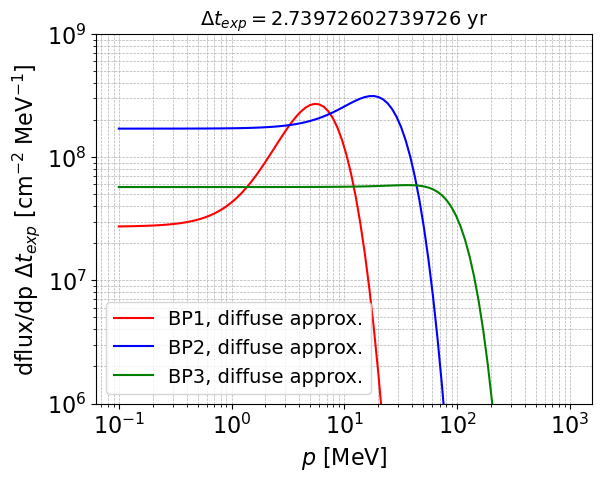

In [41]:
# LET's PLOT THE FLUX ON EARTH

mchiTEST1 = 6 # MeV
mchiTEST2 = 26 # MeV
mchiTEST3 = 132 # MeV

Nchi1 = 7.3e55 * np.log(10) # number flux of DM from the SN
Nchi2 = 3.3e56 * np.log(10) # number flux of DM from the SN
Nchi3 = 2.2e56 * np.log(10) # number flux of DM from the SN

rE1 = 55.7 # km
rE2 = 19.6 # km
rE3 = 15.2 # km

print(fr'BP1:  m = {mchiTEST1} MeV, r = {rE1} km, Total number of particles produced in log(10)s = {Nchi1:0.2e}')
print(fr'BP2:  m = {mchiTEST2} MeV, r = {rE2} km, Total number of particles produced in log(10)s = {Nchi2:0.2e}')
print(fr'BP3:  m = {mchiTEST3} MeV, r = {rE3} km, Total number of particles produced in log(10)s = {Nchi3:0.2e}')



p_grid = np.logspace(-1, 3, 100)


diffFlux_plot_BP1 = [ diffSNfactor * ExpTIME * DMfermion.diffFlux(mchiTEST1, DMfermion.Fp0(pp, mchiTEST1, rad =rE1), rad=rE1, Nchi=Nchi1) for pp in p_grid ]
diffFlux_plot_BP2 = [ diffSNfactor * ExpTIME * DMfermion.diffFlux(mchiTEST2, DMfermion.Fp0(pp, mchiTEST2, rad =rE2), rad=rE2, Nchi=Nchi2) for pp in p_grid ]
diffFlux_plot_BP3 = [ diffSNfactor * ExpTIME * DMfermion.diffFlux(mchiTEST3, DMfermion.Fp0(pp, mchiTEST3, rad =rE3), rad=rE3, Nchi=Nchi3) for pp in p_grid ]



plt.plot(p_grid, diffFlux_plot_BP1, '-', color='red', label=fr'BP1, diffuse approx.')
plt.plot(p_grid, diffFlux_plot_BP2, '-', color='blue', label=fr'BP2, diffuse approx.')
plt.plot(p_grid, diffFlux_plot_BP3, '-', color='green', label=fr'BP3, diffuse approx.')



plt.ylim(1e6,1e9)
plt.xscale("log")
plt.yscale("log")
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$p$ [MeV]", fontsize=16)
plt.ylabel(r"dflux/dp $\Delta t_{exp}$ [cm$^{-2}$ MeV$^{-1}$]", fontsize=16)
plt.title(r'$\Delta t_{exp} = $' + str(ExpTIME/Units.seconds_in_year) + ' yr', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:312: RuntimeWarning: invalid value encountered in sqrt
  return Echi / np.sqrt(Echi**2 - mchi**2)
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:309: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(Echi**2 - mchi**2)


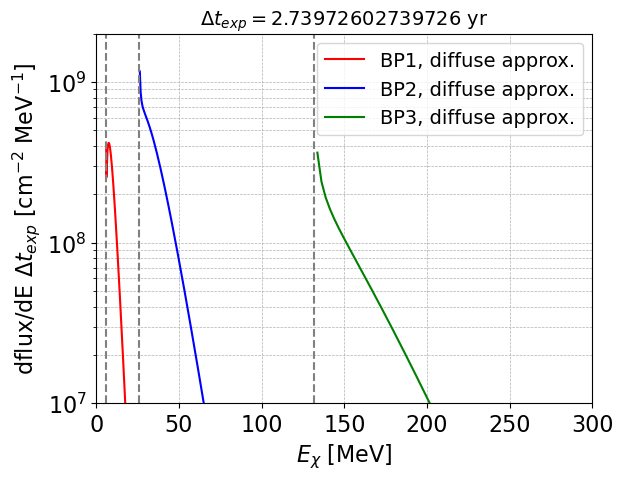

In [42]:
# AS A FUNCTION OF THE ENERGY

E_grid = np.logspace(-1, 3, 500)

diffFluxdE_plot_BP1 = [ diffSNfactor * ExpTIME * DMfermion.dE_dp(ee, mchiTEST1) * DMfermion.diffFlux(mchiTEST1, DMfermion.Fp0(DMfermion.E_to_p(ee, mchiTEST1), mchiTEST1, rad =rE1), rad=rE1, Nchi=Nchi1) for ee in E_grid ]
diffFluxdE_plot_BP2 = [ diffSNfactor * ExpTIME * DMfermion.dE_dp(ee, mchiTEST2) * DMfermion.diffFlux(mchiTEST2, DMfermion.Fp0(DMfermion.E_to_p(ee, mchiTEST2), mchiTEST2, rad =rE2), rad=rE2, Nchi=Nchi2) for ee in E_grid ]
diffFluxdE_plot_BP3 = [ diffSNfactor * ExpTIME * DMfermion.dE_dp(ee, mchiTEST3) * DMfermion.diffFlux(mchiTEST3, DMfermion.Fp0(DMfermion.E_to_p(ee, mchiTEST3), mchiTEST3, rad =rE3), rad=rE3, Nchi=Nchi3) for ee in E_grid ]

plt.plot(E_grid, diffFluxdE_plot_BP1, '-', color='red', label=fr'BP1, diffuse approx.')
plt.plot(E_grid, diffFluxdE_plot_BP2, '-', color='blue', label=fr'BP2, diffuse approx.')
plt.plot(E_grid, diffFluxdE_plot_BP3, '-', color='green', label=fr'BP3, diffuse approx.')

plt.axvline(x=mchiTEST1, linestyle='--', color='gray')
plt.axvline(x=mchiTEST2, linestyle='--', color='gray')
plt.axvline(x=mchiTEST3, linestyle='--', color='gray')

plt.xlim(0,300)
plt.ylim(1e7,2e9)
# plt.xscale("log")
plt.yscale("log")
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{\chi}$ [MeV]", fontsize=16)
plt.ylabel(r"dflux/dE $\Delta t_{exp}$ [cm$^{-2}$ MeV$^{-1}$]", fontsize=16)
plt.title(r'$\Delta t_{exp} = $' + str(ExpTIME/Units.seconds_in_year) + ' yr', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### FLUX OF ALL SN

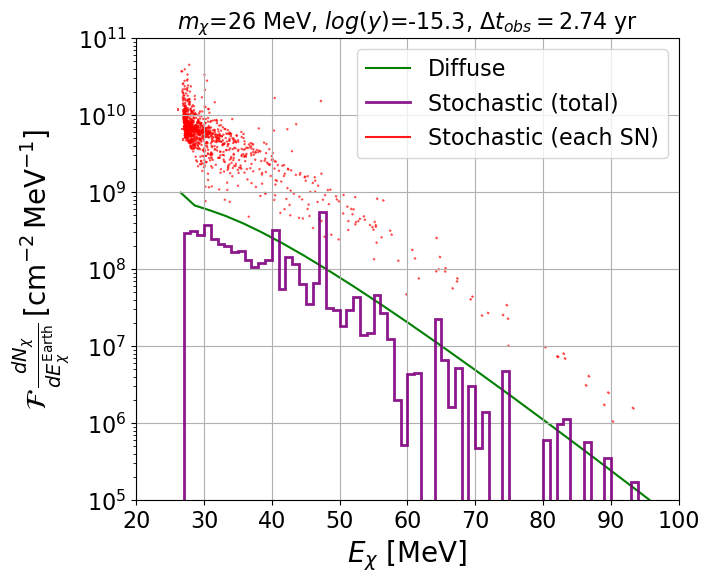

In [43]:
# Plot
plt.figure(figsize=(7,6))


# With diffuse approximation
E_grid = np.logspace(-1, 2.2, 100)

diffFlux_plot_BP2 = [ diffSNfactor * ExpTIME * DMfermion.dE_dp(ee, mchiTEST2) * DMfermion.diffFlux(mchiTEST2, DMfermion.Fp0(DMfermion.E_to_p(ee, mchiTEST2), mchiTEST2, rad =rE2), rad=rE2, Nchi=Nchi2) for ee in E_grid ]

plt.plot(E_grid, diffFlux_plot_BP2, '-', color='green', label='Diffuse', zorder=1)



# SN simulation per BIN (integrating each SN contribution)
binwidth = 1
Ebins = np.arange(0, 100, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

result_bins = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)


# plt.bar(bin_centers, result_bins, width=np.diff(Ebins), align='center', alpha=0.6)
plt.stairs(result_bins, edges=Ebins, fill=False, color='purple', linewidth=2, alpha=0.9, label='Stochastic (total)', zorder=2) 

flux_max = 5e10
# each SN contribution individually
for E1, E2, dSN in Erange:
    if E2 > E1:
        Echi_plt = np.linspace(E1, E2, 5) # MeV
        flux = ( 1 / (4 * np.pi * (dSN * Units.kpctocm)**2) ) * DMfermion.dE_dp(Echi_plt, mchiTEST2) * DMfermion.diffFlux(mchiTEST2, DMfermion.Fp0(DMfermion.E_to_p(Echi_plt, mchiTEST2), mchiTEST2, rad =rE2), rad=rE2, Nchi=Nchi2)

        # if np.nanmax(flux) > flux_max:
        #     continue
        if np.percentile(flux, 50) > flux_max:
            continue
            
        plt.plot(Echi_plt, flux, color='red', alpha=0.7, zorder=0)

# dummy
plt.plot(np.array([-12,-10]), np.array([1,2]), color='red', alpha=0.9, label='Stochastic (each SN)')


plt.xlim(20,100)
plt.ylim(1e5,1e11)
# plt.xscale("log")
plt.yscale("log")
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{\chi}$ [MeV]", fontsize=20)
plt.ylabel(r'$\mathcal{F}\,\frac{dN_{\chi}}{dE_{\chi}^{\rm Earth}}\,[\mathrm{cm^{-2}\,MeV^{-1}}]$', fontsize=20)
plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/fermionflux.pdf", bbox_inches='tight', dpi=10)
plt.show()

In [44]:
# Integrate in E_chi and see the "mean" difference
diffFlux_plot_BP2 = np.array(diffFlux_plot_BP2)
Integrated_F_smo = np.trapezoid(np.nan_to_num(diffFlux_plot_BP2, nan=0.0), E_grid)

Integrated_F_sto = np.sum(result_bins * binwidth)

print('Integrated_F_sto /Integrated_F_smo:', Integrated_F_sto /Integrated_F_smo)

Integrated_F_sto /Integrated_F_smo: 0.4467817727004985


### TARGET RECOIL SPECTRA

y =  5.011872336272715e-16

BP2:  m = 26 MeV, r = 19.6 km, Total number of particles produced in log(10)s = 7.60e+56


/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:164: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:160: RuntimeWarning: overflow encountered in exp
  numerator = (p**3 / (np.exp(E_aux / T_r) + 1)) * (1./ E_aux)


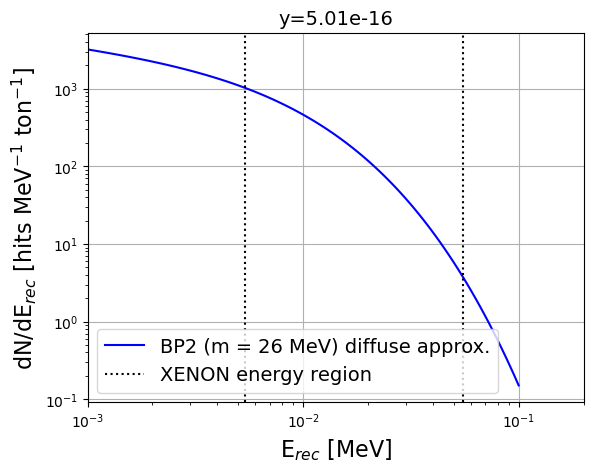

In [45]:
# LET's PLOT THE TARGET RECOIL SPECTRA

print('y = ', y_coupTEST)
print('')
print(fr'BP2:  m = {mchiTEST2} MeV, r = {rE2} km, Total number of particles produced in log(10)s = {Nchi2:0.2e}')


# With diffuse approximation
Erec_grid = np.logspace(-3, -1, 100)


dspectra_plot_BP2 = [ diffSNfactor * ExpTIME * DMfermion.dspectra(mchiTEST2, ee, y_coupTEST, rad=rE2, Nchi=Nchi2) for ee in Erec_grid ]

# dspectra [MeV^-1 s^-1 ton^-1]
# diffSNfactor cm^-2
# ExpTIME s

# dspectra_plot_BP2 -> [MeV^-1 cm^-2 ton^-1]

plt.plot(Erec_grid, dspectra_plot_BP2, color='blue', label=fr'BP2 (m = {mchiTEST2} MeV) diffuse approx.')
plt.axvline(x=Erecmin_LZ, linestyle=':', color='black', label='XENON energy region')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3,2e-1)
# plt.ylim(1e-8,3e-4)
plt.xlabel("E$_{rec}$ [MeV]", fontsize=16)
plt.ylabel(r"dN/dE$_{rec}$ [hits MeV$^{-1}$ ton$^{-1}$]", fontsize=16)
plt.title(fr"y={y_coupTEST:0.2e}", fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:309: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(Echi**2 - mchi**2)


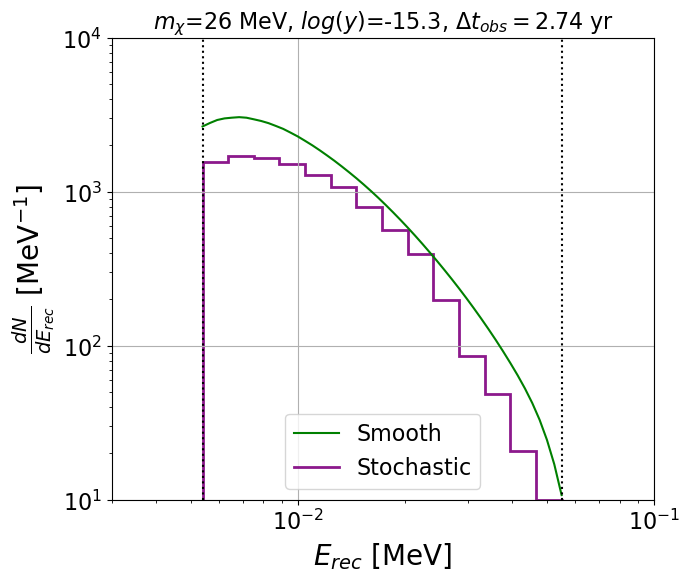

In [46]:

# Plot
plt.figure(figsize=(7,6))

# Smooth
# Recoil energy for the smooth (MeV)
Erec_grid_2 = np.logspace(np.log10(Erecmin_LZ), np.log10(Erecmax_LZ), 50)

dspectra_plot_BP2_2 = [ eff_LZ_high(ee*1000)*diffSNfactor * ExpTIME * DMfermion.dspectra(mchiTEST2, ee, y_coupTEST, rad=rE2, Nchi=Nchi2) for ee in Erec_grid_2 ]
dspectra_plot_BP2_LZ_2 = [ spec * (Mtarget_LZ/1000) for spec in dspectra_plot_BP2_2]

plt.plot(Erec_grid_2, dspectra_plot_BP2_LZ_2, color='green', label='Smooth')


# Stochastic
# DM energy bins (MeV)
binwidth = 1
Ebins = np.arange(0, 100, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

# Compute the binned fluence:
# Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[4])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)



# Recoil energy bins (MeV)
Erec_bins_2 = np.logspace(np.log10(Erecmin_LZ), np.log10(Erecmax_LZ), 15)

# now the signal
res_X_2 = DMfermion.dspectra_from_fluence_BINS(Erec_bins_2, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)


plt.stairs(res_X_2, edges=Erec_bins_2, fill=False, color='purple', linewidth=2, alpha=0.9, label='Stochastic') 



plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e1,1e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig("figures/fermionsignal_v2.pdf", bbox_inches='tight')
plt.show()

In [47]:
# Integrate in E_recc and see the "mean" difference
dspectra_plot_BP2_LZ_2 = np.array(dspectra_plot_BP2_LZ_2)
Integrated_N_smo_2 = np.trapezoid(np.nan_to_num(dspectra_plot_BP2_LZ_2, nan=0.0), Erec_grid_2)

bin_widths_2 = np.diff(Erec_bins_2)
Integrated_N_sto_2 = np.sum(res_X_2 * bin_widths_2)

print('Integrated_N_sto_2 /Integrated_N_smo_2:', Integrated_N_sto_2 /Integrated_N_smo_2)

Integrated_N_sto_2 /Integrated_N_smo_2: 0.6528313457743301


#### Compute for all the simulations (takes a long time, already saved, load below)

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:160: RuntimeWarning: overflow encountered in exp
  numerator = (p**3 / (np.exp(E_aux / T_r) + 1)) * (1./ E_aux)


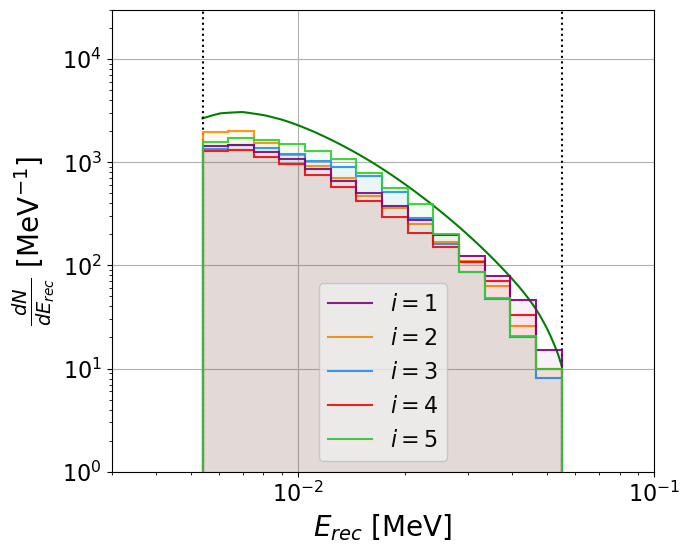

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:164: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:309: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(Echi**2 - mchi**2)


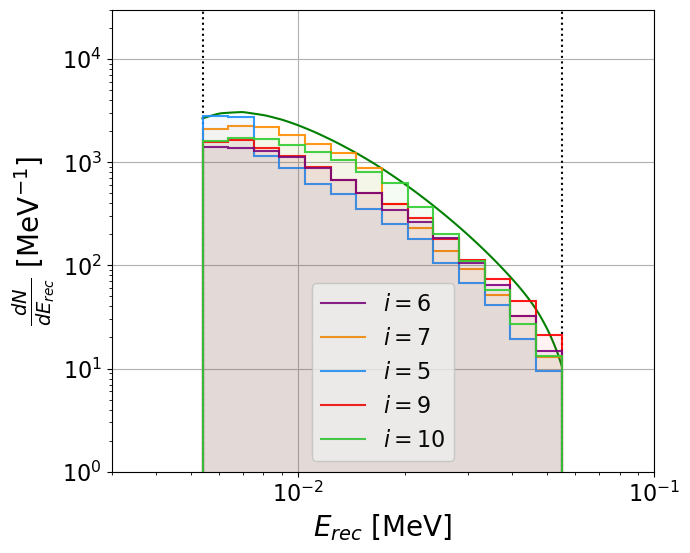

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:164: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:309: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(Echi**2 - mchi**2)


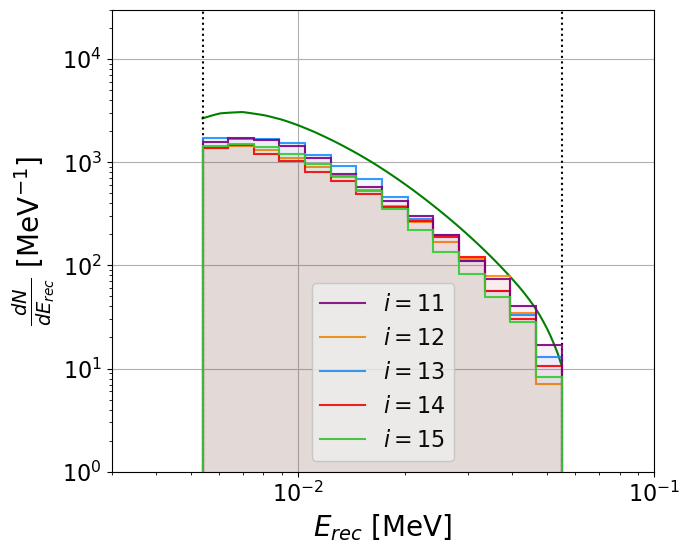

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:164: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:309: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(Echi**2 - mchi**2)


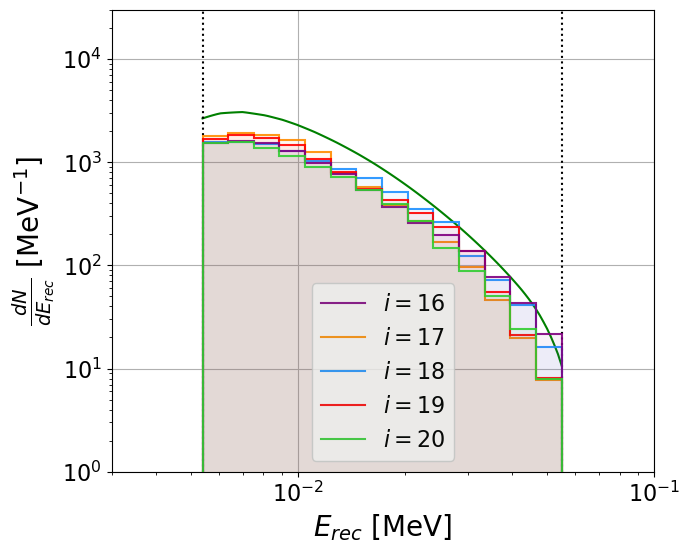

In [48]:
# With diffuse approximation
Erec_grid = np.logspace(np.log10(Erecmin_LZ), np.log10(Erecmax_LZ), 100)

dspectra_plot_BP2 = [ eff_LZ_high(ee*1000) * diffSNfactor * ExpTIME * DMfermion.dspectra(mchiTEST2, ee, y_coupTEST, rad=rE2, Nchi=Nchi2) for ee in Erec_grid ]

dspectra_plot_BP2_LZ = [ spec * (Mtarget_LZ/1000) for spec in dspectra_plot_BP2]



# Stochastic
# DM energy bins (MeV)
binwidth = 1
Ebins = np.arange(0, 100, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

# Recoil energy bins (MeV)
Erec_bins = np.logspace(np.log10(Erecmin_LZ), np.log10(Erecmax_LZ), 15)




# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 0
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_0 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_0, edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=1$', zorder=10)
plt.stairs(res_X_0, edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 1
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_1 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_1, edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=2$', zorder=5)
plt.stairs(res_X_1, edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 12
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_12 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_12, edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=3$', zorder=5)
plt.stairs(res_X_12, edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 3
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_3 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_3, edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=4$', zorder=5)
plt.stairs(res_X_3, edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 4
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_4 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_4, edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=5$', zorder=10)
plt.stairs(res_X_4, edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig("figures/fermionsignal_5A.pdf", bbox_inches='tight')
plt.show()





# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 2
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_2 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_2, edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=6$', zorder=10)
plt.stairs(res_X_2, edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 5
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_5 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_5, edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=7$', zorder=5)
plt.stairs(res_X_5, edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 13
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_13 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_13, edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=5$', zorder=5)
plt.stairs(res_X_13, edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 7
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_7 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_7, edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=9$', zorder=5)
plt.stairs(res_X_7, edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 6
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_6 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_6, edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=10$', zorder=10)
plt.stairs(res_X_6, edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig("figures/fermionsignal_5B.pdf", bbox_inches='tight')
plt.show()





# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 10
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_10 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_10, edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=11$', zorder=10)
plt.stairs(res_X_10, edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 16
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_16 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_16, edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=12$', zorder=5)
plt.stairs(res_X_16, edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 11
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_11 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_11, edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=13$', zorder=5)
plt.stairs(res_X_11, edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 8
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_8 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_8, edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=14$', zorder=5)
plt.stairs(res_X_8, edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 14
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_14 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_14, edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=15$', zorder=10)
plt.stairs(res_X_14, edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig("figures/fermionsignal_5C.pdf", bbox_inches='tight')
plt.show()





# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 15
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_15 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_15, edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=16$', zorder=10)
plt.stairs(res_X_15, edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 9
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_9 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_9, edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=17$', zorder=5)
plt.stairs(res_X_9, edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 17
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_17 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_17, edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=18$', zorder=5)
plt.stairs(res_X_17, edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 18
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_18 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_18, edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=19$', zorder=5)
plt.stairs(res_X_18, edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 19
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)
res_X_19 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, mchiTEST2, y_coupTEST, Mtarget_LZ, eff_LZ_high)
plt.stairs(res_X_19, edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=20$', zorder=10)
plt.stairs(res_X_19, edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig("figures/fermionsignal_5D.pdf", bbox_inches='tight')
plt.show()






########
# SAVE #
########

res_list = [res_X_0, res_X_1, res_X_2, res_X_3, res_X_4,
            res_X_5, res_X_6, res_X_7, res_X_8, res_X_9,
            res_X_10, res_X_11, res_X_12, res_X_13, res_X_14,
            res_X_15, res_X_16, res_X_17, res_X_18, res_X_19]

filename = "data/eventrate_fermionicDM_sto_all.dat"

with open(filename, "w") as f:
    # Comments
    f.write("# Bin edges (E_rec) [same for all spectra]:\n")
    f.write("# Erec_bins = " + " ".join(f"{x:.6g}" for x in Erec_bins) + "\n")
    f.write("#\n")
    f.write("# Each row corresponds to res_X_i with i = 0,...,19\n")
    f.write("# Example plot:\n")
    f.write("# plt.stairs(res_X_18, edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9)\n")
    f.write("# plt.stairs(res_X_18, edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05)\n")
    f.write("#\n")

    # save one per line
    for arr in res_list:
        f.write(" ".join(f"{x:.8e}" for x in arr) + "\n")

#### LOAD

In [48]:
########
# LOAD #
########

data_eventrate = np.loadtxt("data/eventrate_fermionicDM_sto_all.dat")

res_X = {}
for i in range(data_eventrate.shape[0]):
    res_X[i] = data_eventrate[i]

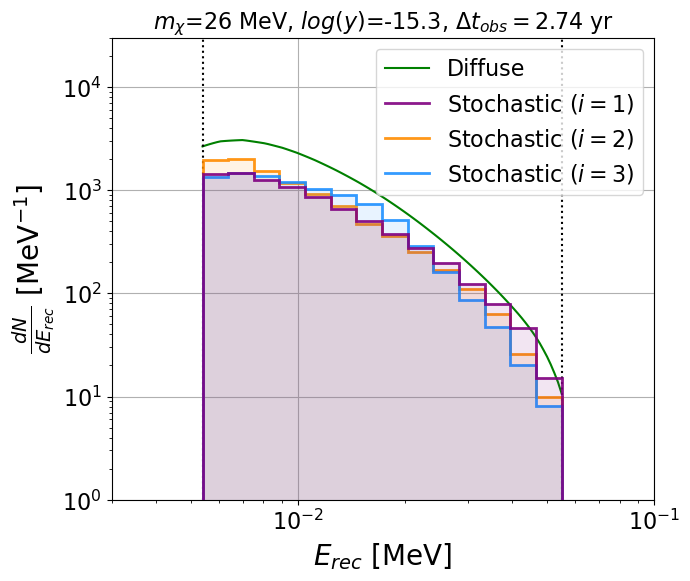

In [50]:
###################
# PLOT 3 EXAMPLES #
###################


# With diffuse approximation
Erec_grid = np.logspace(np.log10(Erecmin_LZ), np.log10(Erecmax_LZ), 100)

dspectra_plot_BP2 = [ eff_LZ_high(ee*1000) * diffSNfactor * ExpTIME * DMfermion.dspectra(mchiTEST2, ee, y_coupTEST, rad=rE2, Nchi=Nchi2) for ee in Erec_grid ]

dspectra_plot_BP2_LZ = [ spec * (Mtarget_LZ/1000) for spec in dspectra_plot_BP2]


Erec_bins = np.logspace(np.log10(Erecmin_LZ), np.log10(Erecmax_LZ), 15)

# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green', label='Diffuse')


# Generate Erange for the selected iteration
i_unis = 0
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='purple', linewidth=2, alpha=0.9, label=f'Stochastic ($i=1$)', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.1, zorder=10) 



# Generate Erange for the selected iteration
i_unis = 1
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=2, alpha=0.9, label=f'Stochastic ($i=2$)', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.1, zorder=5) 



# Generate Erange for the selected iteration
i_unis = 12
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=2, alpha=0.9, label=f'Stochastic ($i=3$)', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.1, zorder=5) 


plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig("figures/fermionsignal_triple.pdf", bbox_inches='tight')
plt.show()

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:164: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:160: RuntimeWarning: overflow encountered in exp
  numerator = (p**3 / (np.exp(E_aux / T_r) + 1)) * (1./ E_aux)


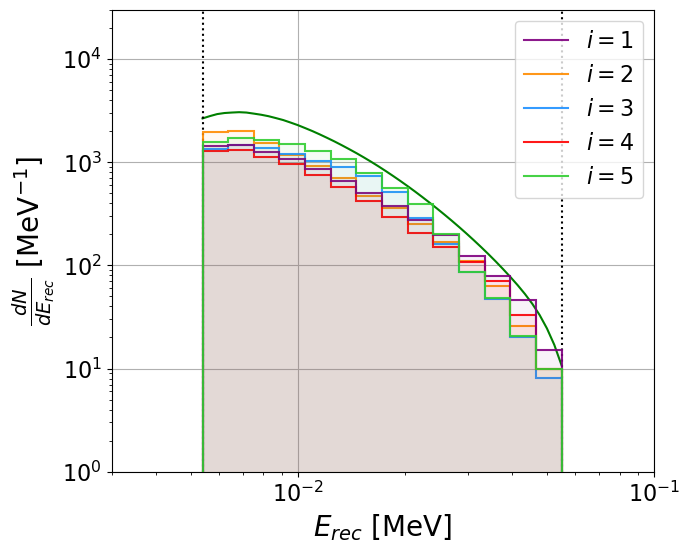

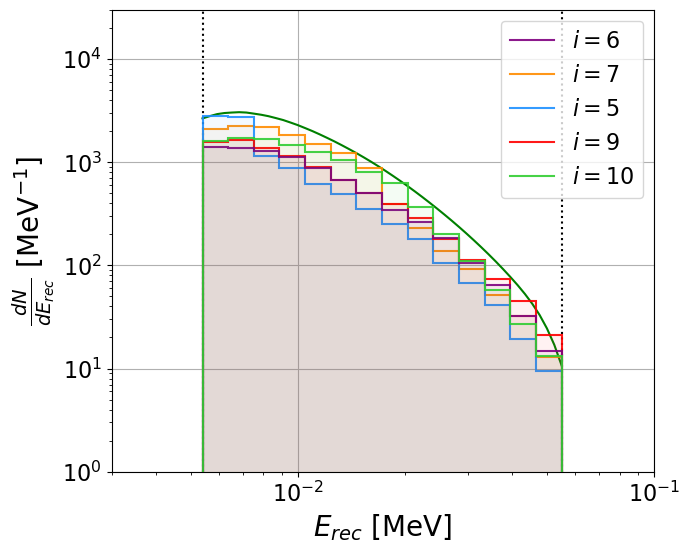

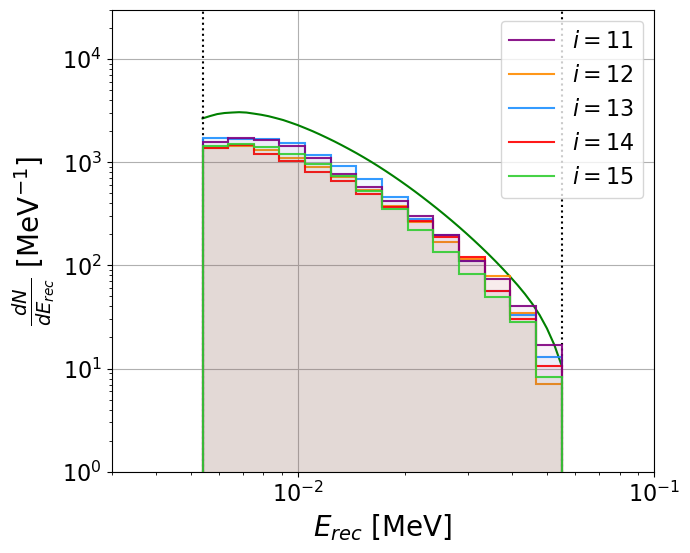

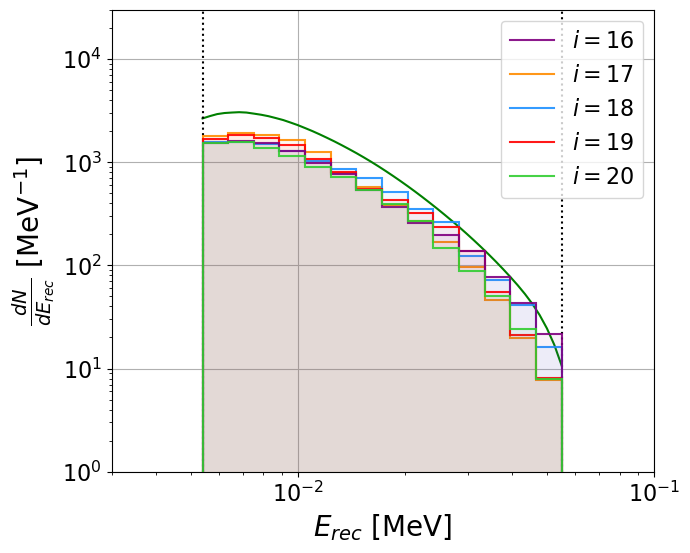

In [51]:
############
# PLOT ALL #
############


# With diffuse approximation
Erec_grid = np.logspace(np.log10(Erecmin_LZ), np.log10(Erecmax_LZ), 50)

dspectra_plot_BP2 = [ eff_LZ_high(ee*1000) * diffSNfactor * ExpTIME * DMfermion.dspectra(mchiTEST2, ee, y_coupTEST, rad=rE2, Nchi=Nchi2) for ee in Erec_grid ]

dspectra_plot_BP2_LZ = [ spec * (Mtarget_LZ/1000) for spec in dspectra_plot_BP2]



Erec_bins = np.logspace(np.log10(Erecmin_LZ), np.log10(Erecmax_LZ), 15)

# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 0
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=1$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 1
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=2$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 12
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=3$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 3
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=4$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 4
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=5$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
# plt.ylim(1e2,2.5e3)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/fermionsignal_5A.pdf", bbox_inches='tight')
plt.show()





# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 2
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=6$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 5
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=7$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 13
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=5$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 7
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=9$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 6
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=10$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/fermionsignal_5B.pdf", bbox_inches='tight')
plt.show()





# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 10
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=11$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 16
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=12$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 11
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=13$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 8
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=14$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 14
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=15$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/fermionsignal_5C.pdf", bbox_inches='tight')
plt.show()





# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 15
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=16$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 9
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=17$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 17
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=18$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 18
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=19$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 19
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=20$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/fermionsignal_5D.pdf", bbox_inches='tight')
plt.show()

## NUMBER OF EVENTS IN THE DETECTOR

### Current DD experiments

In [57]:
# TEST #

Mtarget = 5475 # kg
texp = 280/365 # years

Emin = 0.0054 # MeV
Emax = 0.055 # MeV

print('LZ (current) 4.2 ton yr:')



Erec_bins = np.array([Emin, Emax]) # a single bin



iit = 0 # universe 
m_it = 1 # mass
y_it = 14 #

print('mass ', massesIT[m_it])
print('coupling ', log10yIT[y_it])


# Generate Erange for the selected iteration
Erange = SNdist.Eflux1sim(massesIT[m_it], texp * Units.seconds_in_year, SN_sim[iit])

m_ev = massesIT[m_it]
y_ev = 10**(log10yIT[y_it])
r_ev = energysphereIT[y_it][m_it]



# If r_ev is "Bulk", skip and set result to 0
if isinstance(r_ev, str) and r_ev.lower() == "bulk":
  print('BULK!')

N_ev = numfluxIT[y_it][m_it] * np.log(10)


# DM energy bins (MeV)
binwidth = 1
Ebins = np.arange(0, 100, binwidth)

result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, m_ev, r_ev, N_ev)
result3 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, m_ev, y_ev, Mtarget, eff_LZ_high)
print('hits (with efficiency): ', result3 * (Emax - Emin))


LZ (current) 4.2 ton yr:
mass  6
coupling  -18
hits (with efficiency):  [2.50027176]


In [58]:
# TEST #

Mtarget = Mtarget_LZ # kg
texp = texp_LZ # years

Emin = Erecmin_LZ # MeV
Emax = Erecmax_LZ # MeV

print('LZ (proyected) 15 ton yr:')



Erec_bins = np.array([Emin, Emax]) # a single bin



iit = 0 # universe 
m_it = 1 # mass
y_it = 14 #

print('mass ', massesIT[m_it])
print('coupling ', log10yIT[y_it])


# Generate Erange for the selected iteration
Erange = SNdist.Eflux1sim(massesIT[m_it], texp * Units.seconds_in_year, SN_sim[iit])

m_ev = massesIT[m_it]
y_ev = 10**(log10yIT[y_it])
r_ev = energysphereIT[y_it][m_it]



# If r_ev is "Bulk", skip and set result to 0
if isinstance(r_ev, str) and r_ev.lower() == "bulk":
  print('BULK!')

N_ev = numfluxIT[y_it][m_it] * np.log(10)


# DM energy bins (MeV)
binwidth = 1
Ebins = np.arange(0, 100, binwidth)

result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, m_ev, r_ev, N_ev)
result3 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, m_ev, y_ev, Mtarget, eff_LZ_high)
print('hits (with efficiency): ', result3 * (Emax - Emin))


LZ (proyected) 15 ton yr:
mass  6
coupling  -18
hits (with efficiency):  [8.94741615]


In [67]:
# TEST #

Mtarget = Mtarget_LZ # kg
texp = 200/(Mtarget_LZ/1000) # years TO GET 200 ton yr exposure

Emin = Erecmin_LZ # MeV
Emax = Erecmax_LZ # MeV

print('DARWIN-like (proyected) 200 ton yr:')



Erec_bins = np.array([Emin, Emax]) # a single bin



iit = 0 # universe 
m_it = 1 # mass
y_it = 14 #

print('mass ', massesIT[m_it])
print('coupling ', log10yIT[y_it])


# Generate Erange for the selected iteration
Erange = SNdist.Eflux1sim(massesIT[m_it], texp * Units.seconds_in_year, SN_sim[iit])

m_ev = massesIT[m_it]
y_ev = 10**(log10yIT[y_it])
r_ev = energysphereIT[y_it][m_it]



# If r_ev is "Bulk", skip and set result to 0
if isinstance(r_ev, str) and r_ev.lower() == "bulk":
  print('BULK!')

N_ev = numfluxIT[y_it][m_it] * np.log(10)


# DM energy bins (MeV)
binwidth = 1
Ebins = np.arange(0, 100, binwidth)

result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, m_ev, r_ev, N_ev)
result3 = DMfermion.dspectra_from_fluence_BINS(Erec_bins, Ebins, result_bins_F, m_ev, y_ev, Mtarget, eff_LZ_high)
print('hits (with efficiency): ', result3 * (Emax - Emin))


DARWIN-like (proyected) 200 ton yr:
mass  6
coupling  -18
hits (with efficiency):  [146.70301882]


## EXCLUSION

#### TAKES TIME, already saved

Integrate the binned spectra * bin width

#### LZ HIGH E_REC, current 4.2 ton yr exposure  https://arxiv.org/pdf/2410.17036

In [61]:

Mtarget = 5475 # kg
texp = 280/365 # years

Emin = 0.0054 # MeV
Emax = 0.055 # MeV



Erec_bins = np.array([Emin, Emax]) # a single bin


# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape

# DM energy bins (MeV)
binwidth = 1
Ebins = np.arange(0, 100, binwidth)



# loop in universes
for iit in range(20):

    print('Working on universe: ', iit)

    

    # grid and save
    with open("data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe" + str(iit) + ".dat", "w") as f:
        # header
        f.write("# log10(y)    mass[MeV]    Nhits\n")
        
        for m_it in range(len(massesIT)):

            # Generate Erange for the selected iteration
            Erange = SNdist.Eflux1sim(massesIT[m_it], texp * Units.seconds_in_year, SN_sim[iit])
            
            for y_it in range(len(log10yIT)):
            
                m_ev = massesIT[m_it]
                y_ev = 10**(log10yIT[y_it])
                r_ev = energysphereIT[y_it][m_it]
    
                # If r_ev is "Bulk", skip and set result to 0
                if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                    Nhits[y_it, m_it] = np.array([0])
                    f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                    f.flush()
                    continue
    
                N_ev = numfluxIT[y_it][m_it] * np.log(10)


                result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, m_ev, r_ev, N_ev)
    
                result = DMfermion.dspectra_from_fluence_BINS(Erec_bins, 
                                                              Ebins, 
                                                              result_bins_F, 
                                                              m_ev, 
                                                              y_ev, 
                                                              Mtarget, 
                                                              eff_LZ_high)
                

                # considering only 1 bin, multiply by its length to obtain the total number of events (integrate in E)
                Nhits[y_it, m_it] = result[0] * (Emax - Emin) 
    
                f.write(f"{log10yIT[y_it]}  {m_ev}  {result[0] * (Emax - Emin) :0.6e}\n")
                f.flush()

    print('-----------')

print('DONE')

Working on universe:  0


/tmp/ipykernel_5556/2207886688.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Nhits[y_it, m_it] = np.array([0])


-----------
Working on universe:  1
-----------
Working on universe:  2
-----------
Working on universe:  3
-----------
Working on universe:  4
-----------
Working on universe:  5
-----------
Working on universe:  6
-----------
Working on universe:  7
-----------
Working on universe:  8
-----------
Working on universe:  9
-----------
Working on universe:  10
-----------
Working on universe:  11
-----------
Working on universe:  12
-----------
Working on universe:  13
-----------
Working on universe:  14
-----------
Working on universe:  15
-----------
Working on universe:  16
-----------
Working on universe:  17
-----------
Working on universe:  18
-----------
Working on universe:  19
-----------
DONE


#### LZ LOW E_REC, current 5.7 ton yr exposure  https://arxiv.org/pdf/2512.08065

In [62]:

Mtarget = 5090 # kg
texp = 417/365 # years

Emin = 0.001 # MeV
Emax = 0.006 # MeV



Erec_bins = np.array([Emin, Emax]) # a single bin


# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape

# DM energy bins (MeV)
binwidth = 1
Ebins = np.arange(0, 100, binwidth)



# loop in universes
for iit in range(20):

    print('Working on universe: ', iit)

    

    # grid and save
    with open("data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe" + str(iit) + ".dat", "w") as f:
        # header
        f.write("# log10(y)    mass[MeV]    Nhits\n")
        
        for m_it in range(len(massesIT)):

            # Generate Erange for the selected iteration
            Erange = SNdist.Eflux1sim(massesIT[m_it], texp * Units.seconds_in_year, SN_sim[iit])
            
            for y_it in range(len(log10yIT)):
            
                m_ev = massesIT[m_it]
                y_ev = 10**(log10yIT[y_it])
                r_ev = energysphereIT[y_it][m_it]
    
                # If r_ev is "Bulk", skip and set result to 0
                if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                    Nhits[y_it, m_it] = np.array([0])
                    f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                    f.flush()
                    continue
    
                N_ev = numfluxIT[y_it][m_it] * np.log(10)


                result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, m_ev, r_ev, N_ev)
    
                result = DMfermion.dspectra_from_fluence_BINS(Erec_bins, 
                                                              Ebins, 
                                                              result_bins_F, 
                                                              m_ev, 
                                                              y_ev, 
                                                              Mtarget, 
                                                              eff_LZ_low)
                

                # considering only 1 bin, multiply by its length to obtain the total number of events (integrate in E)
                Nhits[y_it, m_it] = result[0] * (Emax - Emin) 
    
                f.write(f"{log10yIT[y_it]}  {m_ev}  {result[0] * (Emax - Emin) :0.6e}\n")
                f.flush()

    print('-----------')

print('DONE')

Working on universe:  0


/tmp/ipykernel_5556/2947146662.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Nhits[y_it, m_it] = np.array([0])


-----------
Working on universe:  1
-----------
Working on universe:  2
-----------
Working on universe:  3
-----------
Working on universe:  4
-----------
Working on universe:  5
-----------
Working on universe:  6
-----------
Working on universe:  7
-----------
Working on universe:  8
-----------
Working on universe:  9
-----------
Working on universe:  10
-----------
Working on universe:  11
-----------
Working on universe:  12
-----------
Working on universe:  13
-----------
Working on universe:  14
-----------
Working on universe:  15
-----------
Working on universe:  16
-----------
Working on universe:  17
-----------
Working on universe:  18
-----------
Working on universe:  19
-----------
DONE


#### XENONnT HIGH E_REC, current 3.1 ton yr exposure  https://arxiv.org/pdf/2502.18005v1

In [63]:

Mtarget = 4018 # kg
texp = 281.6/365 # years

Emin = 0.0038 # MeV
Emax = 0.0641 # MeV



Erec_bins = np.array([Emin, Emax]) # a single bin


# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape

# DM energy bins (MeV)
binwidth = 1
Ebins = np.arange(0, 100, binwidth)



# loop in universes
for iit in range(20):

    print('Working on universe: ', iit)

    

    # grid and save
    with open("data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe" + str(iit) + ".dat", "w") as f:
        # header
        f.write("# log10(y)    mass[MeV]    Nhits\n")
        
        for m_it in range(len(massesIT)):

            # Generate Erange for the selected iteration
            Erange = SNdist.Eflux1sim(massesIT[m_it], texp * Units.seconds_in_year, SN_sim[iit])
            
            for y_it in range(len(log10yIT)):
            
                m_ev = massesIT[m_it]
                y_ev = 10**(log10yIT[y_it])
                r_ev = energysphereIT[y_it][m_it]
    
                # If r_ev is "Bulk", skip and set result to 0
                if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                    Nhits[y_it, m_it] = np.array([0])
                    f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                    f.flush()
                    continue
    
                N_ev = numfluxIT[y_it][m_it] * np.log(10)


                result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, m_ev, r_ev, N_ev)
    
                result = DMfermion.dspectra_from_fluence_BINS(Erec_bins, 
                                                              Ebins, 
                                                              result_bins_F, 
                                                              m_ev, 
                                                              y_ev, 
                                                              Mtarget, 
                                                              eff_XENONnT_high)
                

                # considering only 1 bin, multiply by its length to obtain the total number of events (integrate in E)
                Nhits[y_it, m_it] = result[0] * (Emax - Emin) 
    
                f.write(f"{log10yIT[y_it]}  {m_ev}  {result[0] * (Emax - Emin) :0.6e}\n")
                f.flush()

    print('-----------')

print('DONE')

Working on universe:  0


/tmp/ipykernel_5556/3730661261.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Nhits[y_it, m_it] = np.array([0])


-----------
Working on universe:  1
-----------
Working on universe:  2
-----------
Working on universe:  3
-----------
Working on universe:  4
-----------
Working on universe:  5
-----------
Working on universe:  6
-----------
Working on universe:  7
-----------
Working on universe:  8
-----------
Working on universe:  9
-----------
Working on universe:  10
-----------
Working on universe:  11
-----------
Working on universe:  12
-----------
Working on universe:  13
-----------
Working on universe:  14
-----------
Working on universe:  15
-----------
Working on universe:  16
-----------
Working on universe:  17
-----------
Working on universe:  18
-----------
Working on universe:  19
-----------
DONE


#### XENONnT LOW E_REC, current 7.83 ton yr exposure  https://arxiv.org/pdf/2601.11296

In [64]:

Mtarget = 4936 # kg
texp = 579/365 # years

Emin = 0.0005 # MeV
Emax = 0.005 # MeV



Erec_bins = np.array([Emin, Emax]) # a single bin


# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape

# DM energy bins (MeV)
binwidth = 1
Ebins = np.arange(0, 100, binwidth)



# loop in universes
for iit in range(20):

    print('Working on universe: ', iit)

    

    # grid and save
    with open("data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe" + str(iit) + ".dat", "w") as f:
        # header
        f.write("# log10(y)    mass[MeV]    Nhits\n")
        
        for m_it in range(len(massesIT)):

            # Generate Erange for the selected iteration
            Erange = SNdist.Eflux1sim(massesIT[m_it], texp * Units.seconds_in_year, SN_sim[iit])
            
            for y_it in range(len(log10yIT)):
            
                m_ev = massesIT[m_it]
                y_ev = 10**(log10yIT[y_it])
                r_ev = energysphereIT[y_it][m_it]
    
                # If r_ev is "Bulk", skip and set result to 0
                if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                    Nhits[y_it, m_it] = np.array([0])
                    f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                    f.flush()
                    continue
    
                N_ev = numfluxIT[y_it][m_it] * np.log(10)


                result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, m_ev, r_ev, N_ev)
    
                result = DMfermion.dspectra_from_fluence_BINS(Erec_bins, 
                                                              Ebins, 
                                                              result_bins_F, 
                                                              m_ev, 
                                                              y_ev, 
                                                              Mtarget, 
                                                              eff_XENONnT_low)
                

                # considering only 1 bin, multiply by its length to obtain the total number of events (integrate in E)
                Nhits[y_it, m_it] = result[0] * (Emax - Emin) 
    
                f.write(f"{log10yIT[y_it]}  {m_ev}  {result[0] * (Emax - Emin) :0.6e}\n")
                f.flush()

    print('-----------')

print('DONE')

Working on universe:  0


/tmp/ipykernel_5556/3059522775.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Nhits[y_it, m_it] = np.array([0])


-----------
Working on universe:  1
-----------
Working on universe:  2
-----------
Working on universe:  3
-----------
Working on universe:  4
-----------
Working on universe:  5
-----------
Working on universe:  6
-----------
Working on universe:  7
-----------
Working on universe:  8
-----------
Working on universe:  9
-----------
Working on universe:  10
-----------
Working on universe:  11
-----------
Working on universe:  12
-----------
Working on universe:  13
-----------
Working on universe:  14
-----------
Working on universe:  15
-----------
Working on universe:  16
-----------
Working on universe:  17
-----------
Working on universe:  18
-----------
Working on universe:  19
-----------
DONE


#### PandaX-4T HIGH E_REC, current 1.54 ton yr exposure  https://arxiv.org/pdf/2408.00664

In [65]:

Mtarget = 2170 # kg
texp = 259/365 # years

Emin = 0.003 # MeV
Emax = 0.1 # MeV



Erec_bins = np.array([Emin, Emax]) # a single bin


# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape

# DM energy bins (MeV)
binwidth = 1
Ebins = np.arange(0, 100, binwidth)



# loop in universes
for iit in range(20):

    print('Working on universe: ', iit)

    

    # grid and save
    with open("data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe" + str(iit) + ".dat", "w") as f:
        # header
        f.write("# log10(y)    mass[MeV]    Nhits\n")
        
        for m_it in range(len(massesIT)):

            # Generate Erange for the selected iteration
            Erange = SNdist.Eflux1sim(massesIT[m_it], texp * Units.seconds_in_year, SN_sim[iit])
            
            for y_it in range(len(log10yIT)):
            
                m_ev = massesIT[m_it]
                y_ev = 10**(log10yIT[y_it])
                r_ev = energysphereIT[y_it][m_it]
    
                # If r_ev is "Bulk", skip and set result to 0
                if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                    Nhits[y_it, m_it] = np.array([0])
                    f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                    f.flush()
                    continue
    
                N_ev = numfluxIT[y_it][m_it] * np.log(10)


                result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, m_ev, r_ev, N_ev)
    
                result = DMfermion.dspectra_from_fluence_BINS(Erec_bins, 
                                                              Ebins, 
                                                              result_bins_F, 
                                                              m_ev, 
                                                              y_ev, 
                                                              Mtarget, 
                                                              eff_PandaX4T_high)
                

                # considering only 1 bin, multiply by its length to obtain the total number of events (integrate in E)
                Nhits[y_it, m_it] = result[0] * (Emax - Emin) 
    
                f.write(f"{log10yIT[y_it]}  {m_ev}  {result[0] * (Emax - Emin) :0.6e}\n")
                f.flush()

    print('-----------')

print('DONE')

Working on universe:  0


/tmp/ipykernel_5556/1088635635.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Nhits[y_it, m_it] = np.array([0])


-----------
Working on universe:  1
-----------
Working on universe:  2
-----------
Working on universe:  3
-----------
Working on universe:  4
-----------
Working on universe:  5
-----------
Working on universe:  6
-----------
Working on universe:  7
-----------
Working on universe:  8
-----------
Working on universe:  9
-----------
Working on universe:  10
-----------
Working on universe:  11
-----------
Working on universe:  12
-----------
Working on universe:  13
-----------
Working on universe:  14
-----------
Working on universe:  15
-----------
Working on universe:  16
-----------
Working on universe:  17
-----------
Working on universe:  18
-----------
Working on universe:  19
-----------
DONE


#### PandaX-4T LOW E_REC, current 2.24 ton yr exposure  https://arxiv.org/pdf/2507.11930

In [66]:

Mtarget = 3156 # kg
texp = 259/365 # years

Emin = 0.00033 # MeV
Emax = 0.003 # MeV



Erec_bins = np.array([Emin, Emax]) # a single bin


# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape

# DM energy bins (MeV)
binwidth = 1
Ebins = np.arange(0, 100, binwidth)



# loop in universes
for iit in range(20):

    print('Working on universe: ', iit)

    

    # grid and save
    with open("data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe" + str(iit) + ".dat", "w") as f:
        # header
        f.write("# log10(y)    mass[MeV]    Nhits\n")
        
        for m_it in range(len(massesIT)):

            # Generate Erange for the selected iteration
            Erange = SNdist.Eflux1sim(massesIT[m_it], texp * Units.seconds_in_year, SN_sim[iit])
            
            for y_it in range(len(log10yIT)):
            
                m_ev = massesIT[m_it]
                y_ev = 10**(log10yIT[y_it])
                r_ev = energysphereIT[y_it][m_it]
    
                # If r_ev is "Bulk", skip and set result to 0
                if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                    Nhits[y_it, m_it] = np.array([0])
                    f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                    f.flush()
                    continue
    
                N_ev = numfluxIT[y_it][m_it] * np.log(10)


                result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, m_ev, r_ev, N_ev)
    
                result = DMfermion.dspectra_from_fluence_BINS(Erec_bins, 
                                                              Ebins, 
                                                              result_bins_F, 
                                                              m_ev, 
                                                              y_ev, 
                                                              Mtarget, 
                                                              eff_PandaX4T_low)
                

                # considering only 1 bin, multiply by its length to obtain the total number of events (integrate in E)
                Nhits[y_it, m_it] = result[0] * (Emax - Emin) 
    
                f.write(f"{log10yIT[y_it]}  {m_ev}  {result[0] * (Emax - Emin) :0.6e}\n")
                f.flush()

    print('-----------')

print('DONE')

Working on universe:  0


/tmp/ipykernel_5556/734839282.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Nhits[y_it, m_it] = np.array([0])


-----------
Working on universe:  1
-----------
Working on universe:  2
-----------
Working on universe:  3
-----------
Working on universe:  4
-----------
Working on universe:  5
-----------
Working on universe:  6
-----------
Working on universe:  7
-----------
Working on universe:  8
-----------
Working on universe:  9
-----------
Working on universe:  10
-----------
Working on universe:  11
-----------
Working on universe:  12
-----------
Working on universe:  13
-----------
Working on universe:  14
-----------
Working on universe:  15
-----------
Working on universe:  16
-----------
Working on universe:  17
-----------
Working on universe:  18
-----------
Working on universe:  19
-----------
DONE


## Projection (LZ  15 ton year)

#### TAKES TIME, already saved

Integrate the binned spectra * bin width

In [59]:
# FOR LZ, with 15 ton yr exposure

Mtarget = Mtarget_LZ # kg
texp = texp_LZ # years

Emin = Erecmin_LZ # MeV
Emax = Erecmax_LZ # MeV

ExpTIME = texp_LZ * Units.seconds_in_year  # Time window of the experiment, in seconds


Erec_bins = np.array([Emin, Emax]) # a single bin


# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape

# DM energy bins (MeV)
binwidth = 1
Ebins = np.arange(0, 100, binwidth)


# loop in universes
for iit in range(20):

    print('Working on universe: ', iit)

    # grid and save
    with open("data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe" + str(iit) + ".dat", "w") as f:
        # header
        f.write("# log10(y)    mass[MeV]    Nhits\n")
        
        for m_it in range(len(massesIT)):

            # Generate Erange for the selected iteration
            Erange = SNdist.Eflux1sim(massesIT[m_it], texp * Units.seconds_in_year, SN_sim[iit])
            
            for y_it in range(len(log10yIT)):
            
                m_ev = massesIT[m_it]
                y_ev = 10**(log10yIT[y_it])
                r_ev = energysphereIT[y_it][m_it]
    
                # If r_ev is "Bulk", skip and set result to 0
                if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                    Nhits[y_it, m_it] = np.array([0])
                    f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                    f.flush()
                    continue
    
                N_ev = numfluxIT[y_it][m_it] * np.log(10)


                result_bins_F = DMfermion.flux_1sim_BINS(Erange, Ebins, m_ev, r_ev, N_ev)
    
                result = DMfermion.dspectra_from_fluence_BINS(Erec_bins, 
                                                              Ebins, 
                                                              result_bins_F, 
                                                              m_ev, 
                                                              y_ev, 
                                                              Mtarget, 
                                                              eff_LZ_high)
                

                # considering only 1 bin, multiply by its length to obtain the total number of events (integrate in E)
                Nhits[y_it, m_it] = result[0] * (Emax - Emin) 
    
                f.write(f"{log10yIT[y_it]}  {m_ev}  {result[0] * (Emax - Emin) :0.6e}\n")
                f.flush()

    print('-----------')

print('DONE')

Working on universe:  0


/tmp/ipykernel_5556/1486663886.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Nhits[y_it, m_it] = np.array([0])


-----------
Working on universe:  1
-----------
Working on universe:  2
-----------
Working on universe:  3
-----------
Working on universe:  4
-----------
Working on universe:  5
-----------
Working on universe:  6
-----------
Working on universe:  7
-----------
Working on universe:  8
-----------
Working on universe:  9
-----------
Working on universe:  10
-----------
Working on universe:  11
-----------
Working on universe:  12
-----------
Working on universe:  13
-----------
Working on universe:  14
-----------
Working on universe:  15
-----------
Working on universe:  16
-----------
Working on universe:  17
-----------
Working on universe:  18
-----------
Working on universe:  19
-----------
DONE


#### LOAD

Let's see the result for just 1 universe as an example

SIMULATION SELECTED:  10
Solid contour   --> Expected events =  2.302
Dashed contour  --> Expected events =  3.1820295410319495


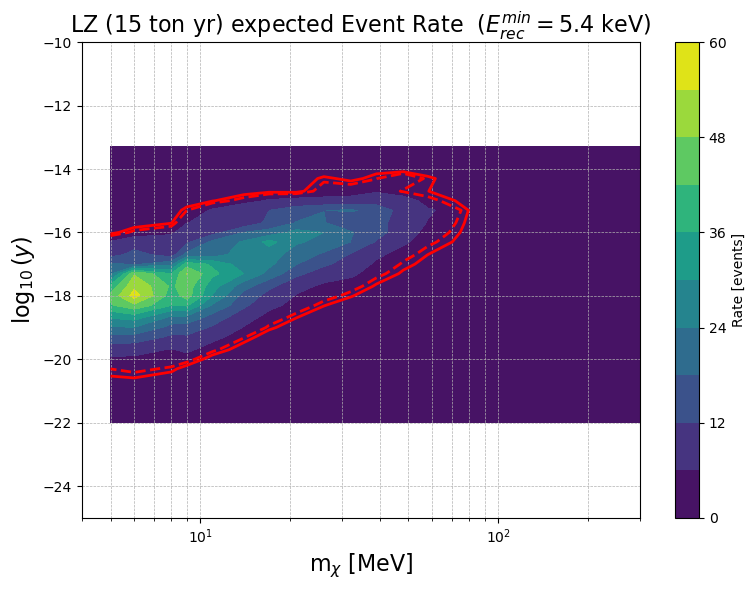

In [70]:
############
# 1 SIMULATION #
############

# LOAD
# choose the universe
uni = 10
print('SIMULATION SELECTED: ', uni)

data = np.loadtxt("data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe" + str(uni) + ".dat", comments="#")

log10y_vals_all = data[:, 0]
mass_vals_all   = data[:, 1]
Nhits_all       = data[:, 2]

# lengths
n_y = len(np.unique(log10y_vals_all))
n_m = len(np.unique(mass_vals_all))


log10y_vals_sim1 = log10y_vals_all[:n_y]  # each row has n_y masses
mass_vals_sim1   = mass_vals_all[::n_y]     # the 1st row

# Reshape
Nhits_grid_sim1 = Nhits_all.reshape((n_m, n_y)).T



# Grid
M, Y = np.meshgrid(mass_vals_sim1, log10y_vals_sim1)

plt.figure(figsize=(8, 6))

cp = plt.contourf(M, Y, Nhits_grid_sim1, levels=10, cmap='viridis')
plt.colorbar(cp, label='Rate [events]')

S_level = 2.302 # 90 CL if background free
print('Solid contour   --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid_sim1, levels=[S_level], colors='red', linewidths=2)
# plt.clabel(contour_line, fmt={S_level: 'S=1'}, fontsize=12)

S_level = LZ_signal_128
print('Dashed contour  --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid_sim1, levels=[S_level], colors='red', linewidths=2, linestyles='dashed')
# plt.clabel(contour_line, fmt={S_level: '90% C.L.'}, fontsize=8)

plt.xscale('log')
plt.xlim(4,300)
plt.ylim(-25,-10)
plt.xlabel("m$_{\chi}$ [MeV]", fontsize=16)
plt.ylabel(r"$\log_{10}(y)$", fontsize=16)
plt.title("LZ (15 ton yr) expected Event Rate  ($E_{rec}^{min}=5.4$ keV)", fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# PLOTS

In [71]:
#### PREVIOUS BOUNDS ####

# cooling bounds
datacool = np.loadtxt("../../ExpData/lightfermionicDM_bounds/coolingDM.dat")

macool = datacool[:,0]
y_cool = datacool[:,1]  



## PROJECTIONS

### LOAD ALL THE SIMULATIONS

In [72]:
# FUNCTION TO LOAD ALL THE CONSTRAINTS

def load_and_prepare_grid(filename, y_scale=1):
    data = np.loadtxt(filename)
    # y_scale needed because    g_ap = C_ap * g_a
    X, Y, Z = data[:, 0], data[:, 1] * y_scale, data[:, 2]

    x_unique = np.unique(X)
    y_unique = np.unique(Y)
    X_grid, Y_grid = np.meshgrid(x_unique, y_unique)
    Z_grid = np.zeros_like(X_grid)

    for i in range(len(X)):
        x_idx = np.where(x_unique == X[i])[0][0]
        y_idx = np.where(y_unique == Y[i])[0][0]
        Z_grid[y_idx, x_idx] = Z[i]

    return X_grid, Y_grid, Z_grid

# Files
files = {"LZ15diff": "data/fermionicDM-smooth/Nhits_grid_LZ15tonyr.dat",
         "LZ15sim0": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe0.dat",
         "LZ15sim1": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe1.dat",
         "LZ15sim2": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe2.dat",
         "LZ15sim3": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe3.dat",
         "LZ15sim4": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe4.dat",
         "LZ15sim5": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe5.dat",
         "LZ15sim6": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe6.dat",
         "LZ15sim7": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe7.dat",
         "LZ15sim8": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe8.dat",
         "LZ15sim9": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe9.dat",
         "LZ15sim10": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe10.dat",
         "LZ15sim11": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe11.dat",
         "LZ15sim12": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe12.dat",
         "LZ15sim13": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe13.dat",
         "LZ15sim14": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe14.dat",
         "LZ15sim15": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe15.dat",
         "LZ15sim16": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe16.dat",
         "LZ15sim17": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe17.dat",
         "LZ15sim18": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe18.dat",
         "LZ15sim19": "data/fermionicDM-sims/LZ-15ty-highErec/Nhits_grid_LZ15tonyr_sim_universe19.dat",
         
}

# Dictionary to save the results
grids = {}

for label, filepath in files.items():
    Xg, Yg, Zg = load_and_prepare_grid(filepath)
    grids[label] = {"X": Xg, "Y": Yg, "Z": Zg}

In [73]:
# COMPUTE THE MEAN AND 1 STANDARD DEVIATION --- MEDIAN AND 16-84 PERCENTILES

S_stack_all = np.stack([grids[f"LZ15sim{i}"]["Z"] for i in range(0,20)])

S_mean = S_stack_all.mean(axis=0)
S_std = S_stack_all.std(axis=0)

S_median = np.median(S_stack_all, axis=0)
S_p16, S_p84 = np.percentile(S_stack_all, [16, 84], axis=0)

#### Mean and std

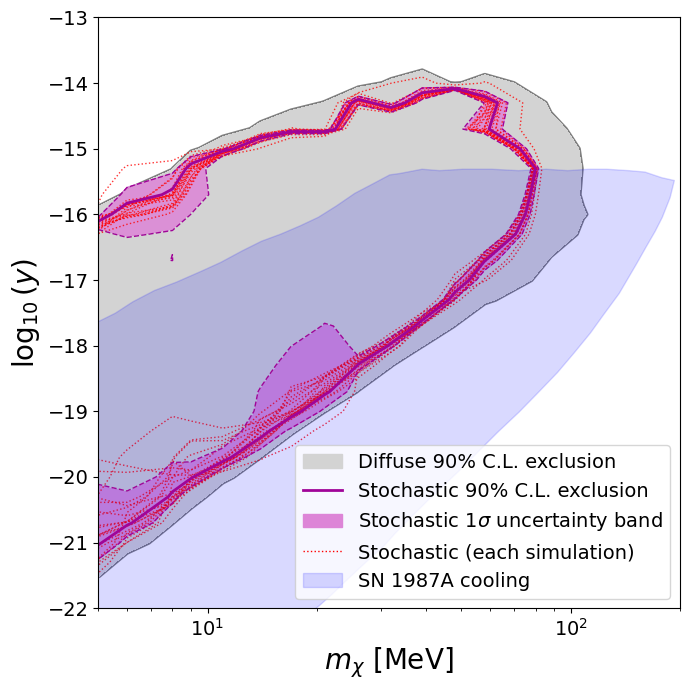

In [74]:
# S value to plot contour
S_level = 2.302 # 90 CL if background free


# colors
colorfill = 'xkcd:lavender pink'
colorline = 'xkcd:barney purple'
colortext = 'black'


# PLOT
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)


# LZ diffuse approximation
ax.contour(grids["LZ15diff"]["Y"], grids["LZ15diff"]["X"], grids["LZ15diff"]["Z"], 
                     levels=[S_level], colors="gray", linewidths=3, linestyles='-', zorder=0)

ax.contourf(grids["LZ15diff"]["Y"], grids["LZ15diff"]["X"], grids["LZ15diff"]["Z"], 
                        levels=[S_level, grids["LZ15diff"]["Z"].max()], colors=["lightgray"], alpha=1, zorder=0)


# LZ universe 
ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_mean, 
           levels=[S_level], colors=colorline, linewidths=2, linestyles='-')

ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_mean + S_std, 
           levels=[S_level], colors=colorline, linewidths=1, linestyles='--')

ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], np.maximum(0, S_mean - np.minimum(8, S_std)), # for looks
           levels=[S_level], colors=colorline, linewidths=1, linestyles='--')


# S_level - 1σ
ax.contourf(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_mean + S_std, 
            levels=[S_level, S_mean.max()], colors=[colorfill], alpha=0.85)

# S_level + 1σ
ax.contourf(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], np.maximum(0, S_mean - np.minimum(8, S_std)), # for looks
            levels=[S_level, S_mean.max()], colors=['lightgray'], alpha=1.0)


coloruni = 'red'
for uni in range(0,20):
    ax.contour(grids["LZ15sim"+str(uni)]["Y"], grids["LZ15sim"+str(uni)]["X"], grids["LZ15sim"+str(uni)]["Z"], levels=[S_level], colors=coloruni, linewidths=1, linestyles=':', alpha=0.8, zorder=1)


# OTHER BOUNDS
# Cooling bounds
ax.fill_between(macool, y_cool, 1e-8, color='blue', alpha=0.15)


plt.xscale('log')
plt.xlim(5,200)
plt.ylim(-22,-13)
plt.xlabel("$m_{\chi}$ [MeV]", fontsize=20)
plt.ylabel(r"$\log_{10}(y)$", fontsize=20)
# plt.title("LZ (15 ton yr) SIM 1 expected Event Rate  ($E_{rec}^{min}=5$ keV)", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Legends
diffuse_patch = mpatches.Patch(color='lightgray', label='Diffuse 90% C.L. exclusion')
sto_line, = ax.plot(np.array([1,2]), np.array([1,2]), color=colorline, label='Stochastic 90% C.L. exclusion', linewidth=2) 
sto_band_patch = mpatches.Patch(color=colorfill, label='Stochastic 1$\sigma$ uncertainty band')
sto_line_sim, = ax.plot(np.array([1,2]), np.array([1,2]), color='red', linestyle=':', label='Stochastic (each simulation)', linewidth=1) 
cooling_patch = mpatches.Patch(color="blue", alpha=0.15, label='SN 1987A cooling')

ax.legend(handles=[diffuse_patch, sto_line, sto_band_patch, sto_line_sim, cooling_patch], fontsize=14, loc='lower right')

plt.savefig("figures/boundsLZ15_y_vs_mDM.pdf", bbox_inches='tight')
plt.show()

#### Median and percentiles

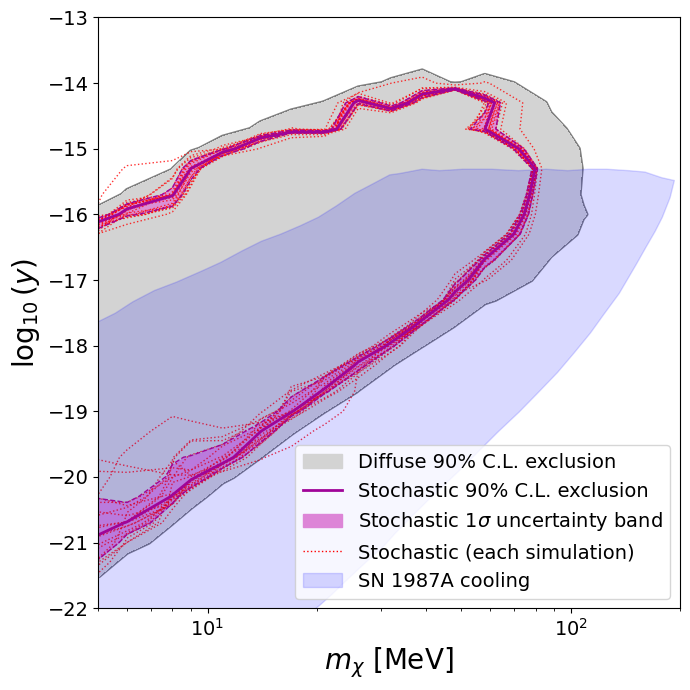

In [75]:
# S value to plot contour
S_level = 2.302 # 90 CL if background free


# colors
colorfill = 'xkcd:lavender pink'
colorline = 'xkcd:barney purple'
colortext = 'black'

colorfill2 = 'orange'
colorline2 = 'darkorange'

# PLOT
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)


# LZ diffuse approximation
ax.contour(grids["LZ15diff"]["Y"], grids["LZ15diff"]["X"], grids["LZ15diff"]["Z"], 
                     levels=[S_level], colors="gray", linewidths=3, linestyles='-', zorder=0)

ax.contourf(grids["LZ15diff"]["Y"], grids["LZ15diff"]["X"], grids["LZ15diff"]["Z"], 
                        levels=[S_level, grids["LZ15diff"]["Z"].max()], colors=["lightgray"], alpha=1, zorder=0)


# LZ universe: median and percentiles
ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_median, 
           levels=[S_level], colors=colorline, linewidths=2, linestyles='-')

ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_p84, 
           levels=[S_level], colors=colorline, linewidths=1, linestyles='--')

ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_p16,
           levels=[S_level], colors=colorline, linewidths=1, linestyles='--')


# S_level - 1σ
ax.contourf(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_p84, 
            levels=[S_level, S_median.max()], colors=[colorfill], alpha=0.85)

# S_level + 1σ
ax.contourf(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_p16,
            levels=[S_level, S_median.max()], colors=['lightgray'], alpha=1.0)




coloruni = 'red'
for uni in range(0,20):
    ax.contour(grids["LZ15sim"+str(uni)]["Y"], grids["LZ15sim"+str(uni)]["X"], grids["LZ15sim"+str(uni)]["Z"], levels=[S_level], colors=coloruni, linewidths=1, linestyles=':', alpha=0.8, zorder=1)



# OTHER BOUNDS
# Cooling bounds
ax.fill_between(macool, y_cool, 1e-8, color='blue', alpha=0.15)



plt.xscale('log')
plt.xlim(5,200)
plt.ylim(-22,-13)
plt.xlabel("$m_{\chi}$ [MeV]", fontsize=20)
plt.ylabel(r"$\log_{10}(y)$", fontsize=20)
# plt.title("LZ (15 ton yr) SIM 1 expected Event Rate  ($E_{rec}^{min}=5$ keV)", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Legends
diffuse_patch = mpatches.Patch(color='lightgray', label='Diffuse 90% C.L. exclusion')
sto_line, = ax.plot(np.array([1,2]), np.array([1,2]), color=colorline, label='Stochastic 90% C.L. exclusion', linewidth=2) 
sto_band_patch = mpatches.Patch(color=colorfill, label='Stochastic 1$\sigma$ uncertainty band')
sto_line_sim, = ax.plot(np.array([1,2]), np.array([1,2]), color='red', linestyle=':', label='Stochastic (each simulation)', linewidth=1) 
cooling_patch = mpatches.Patch(color="blue", alpha=0.15, label='SN 1987A cooling')

ax.legend(handles=[diffuse_patch, sto_line, sto_band_patch, sto_line_sim, cooling_patch], fontsize=14, loc='lower right')

plt.savefig("figures/boundsLZ15_y_vs_mDM_median.pdf", bbox_inches='tight')
plt.show()

## CURRENT CONSTRAINTS

### LOAD ALL THE SIMULATIONS

In [82]:
# FUNCTION TO LOAD ALL THE CONSTRAINTS

def load_and_prepare_grid(filename, y_scale=1):
    data = np.loadtxt(filename)
    # y_scale needed because    g_ap = C_ap * g_a
    X, Y, Z = data[:, 0], data[:, 1] * y_scale, data[:, 2]

    x_unique = np.unique(X)
    y_unique = np.unique(Y)
    X_grid, Y_grid = np.meshgrid(x_unique, y_unique)
    Z_grid = np.zeros_like(X_grid)

    for i in range(len(X)):
        x_idx = np.where(x_unique == X[i])[0][0]
        y_idx = np.where(y_unique == Y[i])[0][0]
        Z_grid[y_idx, x_idx] = Z[i]

    return X_grid, Y_grid, Z_grid

# Files
files = {"PandaX4Thighsmooth": "data/fermionicDM-smooth/Nhits_grid_PandaX4T_eff.dat",
         "XENONnThighsmooth": "data/fermionicDM-smooth/Nhits_grid_XENONnT_eff.dat",
         "LZhighsmooth": "data/fermionicDM-smooth/Nhits_grid_LZ42_eff.dat",
         "PandaX4Tlowsmooth": "data/fermionicDM-smooth/Nhits_grid_PandaX4T_low_eff.dat",
         "XENONnTlowsmooth": "data/fermionicDM-smooth/Nhits_grid_XENONnT_low_eff.dat",
         "LZlowsmooth": "data/fermionicDM-smooth/Nhits_grid_LZ57_low_eff.dat",
         "LZhighsim0": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe0.dat",
         "LZhighsim1": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe1.dat",
         "LZhighsim2": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe2.dat",
         "LZhighsim3": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe3.dat",
         "LZhighsim4": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe4.dat",
         "LZhighsim5": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe5.dat",
         "LZhighsim6": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe6.dat",
         "LZhighsim7": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe7.dat",
         "LZhighsim8": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe8.dat",
         "LZhighsim9": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe9.dat",
         "LZhighsim10": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe10.dat",
         "LZhighsim11": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe11.dat",
         "LZhighsim12": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe12.dat",
         "LZhighsim13": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe13.dat",
         "LZhighsim14": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe14.dat",
         "LZhighsim15": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe15.dat",
         "LZhighsim16": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe16.dat",
         "LZhighsim17": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe17.dat",
         "LZhighsim18": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe18.dat",
         "LZhighsim19": "data/fermionicDM-sims/LZ-highErec/Nhits_grid_LZ_highNR_sim_universe19.dat",
         "LZlowsim0": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe0.dat",
         "LZlowsim1": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe1.dat",
         "LZlowsim2": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe2.dat",
         "LZlowsim3": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe3.dat",
         "LZlowsim4": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe4.dat",
         "LZlowsim5": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe5.dat",
         "LZlowsim6": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe6.dat",
         "LZlowsim7": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe7.dat",
         "LZlowsim8": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe8.dat",
         "LZlowsim9": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe9.dat",
         "LZlowsim10": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe10.dat",
         "LZlowsim11": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe11.dat",
         "LZlowsim12": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe12.dat",
         "LZlowsim13": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe13.dat",
         "LZlowsim14": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe14.dat",
         "LZlowsim15": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe15.dat",
         "LZlowsim16": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe16.dat",
         "LZlowsim17": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe17.dat",
         "LZlowsim18": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe18.dat",
         "LZlowsim19": "data/fermionicDM-sims/LZ-lowErec/Nhits_grid_LZ_lowNR_sim_universe19.dat",
         "XENONnThighsim0": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe0.dat",
         "XENONnThighsim1": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe1.dat",
         "XENONnThighsim2": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe2.dat",
         "XENONnThighsim3": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe3.dat",
         "XENONnThighsim4": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe4.dat",
         "XENONnThighsim5": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe5.dat",
         "XENONnThighsim6": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe6.dat",
         "XENONnThighsim7": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe7.dat",
         "XENONnThighsim8": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe8.dat",
         "XENONnThighsim9": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe9.dat",
         "XENONnThighsim10": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe10.dat",
         "XENONnThighsim11": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe11.dat",
         "XENONnThighsim12": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe12.dat",
         "XENONnThighsim13": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe13.dat",
         "XENONnThighsim14": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe14.dat",
         "XENONnThighsim15": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe15.dat",
         "XENONnThighsim16": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe16.dat",
         "XENONnThighsim17": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe17.dat",
         "XENONnThighsim18": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe18.dat",
         "XENONnThighsim19": "data/fermionicDM-sims/XENONnT-highErec/Nhits_grid_XENONnT_highNR_sim_universe19.dat",
         "XENONnTlowsim0": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe0.dat",
         "XENONnTlowsim1": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe1.dat",
         "XENONnTlowsim2": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe2.dat",
         "XENONnTlowsim3": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe3.dat",
         "XENONnTlowsim4": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe4.dat",
         "XENONnTlowsim5": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe5.dat",
         "XENONnTlowsim6": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe6.dat",
         "XENONnTlowsim7": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe7.dat",
         "XENONnTlowsim8": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe8.dat",
         "XENONnTlowsim9": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe9.dat",
         "XENONnTlowsim10": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe10.dat",
         "XENONnTlowsim11": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe11.dat",
         "XENONnTlowsim12": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe12.dat",
         "XENONnTlowsim13": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe13.dat",
         "XENONnTlowsim14": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe14.dat",
         "XENONnTlowsim15": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe15.dat",
         "XENONnTlowsim16": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe16.dat",
         "XENONnTlowsim17": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe17.dat",
         "XENONnTlowsim18": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe18.dat",
         "XENONnTlowsim19": "data/fermionicDM-sims/XENONnT-lowErec/Nhits_grid_XENONnT_lowNR_sim_universe19.dat",
         "PandaX4Thighsim0": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe0.dat",
         "PandaX4Thighsim1": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe1.dat",
         "PandaX4Thighsim2": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe2.dat",
         "PandaX4Thighsim3": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe3.dat",
         "PandaX4Thighsim4": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe4.dat",
         "PandaX4Thighsim5": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe5.dat",
         "PandaX4Thighsim6": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe6.dat",
         "PandaX4Thighsim7": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe7.dat",
         "PandaX4Thighsim8": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe8.dat",
         "PandaX4Thighsim9": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe9.dat",
         "PandaX4Thighsim10": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe10.dat",
         "PandaX4Thighsim11": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe11.dat",
         "PandaX4Thighsim12": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe12.dat",
         "PandaX4Thighsim13": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe13.dat",
         "PandaX4Thighsim14": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe14.dat",
         "PandaX4Thighsim15": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe15.dat",
         "PandaX4Thighsim16": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe16.dat",
         "PandaX4Thighsim17": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe17.dat",
         "PandaX4Thighsim18": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe18.dat",
         "PandaX4Thighsim19": "data/fermionicDM-sims/PandaX4T-highErec/Nhits_grid_PandaX4T_highNR_sim_universe19.dat",
         "PandaX4Tlowsim0": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe0.dat",
         "PandaX4Tlowsim1": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe1.dat",
         "PandaX4Tlowsim2": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe2.dat",
         "PandaX4Tlowsim3": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe3.dat",
         "PandaX4Tlowsim4": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe4.dat",
         "PandaX4Tlowsim5": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe5.dat",
         "PandaX4Tlowsim6": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe6.dat",
         "PandaX4Tlowsim7": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe7.dat",
         "PandaX4Tlowsim8": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe8.dat",
         "PandaX4Tlowsim9": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe9.dat",
         "PandaX4Tlowsim10": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe10.dat",
         "PandaX4Tlowsim11": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe11.dat",
         "PandaX4Tlowsim12": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe12.dat",
         "PandaX4Tlowsim13": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe13.dat",
         "PandaX4Tlowsim14": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe14.dat",
         "PandaX4Tlowsim15": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe15.dat",
         "PandaX4Tlowsim16": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe16.dat",
         "PandaX4Tlowsim17": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe17.dat",
         "PandaX4Tlowsim18": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe18.dat",
         "PandaX4Tlowsim19": "data/fermionicDM-sims/PandaX4T-lowErec/Nhits_grid_PandaX4T_lowNR_sim_universe19.dat",
}

# Dictionary to save the results
gridsC = {}

for label, filepath in files.items():
    Xg, Yg, Zg = load_and_prepare_grid(filepath)
    gridsC[label] = {"X": Xg, "Y": Yg, "Z": Zg}

#### Median and percentiles

In [83]:
# COMPUTE THE MEDIAN AND 16-84 PERCENTILES

######
# LZ #
######

# HIGH

Nobs_LZhigh = 0.18 # atm neutrinos + solar neutrinos
B_LZhigh = 0.18

S_stack_all_LZhigh = np.stack([DMfermion.compute_Z_poisson_grid(gridsC[f"LZhighsim{i}"]["Z"], Nobs_LZhigh, B_LZhigh)  for i in range(0,20)])

Z_median_LZhigh = np.median(S_stack_all_LZhigh, axis=0)
Z_p16_LZhigh, Z_p84_LZhigh = np.percentile(S_stack_all_LZhigh, [16, 84], axis=0)



# low

Nobs_LZlow = 19
B_LZlow = 21.6

S_stack_all_LZlow = np.stack([DMfermion.compute_Z_poisson_grid(gridsC[f"LZlowsim{i}"]["Z"], Nobs_LZlow, B_LZlow)  for i in range(0,20)])

Z_median_LZlow = np.median(S_stack_all_LZlow, axis=0)
Z_p16_LZlow, Z_p84_LZlow = np.percentile(S_stack_all_LZlow, [16, 84], axis=0)





###########
# XENONnT #
###########

# HIGH

Nobs_XENONnThigh = 2.053 # neutron + atm neutrinos + solar neutrinos
B_XENONnThigh = 2.053

S_stack_all_XENONnThigh = np.stack([DMfermion.compute_Z_poisson_grid(gridsC[f"XENONnThighsim{i}"]["Z"], Nobs_XENONnThigh, B_XENONnThigh)  for i in range(0,20)])

Z_median_XENONnThigh = np.median(S_stack_all_XENONnThigh, axis=0)
Z_p16_XENONnThigh, Z_p84_XENONnThigh = np.percentile(S_stack_all_XENONnThigh, [16, 84], axis=0)



# low

Nobs_XENONnTlow = 2536
B_XENONnTlow = 2574

S_stack_all_XENONnTlow = np.stack([DMfermion.compute_Z_poisson_grid(gridsC[f"XENONnTlowsim{i}"]["Z"], Nobs_XENONnTlow, B_XENONnTlow)  for i in range(0,20)])

Z_median_XENONnTlow = np.median(S_stack_all_XENONnTlow, axis=0)
Z_p16_XENONnTlow, Z_p84_XENONnTlow = np.percentile(S_stack_all_XENONnTlow, [16, 84], axis=0)





############
# PandaX4T #
############

# HIGH

Nobs_PandaX4Thigh = 2.7 # neutron + solar neutrinos
B_PandaX4Thigh = 2.7

S_stack_all_PandaX4Thigh = np.stack([DMfermion.compute_Z_poisson_grid(gridsC[f"PandaX4Thighsim{i}"]["Z"], Nobs_PandaX4Thigh, B_PandaX4Thigh)  for i in range(0,20)])

Z_median_PandaX4Thigh = np.median(S_stack_all_PandaX4Thigh, axis=0)
Z_p16_PandaX4Thigh, Z_p84_PandaX4Thigh = np.percentile(S_stack_all_PandaX4Thigh, [16, 84], axis=0)



# low

Nobs_PandaX4Tlow = 336
B_PandaX4Tlow = 327.1

S_stack_all_PandaX4Tlow = np.stack([DMfermion.compute_Z_poisson_grid(gridsC[f"PandaX4Tlowsim{i}"]["Z"], Nobs_PandaX4Tlow, B_PandaX4Tlow)  for i in range(0,20)])

Z_median_PandaX4Tlow = np.median(S_stack_all_PandaX4Tlow, axis=0)
Z_p16_PandaX4Tlow, Z_p84_PandaX4Tlow = np.percentile(S_stack_all_PandaX4Tlow, [16, 84], axis=0)

In [95]:

# For the smooth approximation

Zvals_smo_PandaX4T_high = DMfermion.compute_Z_poisson_grid(gridsC["PandaX4Thighsmooth"]["Z"], Nobs_PandaX4Thigh, B_PandaX4Thigh)
Zvals_smo_XENONnT_high = DMfermion.compute_Z_poisson_grid(gridsC["XENONnThighsmooth"]["Z"], Nobs_XENONnThigh, B_XENONnThigh)
Zvals_smo_LZ_high = DMfermion.compute_Z_poisson_grid(gridsC["LZhighsmooth"]["Z"], Nobs_LZhigh, B_LZhigh)

Zvals_smo_PandaX4T_low = DMfermion.compute_Z_poisson_grid(gridsC["PandaX4Tlowsmooth"]["Z"], Nobs_PandaX4Tlow, B_PandaX4Tlow)
Zvals_smo_XENONnT_low = DMfermion.compute_Z_poisson_grid(gridsC["XENONnTlowsmooth"]["Z"], Nobs_XENONnTlow, B_XENONnTlow)
Zvals_smo_LZ_low = DMfermion.compute_Z_poisson_grid(gridsC["LZlowsmooth"]["Z"], Nobs_LZlow, B_LZlow)

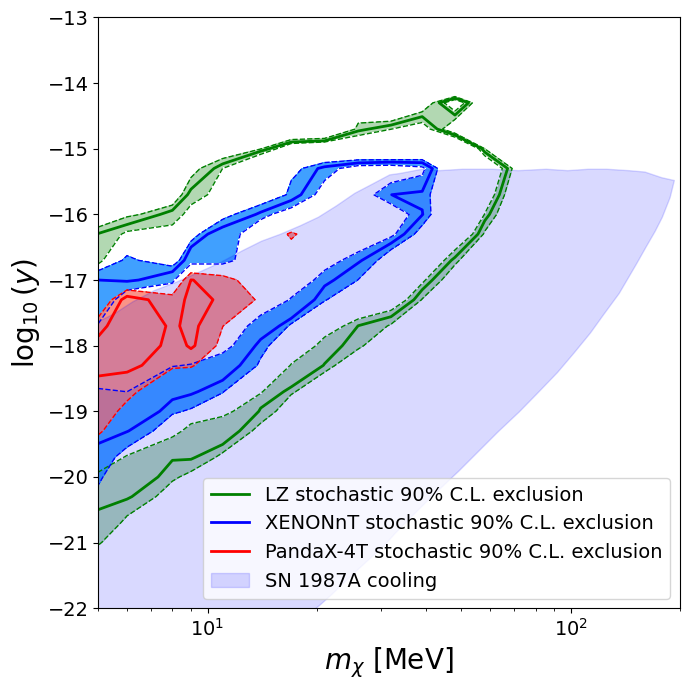

In [103]:
Z_level = 1.28

# colors
colorfill_LZ = 'green'
colorline_LZ = 'green'
coloruni_LZ = 'green'

colorfill_XENONnT = 'dodgerblue'
colorline_XENONnT = 'blue'
coloruni_XENONnT = 'blue'

colorfill_PandaX4T = 'salmon'
colorline_PandaX4T = 'red'
coloruni_PandaX4T = 'red'

colortext = 'black'



# PLOT
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)


######
# LZ #
######

# HIGH E_rec

# # smooth
# ax.contour(gridsC["LZhighsmooth"]["Y"], gridsC["LZhighsmooth"]["X"], Zvals_smo_LZ_high, 
#                      levels=[Z_level], colors=colorline_LZ, linewidths=3, linestyles='--', zorder=5)

# stochastic

ax.contour(gridsC["LZhighsim0"]["Y"], gridsC["LZhighsim0"]["X"], Z_median_LZhigh, 
           levels=[Z_level], colors=colorline_LZ, linewidths=2, linestyles='-')

ax.contour(gridsC["LZhighsim0"]["Y"], gridsC["LZhighsim0"]["X"], Z_p84_LZhigh, 
           levels=[Z_level], colors=colorline_LZ, linewidths=1, linestyles='--')

ax.contour(gridsC["LZhighsim0"]["Y"], gridsC["LZhighsim0"]["X"], Z_p16_LZhigh,
           levels=[Z_level], colors=colorline_LZ, linewidths=1, linestyles='--')


# S_level - 1σ
ax.contourf(gridsC["LZhighsim0"]["Y"], gridsC["LZhighsim0"]["X"], Z_p84_LZhigh, 
            levels=[Z_level, Z_median_LZhigh.max()], colors=[colorfill_LZ], alpha=0.3)

# S_level + 1σ
ax.contourf(gridsC["LZhighsim0"]["Y"], gridsC["LZhighsim0"]["X"], Z_p16_LZhigh,
            levels=[Z_level, Z_median_LZhigh.max()], colors=['white'], alpha=1.0)


# for uni in range(0,20):
#     ax.contour(gridsC["LZhighsim"+str(uni)]["Y"], gridsC["LZhighsim"+str(uni)]["X"], DMfermion.compute_Z_poisson_grid(gridsC[f"LZhighsim{uni}"]["Z"], Nobs_LZhigh, B_LZhigh) , levels=[Z_level], colors=coloruni_LZ, linewidths=1, linestyles=':', alpha=0.8, zorder=1)



# LOW E_rec

# # smooth
# ax.contour(gridsC["LZlowsmooth"]["Y"], gridsC["LZlowsmooth"]["X"], Zvals_smo_LZ_low, 
#                      levels=[Z_level], colors="lime", linewidths=3, linestyles='-.', zorder=5)

# stochastic

ax.contour(gridsC["LZlowsim0"]["Y"], gridsC["LZlowsim0"]["X"], Z_median_LZlow, 
           levels=[Z_level], colors=colorline_LZ, linewidths=2, linestyles='-')

ax.contour(gridsC["LZlowsim0"]["Y"], gridsC["LZlowsim0"]["X"], Z_p84_LZlow, 
           levels=[Z_level], colors=colorline_LZ, linewidths=1, linestyles='--')

ax.contour(gridsC["LZlowsim0"]["Y"], gridsC["LZlowsim0"]["X"], Z_p16_LZlow,
           levels=[Z_level], colors=colorline_LZ, linewidths=1, linestyles='--')


# S_level - 1σ
ax.contourf(gridsC["LZlowsim0"]["Y"], gridsC["LZlowsim0"]["X"], Z_p84_LZlow, 
            levels=[Z_level, 99999], colors=[colorfill_LZ], alpha=0.3)

# S_level + 1σ
ax.contourf(gridsC["LZlowsim0"]["Y"], gridsC["LZlowsim0"]["X"], Z_p16_LZlow,
            levels=[Z_level, 99999], colors=['white'], alpha=1.0)


# for uni in range(0,20):
#     ax.contour(gridsC["LZlowsim"+str(uni)]["Y"], gridsC["LZlowsim"+str(uni)]["X"], DMfermion.compute_Z_poisson_grid(gridsC[f"LZlowsim{uni}"]["Z"], Nobs_LZlow, B_LZlow) , levels=[Z_level], colors=coloruni_LZ, linewidths=1, linestyles='-.', alpha=0.8, zorder=1)



###########
# XENONnT #
###########

# HIGH E_rec

# # smooth
# ax.contour(gridsC["XENONnThighsmooth"]["Y"], gridsC["XENONnThighsmooth"]["X"], Zvals_smo_XENONnT_high, 
                     # levels=[Z_level], colors=colorline_XENONnT, linewidths=3, linestyles='--', zorder=5)

# stochastic

ax.contour(gridsC["XENONnThighsim0"]["Y"], gridsC["XENONnThighsim0"]["X"], Z_median_XENONnThigh, 
           levels=[Z_level], colors=colorline_XENONnT, linewidths=2, linestyles='-')

ax.contour(gridsC["XENONnThighsim0"]["Y"], gridsC["XENONnThighsim0"]["X"], Z_p84_XENONnThigh, 
           levels=[Z_level], colors=colorline_XENONnT, linewidths=1, linestyles='--')

ax.contour(gridsC["XENONnThighsim0"]["Y"], gridsC["XENONnThighsim0"]["X"], Z_p16_XENONnThigh,
           levels=[Z_level], colors=colorline_XENONnT, linewidths=1, linestyles='--')


# S_level - 1σ
ax.contourf(gridsC["XENONnThighsim0"]["Y"], gridsC["XENONnThighsim0"]["X"], Z_p84_XENONnThigh, 
            levels=[Z_level, 99999], colors=[colorfill_XENONnT], alpha=0.85)

# S_level + 1σ
ax.contourf(gridsC["XENONnThighsim0"]["Y"], gridsC["XENONnThighsim0"]["X"], Z_p16_XENONnThigh,
            levels=[Z_level, 99999], colors=['white'], alpha=1.0)


# for uni in range(0,20):
#     ax.contour(gridsC["XENONnThighsim"+str(uni)]["Y"], gridsC["XENONnThighsim"+str(uni)]["X"], DMfermion.compute_Z_poisson_grid(gridsC[f"XENONnThighsim{uni}"]["Z"], Nobs_XENONnThigh, B_XENONnThigh) , levels=[Z_level], colors=coloruni_XENONnT, linewidths=1, linestyles=':', alpha=0.8, zorder=1)



# LOW E_rec

# # smooth
# ax.contour(gridsC["XENONnTlowsmooth"]["Y"], gridsC["XENONnTlowsmooth"]["X"], Zvals_smo_XENONnT_low, 
#                      levels=[Z_level], colors=colorline_XENONnT, linewidths=3, linestyles='-.', zorder=5)

# stochastic

ax.contour(gridsC["XENONnTlowsim0"]["Y"], gridsC["XENONnTlowsim0"]["X"], Z_median_XENONnTlow, 
           levels=[Z_level], colors=colorline_XENONnT, linewidths=2, linestyles='-')

ax.contour(gridsC["XENONnTlowsim0"]["Y"], gridsC["XENONnTlowsim0"]["X"], Z_p84_XENONnTlow, 
           levels=[Z_level], colors=colorline_XENONnT, linewidths=1, linestyles='--')

ax.contour(gridsC["XENONnTlowsim0"]["Y"], gridsC["XENONnTlowsim0"]["X"], Z_p16_XENONnTlow,
           levels=[Z_level], colors=colorline_XENONnT, linewidths=1, linestyles='--')


# S_level - 1σ
ax.contourf(gridsC["XENONnTlowsim0"]["Y"], gridsC["XENONnTlowsim0"]["X"], Z_p84_XENONnTlow, 
            levels=[Z_level, 99999], colors=[colorfill_XENONnT], alpha=0.85)

# S_level + 1σ
ax.contourf(gridsC["XENONnTlowsim0"]["Y"], gridsC["XENONnTlowsim0"]["X"], Z_p16_XENONnTlow,
            levels=[Z_level, 99999], colors=['white'], alpha=1.0)


# for uni in range(0,20):
# for uni in range(0,15):
#     ax.contour(gridsC["XENONnTlowsim"+str(uni)]["Y"], gridsC["XENONnTlowsim"+str(uni)]["X"], DMfermion.compute_Z_poisson_grid(gridsC[f"XENONnTlowsim{uni}"]["Z"], Nobs_XENONnTlow, B_XENONnTlow) , levels=[Z_level], colors=coloruni_XENONnT, linewidths=1, linestyles='-.', alpha=0.8, zorder=1)





############
# PandaX4T #
############

# HIGH E_rec

# # smooth
# ax.contour(gridsC["PandaX4Thighsmooth"]["Y"], gridsC["PandaX4Thighsmooth"]["X"], Zvals_smo_PandaX4T_high, 
#                      levels=[Z_level], colors=colorline_PandaX4T, linewidths=3, linestyles='--', zorder=5)

# stochastic

ax.contour(gridsC["PandaX4Thighsim0"]["Y"], gridsC["PandaX4Thighsim0"]["X"], Z_median_PandaX4Thigh, 
           levels=[Z_level], colors=colorline_PandaX4T, linewidths=2, linestyles='-')

ax.contour(gridsC["PandaX4Thighsim0"]["Y"], gridsC["PandaX4Thighsim0"]["X"], Z_p84_PandaX4Thigh, 
           levels=[Z_level], colors=colorline_PandaX4T, linewidths=1, linestyles='--')

ax.contour(gridsC["PandaX4Thighsim0"]["Y"], gridsC["PandaX4Thighsim0"]["X"], Z_p16_PandaX4Thigh,
           levels=[Z_level], colors=colorline_PandaX4T, linewidths=1, linestyles='--')


# S_level - 1σ
ax.contourf(gridsC["PandaX4Thighsim0"]["Y"], gridsC["PandaX4Thighsim0"]["X"], Z_p84_PandaX4Thigh, 
            levels=[Z_level, 99999], colors=[colorfill_PandaX4T], alpha=0.85)

# S_level + 1σ
ax.contourf(gridsC["PandaX4Thighsim0"]["Y"], gridsC["PandaX4Thighsim0"]["X"], Z_p16_PandaX4Thigh,
            levels=[Z_level, 99999], colors=['white'], alpha=1.0)


# for uni in range(0,20):
#     ax.contour(gridsC["PandaX4Thighsim"+str(uni)]["Y"], gridsC["PandaX4Thighsim"+str(uni)]["X"], DMfermion.compute_Z_poisson_grid(gridsC[f"PandaX4Thighsim{uni}"]["Z"], Nobs_PandaX4Thigh, B_PandaX4Thigh) , levels=[Z_level], colors=coloruni_PandaX4T, linewidths=1, linestyles=':', alpha=0.8, zorder=1)



# LOW E_rec

# # smooth
# ax.contour(gridsC["PandaX4Tlowsmooth"]["Y"], gridsC["PandaX4Tlowsmooth"]["X"], Zvals_smo_PandaX4T_low, 
#                      levels=[Z_level], colors=colorline_PandaX4T, linewidths=3, linestyles='-.', zorder=5)

# stochastic

ax.contour(gridsC["PandaX4Tlowsim0"]["Y"], gridsC["PandaX4Tlowsim0"]["X"], Z_median_PandaX4Tlow, 
           levels=[Z_level], colors=colorline_PandaX4T, linewidths=2, linestyles='-')

ax.contour(gridsC["PandaX4Tlowsim0"]["Y"], gridsC["PandaX4Tlowsim0"]["X"], Z_p84_PandaX4Tlow, 
           levels=[Z_level], colors=colorline_PandaX4T, linewidths=1, linestyles='--')

ax.contour(gridsC["PandaX4Tlowsim0"]["Y"], gridsC["PandaX4Tlowsim0"]["X"], Z_p16_PandaX4Tlow,
           levels=[Z_level], colors=colorline_PandaX4T, linewidths=1, linestyles='--')


# S_level - 1σ
ax.contourf(gridsC["PandaX4Tlowsim0"]["Y"], gridsC["PandaX4Tlowsim0"]["X"], Z_p84_PandaX4Tlow, 
            levels=[Z_level, 99999], colors=[colorfill_PandaX4T], alpha=0.85)

# S_level + 1σ
ax.contourf(gridsC["PandaX4Tlowsim0"]["Y"], gridsC["PandaX4Tlowsim0"]["X"], Z_p16_PandaX4Tlow,
            levels=[Z_level, 99999], colors=['white'], alpha=1.0)


# for uni in range(0,20):
#     ax.contour(gridsC["PandaX4Tlowsim"+str(uni)]["Y"], gridsC["PandaX4Tlowsim"+str(uni)]["X"], DMfermion.compute_Z_poisson_grid(gridsC[f"PandaX4Tlowsim{uni}"]["Z"], Nobs_PandaX4Tlow, B_PandaX4Tlow) , levels=[Z_level], colors=coloruni_PandaX4T, linewidths=1, linestyles='-.', alpha=0.8, zorder=1)



# OTHER BOUNDS
# Cooling bounds
ax.fill_between(macool, y_cool, 1e-8, color='blue', alpha=0.15)




plt.xscale('log')
plt.xlim(5,200)
plt.ylim(-22,-13)
plt.xlabel("$m_{\chi}$ [MeV]", fontsize=20)
plt.ylabel(r"$\log_{10}(y)$", fontsize=20)
# plt.title("LZ (15 ton yr) SIM 1 expected Event Rate  ($E_{rec}^{min}=5$ keV)", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Legends

sto_line_sim_LZhigh, = ax.plot(np.array([1,2]), np.array([1,2]), color=coloruni_LZ, linestyle='-', label='LZ stochastic 90% C.L. exclusion', linewidth=2) 
smo_line_sim_LZhigh, = ax.plot(np.array([1,2]), np.array([1,2]), color=coloruni_LZ, linestyle='--', label='LZ smooth 90% C.L. exclusion', linewidth=2) 
sto_line_sim_XENONnThigh, = ax.plot(np.array([1,2]), np.array([1,2]), color=coloruni_XENONnT, linestyle='-', label='XENONnT stochastic 90% C.L. exclusion', linewidth=2) 
smo_line_sim_XENONnThigh, = ax.plot(np.array([1,2]), np.array([1,2]), color=coloruni_XENONnT, linestyle='--', label='XENONnT smooth 90% C.L. exclusion', linewidth=2) 
sto_line_sim_PandaX4Thigh, = ax.plot(np.array([1,2]), np.array([1,2]), color=coloruni_PandaX4T, linestyle='-', label='PandaX-4T stochastic 90% C.L. exclusion', linewidth=2) 
smo_line_sim_PandaX4Thigh, = ax.plot(np.array([1,2]), np.array([1,2]), color=coloruni_PandaX4T, linestyle='--', label='PandaX-4T smooth 90% C.L. exclusion', linewidth=2) 
cooling_patch = mpatches.Patch(color="blue", alpha=0.15, label='SN 1987A cooling')

# ax.legend(handles=[sto_line_sim_LZhigh, smo_line_sim_LZhigh, sto_line_sim_XENONnThigh, smo_line_sim_XENONnThigh, sto_line_sim_PandaX4Thigh, smo_line_sim_PandaX4Thigh, cooling_patch], fontsize=14, loc='lower right')
ax.legend(handles=[sto_line_sim_LZhigh, sto_line_sim_XENONnThigh, sto_line_sim_PandaX4Thigh, cooling_patch], fontsize=14, loc='lower right')


plt.savefig("figures/boundsLZ_y_vs_mDM_median_current.pdf", bbox_inches='tight')

plt.show()